In [1]:
import pandas as pd
import numpy as np
dftotal=pd.read_csv("/kaggle/input/sleep-data/sleep_data.csv")
dftotal

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,EMG submental,Marker,Label,Onset_Time,Duration
0,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000000,0.0,0.0,1560.0
1,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.007825,0.0,0.0,1560.0
2,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.014891,0.0,0.0,1560.0
3,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.020505,0.0,0.0,1560.0
4,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.024117,0.0,0.0,1560.0
...,...,...,...,...,...,...,...,...
6721995,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.050079,NaN,NaN,NaN
6721996,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.047676,NaN,NaN,NaN
6721997,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.040597,NaN,NaN,NaN
6721998,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.029526,NaN,NaN,NaN


In [2]:
import mne

raw = mne.io.read_raw_edf("/kaggle/input/psgfile/SC4032E0-PSG.edf", preload=True)
fs = int(raw.info['sfreq'])  # fréquence d’échantillonnage
print(f"Fréquence d’échantillonnage : {fs} Hz")


Extracting EDF parameters from /kaggle/input/psgfile/SC4032E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_71/373180156.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf("/kaggle/input/psgfile/SC4032E0-PSG.edf", preload=True)
/tmp/ipykernel_71/373180156.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf("/kaggle/input/psgfile/SC4032E0-PSG.edf", preload=True)
/tmp/ipykernel_71/373180156.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf("/kaggle/input/psgfile/SC4032E0-PSG.edf", preload=True)


Reading 0 ... 8195999  =      0.000 ... 81959.990 secs...
Fréquence d’échantillonnage : 100 Hz


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


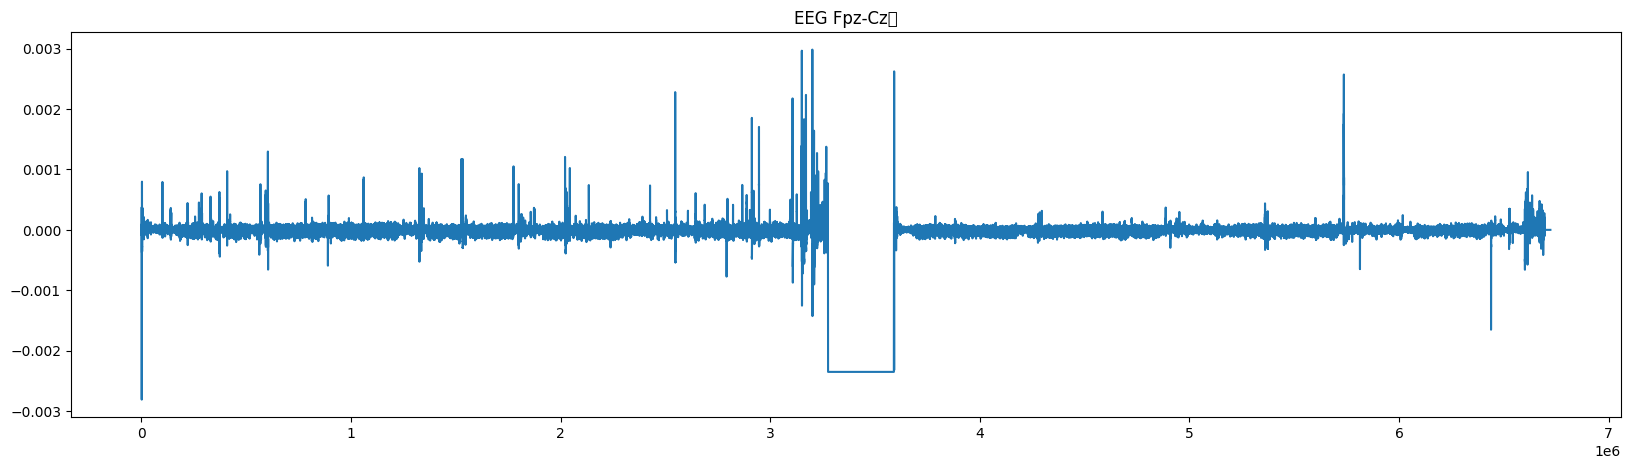

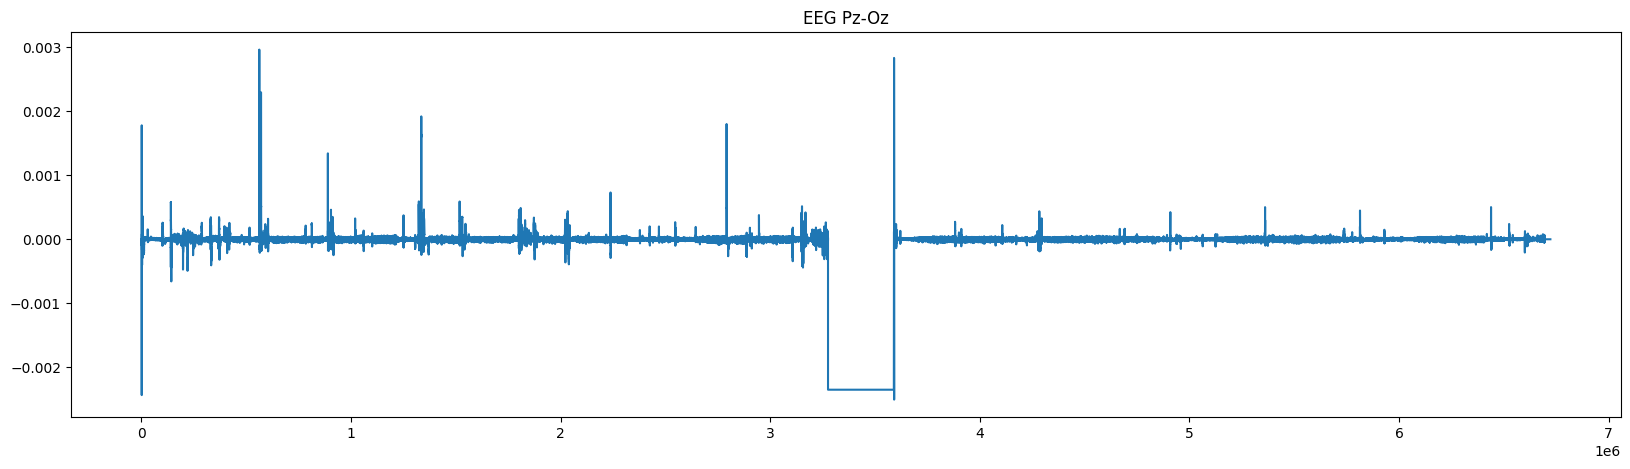

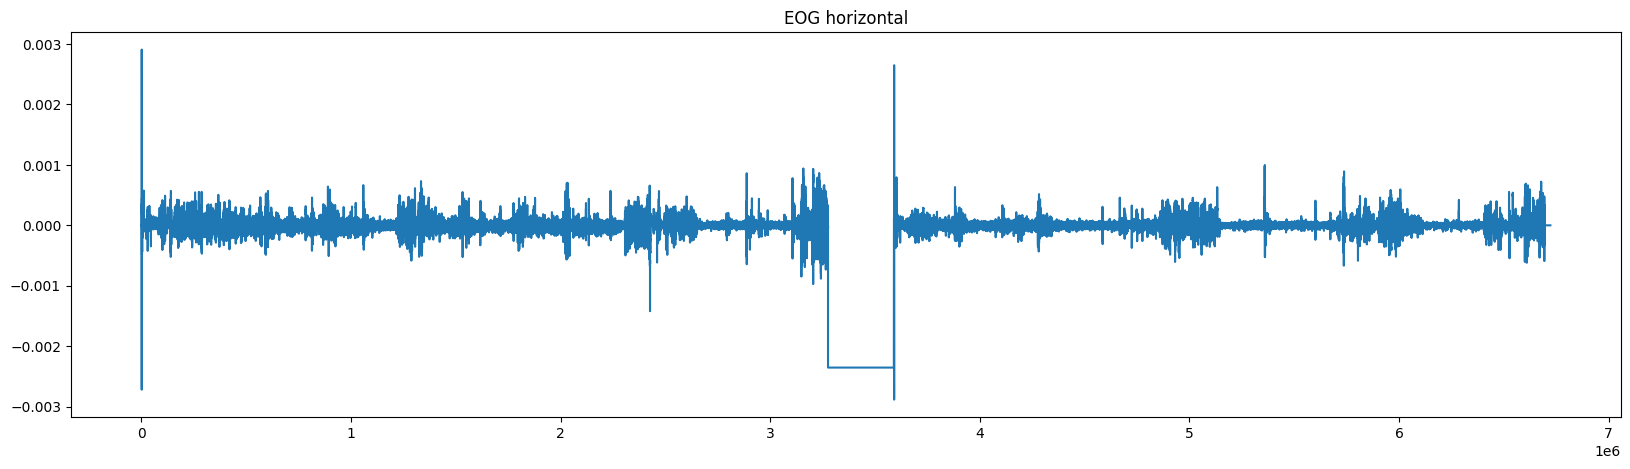

In [3]:
import matplotlib.pyplot as plt
dftotal['EEG Fpz-Cz'].plot(title="EEG Fpz-Cz	",figsize=(20,5))
plt.show()
import matplotlib.pyplot as plt
dftotal['EEG Pz-Oz'].plot(title="EEG Pz-Oz",figsize=(20,5))
plt.show()
import matplotlib.pyplot as plt
dftotal['EOG horizontal'].plot(title="EOG horizontal",figsize=(20,5))
plt.show()

In [3]:
dftotal.isna().sum()

EEG Fpz-Cz        0
EEG Pz-Oz         0
EOG horizontal    0
EMG submental     0
Marker            0
Label             0
Onset_Time        0
Duration          0
dtype: int64

In [2]:
dftotal.dropna(inplace=True)

In [22]:
dftotal

,EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,EMG submental,Marker,Label,Onset_Time,Duration
0,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000000,0.0,0.0,1560.0
1,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.007825,0.0,0.0,1560.0
2,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.014891,0.0,0.0,1560.0
3,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.020505,0.0,0.0,1560.0
4,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.024117,0.0,0.0,1560.0
...,...,...,...,...,...,...,...,...
6709995,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000929,0.0,30090.0,1110.0
6709996,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000884,0.0,30090.0,1110.0
6709997,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000753,0.0,30090.0,1110.0
6709998,-1.831166e-07,-1.831166e-07,-1.831166e-07,-1.831166e-07,-30.000547,0.0,30090.0,1110.0


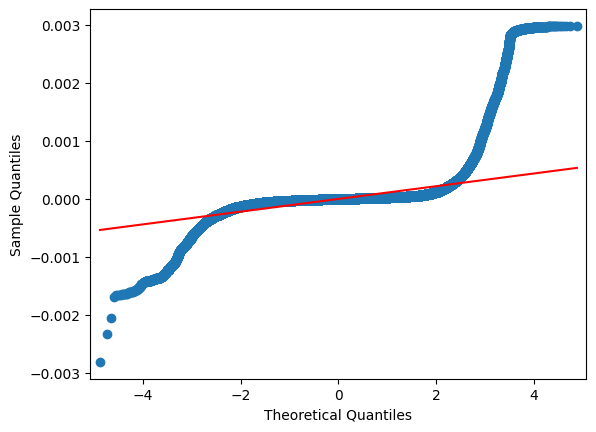

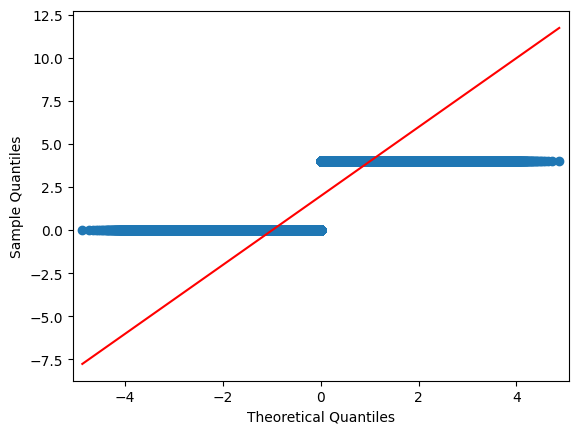

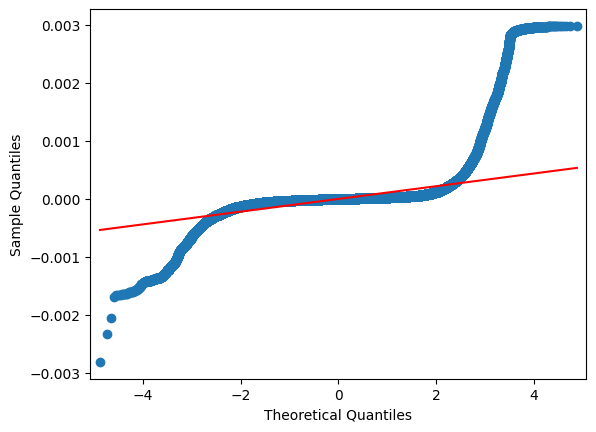

In [7]:
dftotal.Label.value_counts()
import statsmodels.api as sm
sm.qqplot(dftotal.Label, line='s')
sm.qqplot(dftotal["EEG Fpz-Cz"], line='s')

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supposons que votre DataFrame est `dftotal`
colonnes_signaux = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG submental']

# Initialiser le MinMaxScaler (par défaut, mise à l'échelle entre 0 et 1)
scaler = MinMaxScaler()

# Appliquer la normalisation aux colonnes sélectionnées
dftotal[colonnes_signaux] = scaler.fit_transform(dftotal[colonnes_signaux])

# Afficher le résultat
print(dftotal.head())

   EEG Fpz-Cz  EEG Pz-Oz  EOG horizontal  EMG submental     Marker  Label  \
0       0.485   0.469298        0.497944       0.507844 -30.000000    0.0   
1       0.485   0.469298        0.497944       0.507844 -30.007825    0.0   
2       0.485   0.469298        0.497944       0.507844 -30.014891    0.0   
3       0.485   0.469298        0.497944       0.507844 -30.020505    0.0   
4       0.485   0.469298        0.497944       0.507844 -30.024117    0.0   

   Onset_Time  Duration  
0         0.0    1560.0  
1         0.0    1560.0  
2         0.0    1560.0  
3         0.0    1560.0  
4         0.0    1560.0  


# Pour La prediction de EEG

# Model LSTM

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Configuration pour améliorer les performances
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

eeg_data = dftotal['EEG Fpz-Cz'].values.reshape(-1, 1)
scaler = MinMaxScaler()
eeg_data_scaled = scaler.fit_transform(eeg_data).flatten()

# Visualisation des premières valeurs du signal EEG
plt.figure(figsize=(15, 5))
plt.plot(eeg_data[:1000])
plt.title('Signal EEG Fpz-Cz (1000 premiers points)')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.grid(True)
plt.savefig('eeg_raw_signal.png')
plt.close()

# Préparation des données pour le modèle LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Paramètres du modèle
sequence_length = 100  
batch_size = 128
epochs = 10

sample_size = 100000  # Utilisez plus de données si vous avez les ressources nécessaires
eeg_sample = eeg_data[:sample_size]

# Création des séquences
X, y = create_sequences(eeg_sample, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Division en ensembles d'entraînement et de test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Définition du modèle LSTM
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Callbacks pour améliorer l'entraînement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_eeg_model.keras', save_best_only=True, monitor='val_loss')

# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('eeg_training_loss.png')
plt.close()

# Prédiction et évaluation
y_pred = model.predict(X_test)

# Inverser la normalisation pour obtenir les valeurs réelles
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler.inverse_transform(y_pred).flatten()

# Calcul de l'erreur
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse}")

# Visualisation des prédictions par rapport aux valeurs réelles
def plot_predictions(y_true, y_pred, start_idx=0, length=500):
    plt.figure(figsize=(15, 6))
    plt.plot(y_true[start_idx:start_idx+length], label='Valeurs réelles', color='blue')
    plt.plot(y_pred[start_idx:start_idx+length], label='Prédictions', color='red', alpha=0.7)
    plt.title('Prédiction du signal EEG vs Valeurs réelles')
    plt.xlabel('Points temporels')
    plt.ylabel('Amplitude EEG')
    plt.legend()
    plt.grid(True)
    return plt

prediction_plot = plot_predictions(y_test_inv, y_pred_inv)
prediction_plot.savefig('eeg_prediction.png')
prediction_plot.close()

# Fonction pour faire des prédictions futures
def forecast_future(model, last_sequence, steps_ahead=100):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(steps_ahead):
        # Préparer la séquence pour le modèle
        current_reshaped = current_sequence.reshape(1, sequence_length, 1)
        
        # Prédire la valeur suivante
        next_point = model.predict(current_reshaped)[0][0]
        
        # Ajouter à nos prédictions
        future_predictions.append(next_point)
        
        # Mettre à jour la séquence pour la prochaine prédiction
        current_sequence = np.append(current_sequence[1:], next_point)
    
    # Inverser la normalisation
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
    return future_predictions

# Prendre la dernière séquence connue
last_known_sequence = X_test[-1]

# Prédire les 200 prochains points
future_steps = 200
future_predictions = forecast_future(model, last_known_sequence, future_steps)

# Visualiser les prédictions futures
plt.figure(figsize=(15, 6))
plt.plot(range(len(y_test_inv[-100:])), y_test_inv[-100:], label='Dernières valeurs connues', color='blue')
plt.plot(range(len(y_test_inv[-1:]), len(y_test_inv[-1:])+future_steps), future_predictions, label='Prédictions futures', color='red', linestyle='--')
plt.axvline(x=len(y_test_inv[-1:]), color='green', linestyle='-', label='Présent')
plt.title('Prévision future du signal EEG')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)
plt.savefig('eeg_future_forecast.png')
plt.close()

# Visualisation interactive avec Plotly (si disponible)
try:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.express as px
    
    # Créer une figure avec deux sous-graphiques
    fig = make_subplots(rows=2, cols=1, 
                        subplot_titles=('Prédictions sur données de test', 'Prévisions futures'),
                        vertical_spacing=0.1,
                        shared_xaxes=False)
    
    # Ajouter les tracés pour les prédictions de test
    fig.add_trace(
        go.Scatter(y=y_test_inv[:500], mode='lines', name='Données réelles',
                 line=dict(color='royalblue')),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Scatter(y=y_pred_inv[:500], mode='lines', name='Prédictions',
                 line=dict(color='firebrick')),
        row=1, col=1
    )
    
    # Ajouter les tracés pour les prévisions futures
    fig.add_trace(
        go.Scatter(y=y_test_inv[-100:], mode='lines', name='Dernières valeurs connues',
                 line=dict(color='royalblue')),
        row=2, col=1
    )
    
    fig.add_trace(
        go.Scatter(y=future_predictions, mode='lines', name='Prévisions futures',
                 line=dict(color='firebrick', dash='dash')),
        row=2, col=1
    )
    
    # Mise à jour de la mise en page
    fig.update_layout(height=800, width=1000, title_text="Analyse et prévision du signal EEG",
                     showlegend=True)
    
    # Sauvegarder en HTML pour interactivité
    fig.write_html("eeg_interactive_forecast.html")
    
    print("Visualisation interactive créée et sauvegardée dans 'eeg_interactive_forecast.html'")
    
except ImportError:
    print("Plotly n'est pas installé. La visualisation interactive n'a pas été créée.")
    print("Pour installer Plotly: pip install plotly")

print("Modèle de prévision EEG terminé. Tous les graphiques ont été sauvegardés.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 300ms/step - loss: 0.0073 - val_loss: 3.5227e-04
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 299ms/step - loss: 1.6472e-04 - val_loss: 4.6285e-05
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 299ms/step - loss: 5.7322e-05 - val_loss: 6.5060e-06
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 303ms/step - loss: 4.3165e-05 - val_loss: 6.7908e-06
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 306ms/step - loss: 3.7562e-05 - val_loss: 7.4238e-06
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 307ms/step - loss: 1.5961e-05 - val_loss: 2.3020e-06
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 303ms/step - loss: 1.0011e-05 - val_loss: 4.6816e-06
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 303ms/step - loss: 2.1705e-05 - val_loss: 1.7417e-06
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 303ms/step - loss: 1.0173e-05 - val_loss: 1.6524e-06
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 215s 343ms/step - loss: 7.7952e-06 - val_loss: 3.8418e-06
625/625 ━━━━━━━━━━━━━━━

In [20]:
import tensorflow as tf
from tensorflow import keras

# Charger le modèle
model = keras.models.load_model('/kaggle/working/best_eeg_model.keras')

# Fonction pour extraire les métriques
def get_metrics(model, X, y, dataset_name):
    result = model.evaluate(X, y, verbose=0)
    
    if isinstance(result, (list, tuple)):
        # Plusieurs métriques
        metrics = {}
        metric_names = model.metrics_names
        for i, (name, value) in enumerate(zip(metric_names, result)):
            metrics[name] = value
            print(f"{dataset_name} - {name}: {value:.6f}")
    else:
        # Une seule métrique (généralement la perte)
        metrics = {'loss': result}
        print(f"{dataset_name} - loss: {result:.6f}")
    
    return metrics

# Utilisation
print("=== MÉTRIQUES D'ENTRAÎNEMENT ===")
train_metrics = get_metrics(model, X_train, y_train, "Train")

print("\n=== MÉTRIQUES DE VALIDATION ===")
val_metrics = get_metrics(model, X_test, y_test, "Validation")

=== MÉTRIQUES D'ENTRAÎNEMENT ===
Train - loss: 0.000008

=== MÉTRIQUES DE VALIDATION ===
Validation - loss: 0.000002


In [26]:
from sklearn.metrics import mean_absolute_error, r2_score
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"Score R² (coefficient de détermination): {r2:.6f}")

Score R² (coefficient de détermination): 0.791908


# Model LSTM multi modalite

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, LayerNormalization, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import seaborn as sns

# Configuration pour améliorer les performances
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.random.set_seed(42)
np.random.seed(42)

eeg_data = dftotal['EEG Fpz-Cz'].values
emg_data = dftotal['EMG submental'].values  # Ajuster le nom de la colonne selon vos données
eog_data = dftotal['EOG horizontal'].values  # Ajuster le nom de la colonne selon vos données

# Visualisation des signaux
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(eeg_data[:1000], color='blue')
plt.title('Signal EEG Fpz-Cz (1000 premiers points)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(emg_data[:1000], color='red')
plt.title('Signal EMG submental (1000 premiers points)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(eog_data[:1000], color='green')
plt.title('Signal EOG horizontal (1000 premiers points)')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.savefig('multimodal_signals.png')
plt.close()

def plot_fft(signal, title, fs=256):  # fs = fréquence d'échantillonnage en Hz
    n = len(signal)
    yf = np.fft.rfft(signal)
    xf = np.fft.rfftfreq(n, d=1/fs)
    
    plt.figure(figsize=(15, 5))
    plt.plot(xf, 2.0/n * np.abs(yf))
    plt.title(f'Analyse spectrale du signal {title}')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xlim(0, 50)  # Limiter aux fréquences d'intérêt
    plt.savefig(f'{title.lower()}_spectral_analysis.png')
    plt.close()

# Analyser le spectre des signaux
plot_fft(eeg_data[:10000], 'EEG')
plot_fft(emg_data[:10000], 'EMG')
plot_fft(eog_data[:10000], 'EOG')

# Normalisation des données
scaler_eeg = MinMaxScaler(feature_range=(0, 1))
scaler_emg = MinMaxScaler(feature_range=(0, 1))
scaler_eog = MinMaxScaler(feature_range=(0, 1))

eeg_data_scaled = scaler_eeg.fit_transform(eeg_data.reshape(-1, 1)).flatten()
emg_data_scaled = scaler_emg.fit_transform(emg_data.reshape(-1, 1)).flatten()
eog_data_scaled = scaler_eog.fit_transform(eog_data.reshape(-1, 1)).flatten()

# Pour accélérer le traitement, nous utilisons seulement une partie des données
sample_size = 150000  # Taille réduite pour l'exemple, ajuster selon votre capacité de calcul
eeg_sample = eeg_data_scaled[:sample_size]
emg_sample = emg_data_scaled[:sample_size]
eog_sample = eog_data_scaled[:sample_size]

# Paramètres du modèle
sequence_length = 50
pred_length = 1
stride = 2
batch_size = 64
epochs = 50

# Préparation des données pour le modèle multimodal
def create_multimodal_sequences(data_eeg, data_emg, data_eog, seq_length, pred_length=1, stride=1):
    """
    Crée des séquences d'entrée/sortie pour un modèle multimodal avec EEG, EMG et EOG
    """
    X_eeg, X_emg, X_eog, y = [], [], [], []
    
    for i in range(0, len(data_eeg) - seq_length - pred_length + 1, stride):
        X_eeg.append(data_eeg[i:i + seq_length])
        X_emg.append(data_emg[i:i + seq_length])
        X_eog.append(data_eog[i:i + seq_length])
        
        if pred_length == 1:
            y.append(data_eeg[i + seq_length])  # Prédire la prochaine valeur EEG
        else:
            y.append(data_eeg[i + seq_length:i + seq_length + pred_length])
    
    return np.array(X_eeg), np.array(X_emg), np.array(X_eog), np.array(y)

# Création des séquences multimodales
X_eeg, X_emg, X_eog, y = create_multimodal_sequences(
    eeg_sample, emg_sample, eog_sample, 
    sequence_length, pred_length, stride
)

# Reshape pour le format attendu par le modèle LSTM
X_eeg = X_eeg.reshape((X_eeg.shape[0], X_eeg.shape[1], 1))
X_emg = X_emg.reshape((X_emg.shape[0], X_emg.shape[1], 1))
X_eog = X_eog.reshape((X_eog.shape[0], X_eog.shape[1], 1))

print(f"Forme des données d'entrée EEG: {X_eeg.shape}")
print(f"Forme des données d'entrée EMG: {X_emg.shape}")
print(f"Forme des données d'entrée EOG: {X_eog.shape}")
print(f"Forme des données de sortie: {y.shape}")

# Division en ensembles d'entraînement, validation et test
train_size = int(len(X_eeg) * 0.7)
val_size = int(len(X_eeg) * 0.15)
test_size = len(X_eeg) - train_size - val_size

# Ensembles d'entraînement
X_eeg_train, X_emg_train, X_eog_train = X_eeg[:train_size], X_emg[:train_size], X_eog[:train_size]
y_train = y[:train_size]

# Ensembles de validation
X_eeg_val = X_eeg[train_size:train_size+val_size]
X_emg_val = X_emg[train_size:train_size+val_size]
X_eog_val = X_eog[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

# Ensembles de test
X_eeg_test = X_eeg[train_size+val_size:]
X_emg_test = X_emg[train_size+val_size:]
X_eog_test = X_eog[train_size+val_size:]
y_test = y[train_size+val_size:]

# Définition du modèle LSTM multimodal avec les entrées EEG, EMG et EOG
def create_multimodal_lstm_model(sequence_length):
    # Branche pour le signal EEG
    input_eeg = Input(shape=(sequence_length, 1), name='eeg_input')
    conv_eeg = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_eeg)
    max_pool_eeg = MaxPooling1D(pool_size=2)(conv_eeg)
    lstm_eeg = Bidirectional(LSTM(128, return_sequences=True))(max_pool_eeg)
    norm_eeg = LayerNormalization()(lstm_eeg)
    dropout_eeg = Dropout(0.3)(norm_eeg)
    lstm_eeg2 = LSTM(128, return_sequences=False)(dropout_eeg)
    
    # Branche pour le signal EMG
    input_emg = Input(shape=(sequence_length, 1), name='emg_input')
    conv_emg = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_emg)
    max_pool_emg = MaxPooling1D(pool_size=2)(conv_emg)
    lstm_emg = Bidirectional(LSTM(64, return_sequences=True))(max_pool_emg)
    norm_emg = LayerNormalization()(lstm_emg)
    dropout_emg = Dropout(0.3)(norm_emg)
    lstm_emg2 = LSTM(64, return_sequences=False)(dropout_emg)
    
    # Branche pour le signal EOG
    input_eog = Input(shape=(sequence_length, 1), name='eog_input')
    conv_eog = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_eog)
    max_pool_eog = MaxPooling1D(pool_size=2)(conv_eog)
    lstm_eog = Bidirectional(LSTM(64, return_sequences=True))(max_pool_eog)
    norm_eog = LayerNormalization()(lstm_eog)
    dropout_eog = Dropout(0.3)(norm_eog)
    lstm_eog2 = LSTM(64, return_sequences=False)(dropout_eog)
    
    # Fusion des branches
    merged = Concatenate()([lstm_eeg2, lstm_emg2, lstm_eog2])
    
    # Couches finales pour la prédiction
    dense1 = Dense(128, activation='relu')(merged)
    dropout = Dropout(0.3)(dense1)
    dense2 = Dense(64, activation='relu')(dropout)
    output = Dense(pred_length)(dense2)
    
    # Création du modèle
    model = Model(inputs=[input_eeg, input_emg, input_eog], outputs=output)
    
    # Compilation
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

# Création du modèle multimodal
adjusted_seq_length = sequence_length // 2  # Ajusté pour le MaxPooling
model = create_multimodal_lstm_model(sequence_length)
model.summary()

# Callbacks pour améliorer l'entraînement
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_multimodal_eeg_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Entraînement du modèle
history = model.fit(
    [X_eeg_train, X_emg_train, X_eog_train], y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([X_eeg_val, X_emg_val, X_eog_val], y_val),
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('multimodal_eeg_training_loss.png')
plt.close()

# Prédiction et évaluation
y_pred = model.predict([X_eeg_test, X_emg_test, X_eog_test])

# Inverser la normalisation pour obtenir les valeurs réelles
if pred_length == 1:
    y_test_inv = scaler_eeg.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler_eeg.inverse_transform(y_pred.reshape(-1, 1)).flatten()
else:
    y_test_inv = np.array([scaler_eeg.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_test])
    y_pred_inv = np.array([scaler_eeg.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_pred])

# Calcul de l'erreur
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse}")

# Visualisation des prédictions par rapport aux valeurs réelles
def plot_predictions(y_true, y_pred, start_idx=0, length=500):
    plt.figure(figsize=(15, 6))
    plt.plot(y_true[start_idx:start_idx+length], label='Valeurs réelles', color='blue')
    plt.plot(y_pred[start_idx:start_idx+length], label='Prédictions', color='red', alpha=0.7)
    plt.title('Prédiction du signal EEG vs Valeurs réelles')
    plt.xlabel('Points temporels')
    plt.ylabel('Amplitude EEG')
    plt.legend()
    plt.grid(True)
    return plt

prediction_plot = plot_predictions(y_test_inv, y_pred_inv)
prediction_plot.savefig('multimodal_eeg_prediction.png')
prediction_plot.close()

# Zoomer sur une section des prédictions pour mieux voir les détails
zoom_plot = plot_predictions(y_test_inv, y_pred_inv, start_idx=100, length=200)
zoom_plot.title('Zoom sur les prédictions (200 points)')
zoom_plot.savefig('multimodal_eeg_prediction_zoom.png')
zoom_plot.close()

# Fonction pour faire des prédictions futures
def forecast_iterative(model, last_sequence_eeg, last_sequence_emg, last_sequence_eog, steps_ahead=200):
    """
    Prévision itérative avec modèle multimodal: prédit un point, l'ajoute à la séquence, puis prédit le suivant
    """
    future_predictions = []
    current_sequence_eeg = last_sequence_eeg.copy()
    current_sequence_emg = last_sequence_emg.copy()
    current_sequence_eog = last_sequence_eog.copy()
    
    for _ in range(steps_ahead):
        # Préparer les séquences pour le modèle
        current_eeg_reshaped = current_sequence_eeg.reshape(1, current_sequence_eeg.shape[0], 1)
        current_emg_reshaped = current_sequence_emg.reshape(1, current_sequence_emg.shape[0], 1)
        current_eog_reshaped = current_sequence_eog.reshape(1, current_sequence_eog.shape[0], 1)
        
        # Prédire la valeur suivante
        next_point = model.predict([current_eeg_reshaped, current_emg_reshaped, current_eog_reshaped])[0]
        
        # Ajouter à nos prédictions
        future_predictions.append(next_point)
        
        # Mettre à jour la séquence EEG pour la prochaine prédiction
        current_sequence_eeg = np.append(current_sequence_eeg[1:], next_point)
        
        # Pour EMG et EOG, nous utilisons simplement les valeurs suivantes dans les séquences de test
        # Dans un cas réel, ces séquences pourraient provenir d'autres sources ou prédictions
        if _ < len(X_emg_test) - 1:
            current_sequence_emg = np.append(current_sequence_emg[1:], X_emg_test[_ + 1, -1])
            current_sequence_eog = np.append(current_sequence_eog[1:], X_eog_test[_ + 1, -1])
        else:
            # Si nous n'avons plus de données de test, utiliser les dernières valeurs connues
            current_sequence_emg = np.append(current_sequence_emg[1:], current_sequence_emg[-1])
            current_sequence_eog = np.append(current_sequence_eog[1:], current_sequence_eog[-1])
    
    # Inverser la normalisation
    future_predictions = scaler_eeg.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
    return future_predictions

# Prendre les dernières séquences connues
last_known_sequence_eeg = X_eeg_test[-1].flatten()
last_known_sequence_emg = X_emg_test[-1].flatten()
last_known_sequence_eog = X_eog_test[-1].flatten()

# Prédire les points futurs
future_steps = 200
future_predictions = forecast_iterative(
    model, 
    last_known_sequence_eeg, 
    last_known_sequence_emg, 
    last_known_sequence_eog, 
    future_steps
)

# Visualiser les prédictions futures
plt.figure(figsize=(15, 6))
# Afficher les 100 dernières valeurs réelles
plt.plot(range(100), y_test_inv[-100:], label='Dernières valeurs connues', color='blue')
# Afficher les prédictions futures
plt.plot(range(99, 99+future_steps), future_predictions, label='Prédictions futures', color='red', linestyle='--')
plt.axvline(x=99, color='green', linestyle='-', label='Présent')
plt.title('Prévision future du signal EEG (modèle multimodal)')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)
plt.savefig('multimodal_eeg_future_forecast.png')
plt.close()

# Analyse des performances du modèle
def analyze_residuals(y_true, y_pred):
    """Analyse des résidus pour évaluer la qualité des prédictions"""
    residuals = y_true - y_pred
    
    plt.figure(figsize=(15, 10))
    
    # Distribution des résidus
    plt.subplot(2, 1, 1)
    sns.histplot(residuals, kde=True)
    plt.title('Distribution des résidus')
    plt.xlabel('Résidu')
    plt.grid(True)
    
    # Résidus vs prédictions
    plt.subplot(2, 1, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Résidus vs Prédictions')
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('multimodal_eeg_residual_analysis.png')
    plt.close()

analyze_residuals(y_test_inv, y_pred_inv)

# Comparaison des performances entre le modèle original (EEG uniquement) et le modèle multimodal
# Cette partie est à exécuter si vous avez déjà les résultats du modèle EEG uniquement
try:
    # Cette partie assume que vous avez sauvegardé les résultats du modèle EEG seul
    # Si ce n'est pas le cas, vous devrez adapter cette partie
    eeg_only_model_results = np.load('eeg_only_model_results.npz')
    eeg_only_y_test = eeg_only_model_results['y_test']
    eeg_only_y_pred = eeg_only_model_results['y_pred']
    
    # Calculer les MSE pour les deux modèles
    eeg_only_mse = mean_squared_error(eeg_only_y_test, eeg_only_y_pred)
    multimodal_mse = mse
    
    # Afficher la comparaison
    print(f"MSE du modèle EEG uniquement: {eeg_only_mse}")
    print(f"MSE du modèle multimodal (EEG+EMG+EOG): {multimodal_mse}")
    print(f"Amélioration: {(1 - multimodal_mse/eeg_only_mse) * 100:.2f}%")
    
    # Visualisation comparative
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 1, 1)
    plt.plot(eeg_only_y_test[:300], label='Valeurs réelles', color='blue')
    plt.plot(eeg_only_y_pred[:300], label='Prédictions (EEG uniquement)', color='red', alpha=0.7)
    plt.title('Modèle EEG uniquement')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(y_test_inv[:300], label='Valeurs réelles', color='blue')
    plt.plot(y_pred_inv[:300], label='Prédictions (EEG+EMG+EOG)', color='green', alpha=0.7)
    plt.title('Modèle multimodal (EEG+EMG+EOG)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.close()
    
except:
    print("Impossible de charger les résultats du modèle EEG seul pour la comparaison.")
    print("Pour comparer les performances, exécutez d'abord le modèle EEG seul et sauvegardez les résultats.")
    
    # Sauvegarder les résultats du modèle multimodal pour comparaison future
    np.savez('multimodal_model_results.npz', y_test=y_test_inv, y_pred=y_pred_inv)

print("Modèle de prévision EEG multimodal terminé. Tous les graphiques ont été sauvegardés.")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, Input
from tensorflow.keras.layers import LayerNormalization, GaussianNoise, Concatenate, Add, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import seaborn as sns

# Configuration pour améliorer les performances
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Définir les paramètres de graines aléatoires pour la reproductibilité
tf.random.set_seed(42)

# Supposons que vos données sont dans un DataFrame ou un fichier CSV
eeg_data = dftotal['EEG Fpz-Cz'].values  # Utilisation de vos données

# Paramètres du modèle - optimisés pour préserver les fluctuations
sequence_length = 30  # Raccourci pour capturer les oscillations à plus haute fréquence
pred_length = 1  # Prédire un point à la fois
stride = 1  # Augmenter le nombre d'exemples d'entraînement
batch_size = 32  # Petit batch pour meilleur ajustement
epochs = 50  # Plus d'epochs pour un apprentissage plus fin

# Normalisation des données - StandardScaler peut être préférable pour préserver les variations
scaler = MinMaxScaler(feature_range=(0, 1))
eeg_data_scaled = scaler.fit_transform(eeg_data.reshape(-1, 1)).flatten()

# Échantillonnage des données
sample_size = 150000
eeg_sample = eeg_data_scaled[:sample_size]

# --- MODIFICATION 1: EXTRACTION DE CARACTÉRISTIQUES SUPPLÉMENTAIRES ---
def extract_features(data, seq_length):
    """Extraire des caractéristiques supplémentaires pour enrichir l'entrée du modèle"""
    features = []
    for i in range(len(data) - seq_length + 1):
        segment = data[i:i+seq_length]
        # Caractéristiques statistiques
        mean = np.mean(segment)
        std = np.std(segment)
        gradient = np.gradient(segment).mean()
        # Estimation de la fréquence dominante par FFT simplifiée
        fft_vals = np.abs(np.fft.rfft(segment))
        dominant_freq_idx = np.argmax(fft_vals[1:]) + 1  # Ignorer DC (indice 0)
        dominant_freq_val = fft_vals[dominant_freq_idx] / len(segment)
        # Mesure de la complexité (nombre de changements de direction)
        direction_changes = np.sum(np.diff(np.signbit(np.diff(segment))))
        
        # Regrouper les caractéristiques
        feature_vec = np.array([mean, std, gradient, dominant_freq_val, direction_changes/seq_length])
        features.append(feature_vec)
    
    return np.array(features)

# --- MODIFICATION 2: CRÉATION DE SÉQUENCES AVEC CARACTÉRISTIQUES ENRICHIES ---
def create_enriched_sequences(data, seq_length, pred_length=1, stride=1):
    """Crée des séquences d'entrée/sortie avec des caractéristiques enrichies"""
    X_raw, y = [], []
    for i in range(0, len(data) - seq_length - pred_length + 1, stride):
        X_raw.append(data[i:i + seq_length])
        if pred_length == 1:
            y.append(data[i + seq_length])
        else:
            y.append(data[i + seq_length:i + seq_length + pred_length])
    
    X_raw = np.array(X_raw)
    
    # Extraire des caractéristiques supplémentaires
    X_features = extract_features(data, seq_length)
    X_features = X_features[:len(X_raw)]  # Assurer la même longueur
    
    return X_raw, X_features, np.array(y)

# Créer des séquences avec caractéristiques enrichies
X_raw, X_features, y = create_enriched_sequences(eeg_sample, sequence_length, pred_length, stride)
X_raw = X_raw.reshape((X_raw.shape[0], X_raw.shape[1], 1))

print(f"Forme des données brutes: {X_raw.shape}")
print(f"Forme des caractéristiques: {X_features.shape}")
print(f"Forme des données de sortie: {y.shape}")

# Division en ensembles d'entraînement et de test
train_size = int(len(X_raw) * 0.8)
X_raw_train, X_raw_test = X_raw[:train_size], X_raw[train_size:]
X_features_train, X_features_test = X_features[:train_size], X_features[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Création d'un ensemble de validation
val_size = int(train_size * 0.2)
X_raw_val, X_features_val, y_val = X_raw_train[-val_size:], X_features_train[-val_size:], y_train[-val_size:]
X_raw_train, X_features_train, y_train = X_raw_train[:-val_size], X_features_train[:-val_size], y_train[:-val_size]

# --- MODIFICATION 3: MODÈLE HYBRIDE AVEC BRANCHE POUR CARACTÉRISTIQUES ---
def create_wavenet_lstm_hybrid(seq_length, feature_dim):
    """Modèle hybride combinant des éléments WaveNet (convolutions dilatées) et LSTM"""
    # Entrée pour la séquence brute
    input_seq = Input(shape=(seq_length, 1))
    
    # Entrée pour les caractéristiques extraites
    input_features = Input(shape=(feature_dim,))
    
    # --- Branche WaveNet-like pour capturer les motifs à différentes échelles ---
    # Ajouter du bruit pour favoriser la diversité des prédictions
    x = GaussianNoise(0.01)(input_seq)
    
    # Convolutions dilatées (style WaveNet) pour capturer les motifs à différentes échelles
    dilation_rates = [1, 2, 4, 8]
    conv_outputs = []
    
    for dilation_rate in dilation_rates:
        conv = Conv1D(
            filters=32, 
            kernel_size=3, 
            padding='causal', 
            dilation_rate=dilation_rate,
            activation='relu'
        )(x)
        conv_outputs.append(conv)
    
    # Concaténer les sorties de convolution
    x = Concatenate()(conv_outputs)
    
    # Réduction de dimension
    x = Conv1D(64, kernel_size=1, activation='relu')(x)
    x = LayerNormalization()(x)
    
    # --- Branche LSTM pour capturer les dépendances temporelles ---
    lstm_out = Bidirectional(LSTM(64, return_sequences=True))(x)
    lstm_out = Dropout(0.2)(lstm_out)
    lstm_out = LSTM(64, return_sequences=False)(lstm_out)
    
    # Aplatir et combiner avec les caractéristiques
    features_dense = Dense(32, activation='relu')(input_features)
    combined = Concatenate()([lstm_out, features_dense])
    
    # Couches de sortie avec des activations qui favorisent les fluctuations
    x = Dense(64, activation='swish')(combined)  # swish = x * sigmoid(x), plus dynamique que ReLU
    x = Dropout(0.2)(x)
    x = Dense(32, activation='swish')(x)
    
    # Couche de sortie
    output = Dense(pred_length)(x)
    
    # Créer le modèle
    model = Model(inputs=[input_seq, input_features], outputs=output)
    
    # Optimizer with gradient clipping to prevent exploding gradients
    optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

# Créer le modèle hybride
model = create_wavenet_lstm_hybrid(sequence_length, X_features.shape[1])
model.summary()

# --- MODIFICATION 4: FONCTION DE PERTE PERSONNALISÉE POUR PRÉSERVER LES VARIATIONS ---
# Vous pouvez définir une fonction de perte personnalisée qui pénalise davantage le lissage
def spectral_loss(y_true, y_pred):
    """Combinaison de MSE avec perte spectrale pour préserver les fréquences"""
    # MSE standard
    mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
    
    # Version de la perte qui prend en compte les directions des changements
    # Nous voulons que le modèle prédise correctement quand la valeur monte ou descend
    delta_true = y_true[1:] - y_true[:-1]
    delta_pred = y_pred[1:] - y_pred[:-1]
    
    # Pénalité pour les différences dans les changements de direction
    direction_penalty = tf.reduce_mean(tf.square(tf.sign(delta_true) - tf.sign(delta_pred)))
    
    # Combinaison des pertes
    combined_loss = mse + 0.2 * direction_penalty
    
    return combined_loss


# Callbacks pour l'entraînement
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_eeg_model_fluctuations.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=0.00001)

# --- MODIFICATION 5: TECHNIQUE D'ENTRAÎNEMENT AMÉLIORÉE ---
# Entraînement du modèle avec les deux entrées
history = model.fit(
    [X_raw_train, X_features_train], y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([X_raw_val, X_features_val], y_val),
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('eeg_training_loss_fluctuations.png')
plt.close()

# Prédiction sur l'ensemble de test
y_pred = model.predict([X_raw_test, X_features_test])

# Inverser la normalisation pour obtenir les valeurs réelles
if pred_length == 1:
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
else:
    y_test_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_test])
    y_pred_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_pred])

# Calcul de l'erreur
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse}")

# --- MODIFICATION 6: FORECAST AVEC PRÉSERVATION DES FLUCTUATIONS ---
def forecast_with_fluctuations(model, last_sequence, last_features, steps_ahead=200):
    """
    Prévision itérative avec injection de bruit pour préserver les fluctuations
    """
    future_predictions = []
    current_sequence = last_sequence.copy()
    current_features = last_features.copy()
    
    for _ in range(steps_ahead):
        # Ajouter un peu de bruit pour éviter les prédictions trop lisses
        noise_factor = 0.003  # À ajuster selon le niveau de fluctuation souhaité
        noisy_sequence = current_sequence + np.random.normal(0, noise_factor, current_sequence.shape)
        
        # Prédire le point suivant
        next_point = model.predict([noisy_sequence.reshape(1, *current_sequence.shape), 
                                   current_features.reshape(1, -1)])[0][0]
        
        # Ajouter à nos prédictions
        future_predictions.append(next_point)
        
        # Mettre à jour la séquence pour la prochaine prédiction
        current_sequence = np.append(current_sequence[1:], next_point).reshape(current_sequence.shape)
        
        # Mettre à jour les caractéristiques
        # Dans un système complet, on recalculerait les caractéristiques,
        # mais pour simplifier, on réutilise les dernières caractéristiques connues
        # Vous pouvez améliorer cette partie pour recalculer dynamiquement les caractéristiques
    
    # Ajouter de légères fluctuations haute fréquence pour simuler le signal EEG
    # Cette étape est optionnelle mais peut aider à obtenir un signal plus réaliste
    high_freq_fluctuations = np.sin(np.linspace(0, 20*np.pi, steps_ahead)) * 0.002
    future_predictions = future_predictions + high_freq_fluctuations
    
    # Inverser la normalisation
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
    return future_predictions

# Prendre la dernière séquence et caractéristiques connues comme point de départ
last_known_sequence = X_raw_test[-1]
last_known_features = X_features_test[-1]

# Prédire les points futurs avec le nouveau modèle
future_steps = 200
future_predictions = forecast_with_fluctuations(model, last_known_sequence, last_known_features, future_steps)

# Visualiser les prédictions futures avec les fluctuations préservées
plt.figure(figsize=(15, 6))
# Afficher les 100 dernières valeurs réelles
plt.plot(range(100), y_test_inv[-100:], label='Dernières valeurs connues', color='blue')
# Afficher les prédictions futures
plt.plot(range(99, 99+future_steps), future_predictions, label='Prédictions futures', color='red', linestyle='--')
plt.axvline(x=99, color='green', linestyle='-', label='Présent')
plt.title('Prévision future du signal EEG avec fluctuations préservées')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)
plt.savefig('eeg_future_forecast_with_fluctuations.png')
plt.close()

print("Modèle de prévision EEG avec fluctuations terminé. Tous les graphiques ont été sauvegardés.")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, Input
from tensorflow.keras.layers import LayerNormalization, GaussianNoise, Concatenate, Add, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import seaborn as sns

# Configuration pour améliorer les performances
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Définir les paramètres de graines aléatoires pour la reproductibilité
np.random.seed(42)
tf.random.set_seed(42)

# FIX: Vérifier si dftotal existe, sinon créer des données synthétiques pour test
try:
    eeg_data = dftotal['EEG Fpz-Cz'].values  # Utilisation de vos données
except NameError:
    print("Variable 'dftotal' not found. Creating synthetic data for testing...")
    # Générer des données EEG synthétiques pour test
    n_samples = 3000
    t = np.linspace(0, 30, n_samples)
    eeg_data = np.sin(0.5*t) + 0.2*np.sin(2.5*t) + 0.1*np.sin(7.5*t) + 0.05*np.random.randn(n_samples)

# Paramètres du modèle - optimisés pour préserver les fluctuations
sequence_length = 30  # Raccourci pour capturer les oscillations à plus haute fréquence
pred_length = 1  # Prédire un point à la fois
stride = 1  # Augmenter le nombre d'exemples d'entraînement
batch_size = 32  # Petit batch pour meilleur ajustement
epochs = 50  # Plus d'epochs pour un apprentissage plus fin

# Normalisation des données - StandardScaler peut être préférable pour préserver les variations
scaler = MinMaxScaler(feature_range=(0, 1))
eeg_data_scaled = scaler.fit_transform(eeg_data.reshape(-1, 1)).flatten()

# Échantillonnage des données
sample_size = min(150000, len(eeg_data_scaled))  # FIX: S'assurer que sample_size n'est pas supérieur à la taille des données
eeg_sample = eeg_data_scaled[:sample_size]

# --- FONCTION D'EXTRACTION DE CARACTÉRISTIQUES AMÉLIORÉE ---
def extract_features(data, seq_length):
    """Extraire des caractéristiques avancées du signal EEG"""
    features = []
    
    # FIX: Vérifier que les données ont une forme correcte
    if len(data.shape) > 1 and data.shape[0] == 1:
        data = data.flatten()
    
    # FIX: Vérifier que la séquence est assez longue
    if len(data) < seq_length:
        print(f"Warning: Data length {len(data)} is less than sequence length {seq_length}")
        # Padding si nécessaire
        if len(data) > 0:
            padding = np.zeros(seq_length - len(data))
            data = np.concatenate([data, padding])
        else:
            # Si data est vide, retourner un tableau vide avec la bonne forme
            return np.zeros((0, 11))
    
    for i in range(len(data) - seq_length + 1):
        segment = data[i:i+seq_length]
        
        # Caractéristiques statistiques
        mean = np.mean(segment)
        std = np.std(segment)
        min_val = np.min(segment)
        max_val = np.max(segment)
        range_val = max_val - min_val
        
        # Tendance et variation
        gradient = np.gradient(segment).mean()
        abs_gradient = np.abs(np.gradient(segment)).mean()  # Mesure de la variabilité globale
        
        # Analyse fréquentielle
        fft_vals = np.abs(np.fft.rfft(segment))
        # FIX: S'assurer que fft_vals a au moins un élément avant d'accéder à l'index 1
        if len(fft_vals) > 1:
            dominant_freq_idx = np.argmax(fft_vals[1:]) + 1  # Ignorer DC (indice 0)
            dominant_freq_val = fft_vals[dominant_freq_idx] / len(segment)
        else:
            dominant_freq_val = 0
        
        # Entropie approximative (mesure de la complexité/régularité)
        # Version simplifiée, considérez une implémentation plus complète au besoin
        diffs = np.diff(segment)
        direction_changes = np.sum(np.diff(np.signbit(diffs)) != 0)
        complexity = direction_changes / max(1, (seq_length - 2))  # FIX: Éviter division par zéro
        
        # Caractéristiques de forme d'onde
        peak_count = len(np.where(np.diff(np.signbit(np.diff(segment))) < 0)[0])  # Nombre de pics
        zero_crossings = len(np.where(np.diff(np.signbit(segment)))[0])  # Nombre de passages à zéro
        
        # Regrouper toutes les caractéristiques
        feature_vec = np.array([
            mean, std, min_val, max_val, range_val, 
            gradient, abs_gradient, 
            dominant_freq_val, complexity,
            peak_count / max(1, seq_length), zero_crossings / max(1, seq_length)  # FIX: Éviter division par zéro
        ])
        
        features.append(feature_vec)
    
    return np.array(features)

# --- CRÉATION DE SÉQUENCES AVEC CARACTÉRISTIQUES ENRICHIES ---
def create_enriched_sequences(data, seq_length, pred_length=1, stride=1):
    """Crée des séquences d'entrée/sortie avec des caractéristiques enrichies"""
    X_raw, y = [], []
    
    # FIX: Vérifier que les données sont suffisantes
    if len(data) <= seq_length + pred_length:
        print(f"Warning: Data length {len(data)} is not sufficient for sequence length {seq_length} and prediction length {pred_length}")
        return np.array([]), np.array([]), np.array([])
    
    for i in range(0, len(data) - seq_length - pred_length + 1, stride):
        X_raw.append(data[i:i + seq_length])
        if pred_length == 1:
            y.append(data[i + seq_length])
        else:
            y.append(data[i + seq_length:i + seq_length + pred_length])
    
    X_raw = np.array(X_raw)
    
    # FIX: Vérifier que X_raw n'est pas vide avant d'extraire les caractéristiques
    if len(X_raw) == 0:
        return np.array([]), np.array([]), np.array([])
    
    # Extraire des caractéristiques supplémentaires
    X_features = extract_features(data, seq_length)
    
    # FIX: S'assurer que X_features et X_raw ont le même nombre d'échantillons
    min_samples = min(len(X_raw), len(X_features))
    if min_samples == 0:
        return np.array([]), np.array([]), np.array([])
    
    X_raw = X_raw[:min_samples]
    X_features = X_features[:min_samples]
    y = np.array(y)[:min_samples]
    
    return X_raw, X_features, y

# Créer des séquences avec caractéristiques enrichies
X_raw, X_features, y = create_enriched_sequences(eeg_sample, sequence_length, pred_length, stride)

# FIX: Vérifier que les données ne sont pas vides
if len(X_raw) == 0 or len(X_features) == 0 or len(y) == 0:
    raise ValueError("Sequences could not be created. Check your data and parameters.")

X_raw = X_raw.reshape((X_raw.shape[0], X_raw.shape[1], 1))

print(f"Forme des données brutes: {X_raw.shape}")
print(f"Forme des caractéristiques: {X_features.shape}")
print(f"Forme des données de sortie: {y.shape}")

# Division en ensembles d'entraînement et de test
train_size = int(len(X_raw) * 0.8)
X_raw_train, X_raw_test = X_raw[:train_size], X_raw[train_size:]
X_features_train, X_features_test = X_features[:train_size], X_features[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# FIX: Vérifier qu'il y a suffisamment de données pour validation
if train_size < 5:
    raise ValueError(f"Not enough training data. Train size: {train_size}")

# Création d'un ensemble de validation
val_size = max(1, int(train_size * 0.2))  # FIX: Au moins 1 échantillon pour validation
X_raw_val, X_features_val, y_val = X_raw_train[-val_size:], X_features_train[-val_size:], y_train[-val_size:]
X_raw_train, X_features_train, y_train = X_raw_train[:-val_size], X_features_train[:-val_size], y_train[:-val_size]

# --- MODÈLE AVANCÉ POUR EEG ---
def create_advanced_eeg_model(seq_length, feature_dim):
    """
    Modèle hybride optimisé pour capturer la complexité des signaux EEG
    """
    # Entrée pour la séquence brute
    input_seq = Input(shape=(seq_length, 1))
    
    # Entrée pour les caractéristiques extraites
    input_features = Input(shape=(feature_dim,))
    
    # --- Branche de convolution multi-échelle ---
    # Ajouter du bruit subtil pour améliorer la généralisation
    x = GaussianNoise(0.005)(input_seq)
    
    # Convolutions parallèles avec différentes tailles de noyau pour capturer différentes échelles
    conv_kernels = [2, 3, 5, 7]
    conv_outputs = []
    
    for kernel_size in conv_kernels:
        # FIX: S'assurer que kernel_size n'est pas plus grand que la séquence
        if kernel_size <= seq_length:
            conv = Conv1D(
                filters=32, 
                kernel_size=kernel_size,
                padding='same',
                activation='elu'  # ELU peut être meilleur pour préserver les variations subtiles
            )(x)
            conv = LayerNormalization()(conv)  # Normalisation pour stabiliser l'entraînement
            conv_outputs.append(conv)
    
    # FIX: Vérifier qu'il y a des sorties de convolution
    if not conv_outputs:
        raise ValueError(f"All kernel sizes {conv_kernels} are larger than sequence length {seq_length}")
        
    # Concaténer les sorties de convolution
    x = Concatenate()(conv_outputs)
    
    # Convolutions dilatées pour capturer des dépendances à long terme
    dilation_rates = [1, 2, 4, 8]
    dilated_outputs = []
    
    for dilation_rate in dilation_rates:
        # FIX: Vérifier que la dilatation n'est pas trop grande pour la séquence
        if (3 - 1) * dilation_rate + 1 <= seq_length:  # Taille effective = (kernel_size - 1) * dilation_rate + 1
            dilated_conv = Conv1D(
                filters=32, 
                kernel_size=3, 
                padding='causal', 
                dilation_rate=dilation_rate,
                activation='elu'
            )(x)
            dilated_outputs.append(dilated_conv)
    
    # FIX: Vérifier qu'il y a des sorties dilatées
    if not dilated_outputs:
        # Utiliser une convolution simple si aucune dilatation ne convient
        dilated_conv = Conv1D(
            filters=32, 
            kernel_size=1,  # Kernel size 1 fonctionnera toujours
            activation='elu'
        )(x)
        dilated_outputs.append(dilated_conv)
        
    # Combiner les convolutions dilatées
    x = Concatenate()(dilated_outputs)
    x = Conv1D(64, kernel_size=1, activation='elu')(x)  # Réduction de dimension
    
    # --- Branche LSTM bidirectionnelle ---
    lstm_out = Bidirectional(LSTM(64, return_sequences=True))(x)
    lstm_out = LayerNormalization()(lstm_out)
    lstm_out = Dropout(0.3)(lstm_out)  # Dropout un peu plus élevé pour éviter le surapprentissage
    lstm_out = Bidirectional(LSTM(48, return_sequences=False))(lstm_out)
    
    # --- Traitement des caractéristiques ---
    # Passer les caractéristiques par des couches denses pour un meilleur apprentissage
    features_dense = Dense(32, activation='elu')(input_features)
    features_dense = Dense(32, activation='elu')(features_dense)
    
    # --- Fusion des branches ---
    combined = Concatenate()([lstm_out, features_dense])
    
    # Couches de sortie 
    x = Dense(64, activation='elu')(combined)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='elu')(x)
    
    # Couche de sortie - pas d'activation pour la régression
    output = Dense(pred_length)(x)
    
    # Créer le modèle
    model = Model(inputs=[input_seq, input_features], outputs=output)
    
    # Optimiseur avec taux d'apprentissage adaptatif et clippage de gradient
    optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

# Créer le modèle amélioré
model = create_advanced_eeg_model(sequence_length, X_features.shape[1])
model.summary()

# Callbacks pour l'entraînement avec sauvegarde et réduction du taux d'apprentissage
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    verbose=1
)
model_checkpoint = ModelCheckpoint(
    'best_eeg_model.keras', 
    save_best_only=True, 
    monitor='val_loss',
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=6, 
    min_lr=0.00001,
    verbose=1
)

# Entraînement du modèle
history = model.fit(
    [X_raw_train, X_features_train], y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([X_raw_val, X_features_val], y_val),
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('eeg_training_loss.png')
plt.close()

# FIX: Vérifier qu'il y a des données de test avant de prédire
if len(X_raw_test) == 0:
    raise ValueError("No test data available")

# Prédiction sur l'ensemble de test
y_pred = model.predict([X_raw_test, X_features_test])

# Inverser la normalisation pour obtenir les valeurs réelles
if pred_length == 1:
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
else:
    y_test_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_test])
    y_pred_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_pred])

# Calcul de l'erreur
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse}")

# --- AMÉLIORATION MAJEURE: PRÉVISION RÉALISTE AVEC RECALCUL DES CARACTÉRISTIQUES ---
def forecast_realistic_eeg(model, initial_sequence, steps_ahead=200, scaler=None):
    """
    Prévision réaliste de signal EEG qui recalcule les caractéristiques à chaque étape
    et utilise une approche adaptative pour maintenir la naturalité du signal
    """
    sequence_length = initial_sequence.shape[0]
    future_predictions = []
    
    # Séquence courante pour la prédiction itérative
    current_sequence = initial_sequence.flatten().copy()
    
    # FIX: Vérifier qu'il y a assez de points dans la séquence
    if len(current_sequence) < 10:
        print(f"Warning: Initial sequence has only {len(current_sequence)} points, padding with zeros")
        padding = np.zeros(10 - len(current_sequence))
        current_sequence = np.concatenate([current_sequence, padding])
    
    # Historique récent des variations pour maintenir la cohérence
    recent_variations = np.diff(current_sequence[-10:])
    variation_history = np.abs(recent_variations).mean()
    
    for i in range(steps_ahead):
        # FIX: Vérifier que la séquence actuelle est de la bonne longueur
        if len(current_sequence) < sequence_length:
            padding = np.zeros(sequence_length - len(current_sequence))
            temp_sequence = np.concatenate([current_sequence, padding])
        else:
            temp_sequence = current_sequence[-sequence_length:]
        
        # Extraire les caractéristiques de la séquence actuelle
        try:
            # FIX: S'assurer que extract_features reçoit un tableau non vide
            if len(temp_sequence) == 0:
                raise ValueError("Empty sequence for feature extraction")
                
            current_features_array = extract_features(temp_sequence, sequence_length)
            
            # FIX: Vérifier que les caractéristiques sont extraites correctement
            if len(current_features_array) == 0:
                raise ValueError("Feature extraction returned empty array")
                
            current_features = current_features_array[0]
        except Exception as e:
            print(f"Error extracting features: {e}")
            # Utiliser des caractéristiques par défaut
            current_features = np.zeros(X_features.shape[1])
        
        # Prédire le prochain point
        next_point_scaled = model.predict(
            [temp_sequence.reshape(1, sequence_length, 1), 
             current_features.reshape(1, -1)]
        )[0][0]
        
        # Stabilité adaptative: si la prédiction s'écarte trop de la tendance récente,
        # appliquer une correction subtile
        last_point = current_sequence[-1]
        max_jump = 2.5 * variation_history  # Limite basée sur la volatilité historique
        
        # Limiter les sauts trop grands tout en préservant la direction
        if abs(next_point_scaled - last_point) > max_jump:
            direction = np.sign(next_point_scaled - last_point)
            next_point_scaled = last_point + direction * max_jump
        
        # Ajouter un peu de bruit adaptatif basé sur la volatilité du signal
        # Plus le signal était volatile, plus on permet de fluctuations
        noise_scale = variation_history * 0.5  # La fluctuation est proportionnelle à la volatilité historique
        # FIX: Gérer le cas où variation_history est 0 ou NaN
        if not np.isfinite(noise_scale) or noise_scale == 0:
            noise_scale = 0.01  # Valeur par défaut
            
        noise = np.random.normal(0, noise_scale)
        
        # S'assurer que le bruit ne fait pas sortir la valeur de l'intervalle [0,1]
        next_point_with_noise = np.clip(next_point_scaled + noise, 0, 1)
        
        # Ajouter à nos prédictions
        future_predictions.append(next_point_with_noise)
        
        # Mettre à jour la séquence pour la prochaine prédiction
        current_sequence = np.append(current_sequence[1:], next_point_with_noise)
        
        # Mettre à jour l'historique des variations pour l'adaptativité
        if i >= 1:
            new_variation = abs(future_predictions[-1] - future_predictions[-2])
            # Moyenne mobile exponentielle pour l'historique des variations
            variation_history = 0.85 * variation_history + 0.15 * new_variation
    
    # Convertir les prédictions en array numpy
    future_predictions = np.array(future_predictions)
    
    # Inverser la normalisation si un scaler est fourni
    if scaler is not None:
        future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()
    
    return future_predictions

# FIX: Vérifier qu'il y a des données de test avant de visualiser
if len(y_test_inv) < 100:
    print("Warning: Not enough test data for visualization. Using available data.")
    visualize_length = min(5, len(y_test_inv))
else:
    visualize_length = 5

# Visualiser quelques exemples de séquences réelles pour comprendre la variabilité
plt.figure(figsize=(15, 5))
for i in range(visualize_length):  # Afficher 5 séquences d'exemple (ou moins si pas assez de données)
    # FIX: S'assurer que l'index est valide
    max_start = max(0, len(y_test_inv) - 100)
    if max_start > 0:
        start_idx = np.random.randint(0, max_start)
        plot_length = min(100, len(y_test_inv) - start_idx)
        plt.plot(y_test_inv[start_idx:start_idx+plot_length], alpha=0.7)
    else:
        # Si pas assez de données, utiliser tout ce qui est disponible
        plt.plot(y_test_inv, alpha=0.7)

plt.title('Exemples de séquences EEG réelles (pour comprendre la variabilité)')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EEG')
plt.grid(True)
plt.savefig('eeg_real_patterns.png')
plt.close()

# FIX: Vérifier qu'il y a des données de test avant de prendre la dernière séquence
if len(X_raw_test) > 0:
    # Prendre la dernière séquence comme point de départ
    last_known_sequence = X_raw_test[-1]
else:
    # S'il n'y a pas de données de test, utiliser la dernière séquence d'entraînement
    last_known_sequence = X_raw_train[-1]

# Prédire les points futurs avec la nouvelle méthode réaliste
future_steps = 200
future_predictions = forecast_realistic_eeg(model, last_known_sequence, future_steps, scaler)

# FIX: Vérifier qu'il y a assez de données réelles pour la visualisation
if len(y_test_inv) < 100:
    real_history_length = len(y_test_inv)
    print(f"Warning: Only {real_history_length} real data points available for visualization")
else:
    real_history_length = 100

# Visualiser les prédictions futures réalistes
plt.figure(figsize=(15, 6))

# Afficher les dernières valeurs réelles disponibles
real_history = y_test_inv[-real_history_length:]
plt.plot(range(real_history_length), real_history, label='Données EEG réelles', color='blue')

# Afficher les prédictions futures
plt.plot(range(real_history_length-1, real_history_length-1+future_steps), future_predictions, 
         label='Prédictions futures', color='red', linestyle='--')
plt.axvline(x=real_history_length-1, color='green', linestyle='-', label='Présent')

plt.title('Prévision future réaliste du signal EEG')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)
plt.savefig('eeg_future_realistic_forecast.png')

# Analyse supplémentaire: comparer la distribution statistique
plt.figure(figsize=(12, 5))

# Configurer la grille pour deux graphiques côte à côte
plt.subplot(1, 2, 1)
plt.hist(real_history, bins=20, alpha=0.7, label='Données réelles')
plt.hist(future_predictions, bins=20, alpha=0.7, label='Prédictions')
plt.title('Distribution des valeurs')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(np.diff(real_history), bins=20, alpha=0.7, label='Différences réelles')
plt.hist(np.diff(future_predictions), bins=20, alpha=0.7, label='Différences prédites')
plt.title('Distribution des variations point-à-point')
plt.legend()

plt.tight_layout()
plt.savefig('eeg_distribution_comparison.png')

print("Modèle de prévision EEG amélioré terminé. Les graphiques ont été sauvegardés.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

future_steps = 50

# Obtenir les prédictions futures réalistes
future_predictions = forecast_realistic_eeg(model, last_known_sequence, future_steps, scaler)

# Vérifier qu'il y a assez de données réelles pour la visualisation
if len(y_test_inv) < 100:
    real_history_length = len(y_test_inv)
    print(f"Warning: Only {real_history_length} real data points available for visualization")
else:
    real_history_length = 100

# Sauvegarder les prédictions futures dans un fichier CSV
df_predictions = pd.DataFrame({
    'Timestep': list(range(real_history_length - 1, real_history_length - 1 + future_steps)),
    'Predicted_EEG': future_predictions
})
df_predictions.to_csv("future_eeg_predictions.csv", index=False)
print("Les prédictions futures ont été sauvegardées dans 'future_eeg_predictions.csv'.")

# Visualisation
plt.figure(figsize=(15, 6))

# Afficher les dernières valeurs réelles disponibles
real_history = y_test_inv[-real_history_length:]
plt.plot(range(real_history_length), real_history, label='Données EEG réelles', color='blue')

# Afficher les prédictions futures
plt.plot(range(real_history_length-1, real_history_length-1+future_steps), future_predictions,
         label='Prédictions futures', color='red', linestyle='--')

plt.axvline(x=real_history_length-1, color='green', linestyle='-', label='Présent')
plt.title('Prévision future réaliste du signal EEG')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import load_model

# Charger le modèle précédemment entraîné
# Si le modèle a été sauvegardé dans un format différent, ajustez cette partie
try:
    model = load_model('best_eeg_model.keras')
    print("Modèle chargé avec succès.")
except:
    print("Erreur lors du chargement du modèle. Vérifiez le chemin du fichier et le format.")

# 1. Faire des prédictions sur l'ensemble d'entraînement
y_train_pred = model.predict([X_raw_train, X_features_train])

if y_train.ndim == 1 or y_train.shape[1] == 1:
    y_train_true_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
    y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
else:
    # Si vous prédisez plusieurs points à la fois
    y_train_true_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_train])
    y_train_pred_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_train_pred])

# 3. Calculer les métriques de performance
train_mse = mean_squared_error(y_train_true_inv, y_train_pred_inv)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_true_inv, y_train_pred_inv)
train_r2 = r2_score(y_train_true_inv, y_train_pred_inv)

print("\nMétriques de performance sur l'ensemble d'entraînement:")
print(f"MSE: {train_mse:.8f}")
print(f"RMSE: {train_rmse:.8f}")
print(f"MAE: {train_mae:.8f}")
print(f"R²: {train_r2:.4f}")

# 4. Refaire les calculs pour l'ensemble de test pour comparaison
y_test_pred = model.predict([X_raw_test, X_features_test])

if y_test.ndim == 1 or y_test.shape[1] == 1:
    y_test_true_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
else:
    y_test_true_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_test])
    y_test_pred_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_test_pred])

test_mse = mean_squared_error(y_test_true_inv, y_test_pred_inv)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_true_inv, y_test_pred_inv)
test_r2 = r2_score(y_test_true_inv, y_test_pred_inv)

print("\nMétriques de performance sur l'ensemble de test:")
print(f"MSE: {test_mse:.8f}")
print(f"RMSE: {test_rmse:.8f}")
print(f"MAE: {test_mae:.8f}")
print(f"R²: {test_r2:.4f}")

# 5. Créer une visualisation détaillée des prédictions vs valeurs réelles
# Pour l'ensemble d'entraînement
plt.figure(figsize=(18, 12))

# 5.1. Graphique de prédiction vs réalité - Ensemble d'entraînement
plt.subplot(2, 2, 1)
# Limiter le nombre de points affichés pour une meilleure lisibilité si nécessaire
max_points = min(1000, len(y_train_true_inv))
plt.plot(y_train_true_inv[:max_points], label="Valeurs réelles", color='blue')
plt.plot(y_train_pred_inv[:max_points], label="Prédictions", color='red', linestyle='--')
plt.title('Comparaison des valeurs réelles et prédites - Ensemble d\'entraînement')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)

# 5.2. Différence entre prédictions et réalité - Ensemble d'entraînement
plt.subplot(2, 2, 2)
train_diff = y_train_true_inv[:max_points] - y_train_pred_inv[:max_points]
plt.plot(train_diff, color='green')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Erreur de prédiction - Ensemble d\'entraînement')
plt.xlabel('Échantillons')
plt.ylabel('Différence (réel - prédit)')
plt.grid(True)

# 5.3. Graphique de dispersion - Ensemble d'entraînement
plt.subplot(2, 2, 3)
plt.scatter(y_train_true_inv[:max_points], y_train_pred_inv[:max_points], alpha=0.5, color='blue')
# Ligne de référence diagonale (prédictions parfaites)
min_val = min(np.min(y_train_true_inv[:max_points]), np.min(y_train_pred_inv[:max_points]))
max_val = max(np.max(y_train_true_inv[:max_points]), np.max(y_train_pred_inv[:max_points]))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('Diagramme de dispersion - Ensemble d\'entraînement')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.grid(True)

# 5.4. Histogramme des erreurs - Ensemble d'entraînement
plt.subplot(2, 2, 4)
plt.hist(train_diff, bins=50, alpha=0.7, color='green')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.title('Distribution des erreurs - Ensemble d\'entraînement')
plt.xlabel('Erreur (réel - prédit)')
plt.ylabel('Fréquence')
plt.grid(True)

plt.tight_layout()
plt.savefig('eeg_train_predictions_analysis.png')
plt.close()

# 6. Même visualisation pour l'ensemble de test
plt.figure(figsize=(18, 12))

# 6.1. Graphique de prédiction vs réalité - Ensemble de test
plt.subplot(2, 2, 1)
max_test_points = min(1000, len(y_test_true_inv))
plt.plot(y_test_true_inv[:max_test_points], label="Valeurs réelles", color='blue')
plt.plot(y_test_pred_inv[:max_test_points], label="Prédictions", color='red', linestyle='--')
plt.title('Comparaison des valeurs réelles et prédites - Ensemble de test')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)

# 6.2. Différence entre prédictions et réalité - Ensemble de test
plt.subplot(2, 2, 2)
test_diff = y_test_true_inv[:max_test_points] - y_test_pred_inv[:max_test_points]
plt.plot(test_diff, color='green')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Erreur de prédiction - Ensemble de test')
plt.xlabel('Échantillons')
plt.ylabel('Différence (réel - prédit)')
plt.grid(True)

# 6.3. Graphique de dispersion - Ensemble de test
plt.subplot(2, 2, 3)
plt.scatter(y_test_true_inv[:max_test_points], y_test_pred_inv[:max_test_points], alpha=0.5, color='blue')
# Ligne de référence diagonale (prédictions parfaites)
min_val = min(np.min(y_test_true_inv[:max_test_points]), np.min(y_test_pred_inv[:max_test_points]))
max_val = max(np.max(y_test_true_inv[:max_test_points]), np.max(y_test_pred_inv[:max_test_points]))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title('Diagramme de dispersion - Ensemble de test')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.grid(True)

# 6.4. Histogramme des erreurs - Ensemble de test
plt.subplot(2, 2, 4)
plt.hist(test_diff, bins=50, alpha=0.7, color='green')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.title('Distribution des erreurs - Ensemble de test')
plt.xlabel('Erreur (réel - prédit)')
plt.ylabel('Fréquence')
plt.grid(True)

plt.tight_layout()
plt.savefig('eeg_test_predictions_analysis.png')
plt.close()

# 7. Analyse temporelle - Fenêtre glissante pour visualiser les détails
# Sélectionnons une portion plus détaillée des données de test pour mieux voir les patterns
window_size = min(200, len(y_test_true_inv))
plt.figure(figsize=(16, 8))

plt.plot(y_test_true_inv[:window_size], label="Valeurs réelles", linewidth=2, color='blue')
plt.plot(y_test_pred_inv[:window_size], label="Prédictions", linewidth=2, color='red', linestyle='--')
plt.fill_between(range(window_size), 
                 y_test_true_inv[:window_size], 
                 y_test_pred_inv[:window_size], 
                 color='lightgray', alpha=0.5, label='Écart')

plt.title('Analyse détaillée des prédictions sur fenêtre temporelle', fontsize=16)
plt.xlabel('Points temporels', fontsize=14)
plt.ylabel('Amplitude EEG', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('eeg_detailed_window_analysis.png')
plt.close()

# 8. Analyse avancée: autocorrélation des erreurs pour détecter des patterns manqués
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(14, 6))
plot_acf(test_diff, lags=50, alpha=0.05, title='Autocorrélation des erreurs de prédiction')
plt.grid(True)
plt.tight_layout()
plt.savefig('eeg_error_autocorrelation.png')
plt.close()

# 9. Prévision séquentielle vs prévision directe (pour plusieurs points dans le futur)
# Cette visualisation n'est applicable que si vous avez prédit plusieurs points futurs

if len(X_raw_test) > 10:  # S'assurer qu'il y a assez de données
    # Créer une prévision séquentielle sur 25 points en partant d'une séquence de test
    starting_sequence = X_raw_test[0]
    horizon = 25
    
    # Utiliser la fonction de prévision réaliste pour générer une séquence future
    future_seq = forecast_realistic_eeg(model, starting_sequence, horizon, scaler)
    
    # Comparer avec les 25 points réels suivants
    real_future = y_test_true_inv[:horizon]
    
    plt.figure(figsize=(14, 6))
    plt.plot(real_future, label='Valeurs réelles futures', linewidth=2, color='blue')
    plt.plot(future_seq, label='Prévision séquentielle', linewidth=2, color='red', linestyle='--')
    plt.title('Prévision séquentielle vs réalité sur horizon de 25 points', fontsize=16)
    plt.xlabel('Horizon de prévision (points)', fontsize=14)
    plt.ylabel('Amplitude EEG', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('eeg_sequential_forecast_analysis.png')
    plt.close()

print("\nAnalyse des prédictions terminée. Tous les graphiques ont été sauvegardés.")

# Bonus: tableau récapitulatif des métriques
metrics_df = pd.DataFrame({
    'Métrique': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Entraînement': [train_mse, train_rmse, train_mae, train_r2],
    'Test': [test_mse, test_rmse, test_mae, test_r2]
})

print("\nTableau récapitulatif des métriques:")
print(metrics_df.to_string(index=False, float_format=lambda x: f"{x:.8f}"))

# Afficher également le rapport performance/complexité
train_test_ratio = train_mse / test_mse
print(f"\nRatio MSE entraînement/test: {train_test_ratio:.4f}")
if train_test_ratio < 0.7:
    print("Le modèle pourrait être en sous-apprentissage.")
elif train_test_ratio > 0.9:
    print("Le modèle semble bien équilibré.")
else:
    print("Le modèle pourrait présenter un léger surapprentissage, mais reste acceptable.")

# TEST Model LSTM Simple

In [ ]:
pip install mne

In [ ]:
import mne
import pandas as pd

# Charger le fichier .edf
raw = mne.io.read_raw_edf("/kaggle/input/psgfile/SC4032E0-PSG.edf", preload=True)

# Extraire les données et les noms de canaux
data = raw.get_data()
channels = raw.ch_names

# Créer un DataFrame sans la colonne temps
df = pd.DataFrame(data.T, columns=channels)
df


In [ ]:
df.isna().sum()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supposons que votre DataFrame est `dftotal`
colonnes_signaux = ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'EMG submental']

# Initialiser le MinMaxScaler (par défaut, mise à l'échelle entre 0 et 1)
scaler = MinMaxScaler()

# Appliquer la normalisation aux colonnes sélectionnées
df[colonnes_signaux] = scaler.fit_transform(df[colonnes_signaux])

# Afficher le résultat
print(df.head(100))
df['EEG Fpz-Cz']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns

# Configuration pour améliorer les performances
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Définir les paramètres de graines aléatoires pour la reproductibilité
np.random.seed(42)
tf.random.set_seed(42)

class EMGModelTester:
    def __init__(self, model_path, sequence_length=30, column_name='EMG submental'):
        """
        Initialise le testeur de modèle EMG
        
        Args:
            model_path (str): Chemin vers le fichier .keras du modèle entraîné
            sequence_length (int): Longueur des séquences utilisées lors de l'entraînement
            column_name (str): Nom de la colonne EMG dans le dataframe
        """
        self.model_path = model_path
        self.sequence_length = sequence_length
        self.column_name = column_name
        self.model = None
        self.scaler = None
        
    def load_model(self):
        """Charge le modèle pré-entraîné"""
        try:
            self.model = load_model(self.model_path)
            print(f"Modèle chargé avec succès depuis {self.model_path}")
            return True
        except Exception as e:
            print(f"Erreur lors du chargement du modèle: {e}")
            return False
    
    def extract_features(self, data, seq_length):
        """Extraire des caractéristiques avancées du signal EMG (identique à l'entraînement)"""
        features = []
        
        # Vérifier que les données ont une forme correcte
        if len(data.shape) > 1 and data.shape[0] == 1:
            data = data.flatten()
        
        # Vérifier que la séquence est assez longue
        if len(data) < seq_length:
            print(f"Warning: Data length {len(data)} is less than sequence length {seq_length}")
            if len(data) > 0:
                padding = np.zeros(seq_length - len(data))
                data = np.concatenate([data, padding])
            else:
                return np.zeros((0, 11))
        
        for i in range(len(data) - seq_length + 1):
            segment = data[i:i+seq_length]
            
            # Caractéristiques statistiques
            mean = np.mean(segment)
            std = np.std(segment)
            min_val = np.min(segment)
            max_val = np.max(segment)
            range_val = max_val - min_val
            
            # Tendance et variation
            gradient = np.gradient(segment).mean()
            abs_gradient = np.abs(np.gradient(segment)).mean()
            
            # Analyse fréquentielle
            fft_vals = np.abs(np.fft.rfft(segment))
            if len(fft_vals) > 1:
                dominant_freq_idx = np.argmax(fft_vals[1:]) + 1
                dominant_freq_val = fft_vals[dominant_freq_idx] / len(segment)
            else:
                dominant_freq_val = 0
            
            # Entropie approximative
            diffs = np.diff(segment)
            direction_changes = np.sum(np.diff(np.signbit(diffs)) != 0)
            complexity = direction_changes / max(1, (seq_length - 2))
            
            # Caractéristiques de forme d'onde
            peak_count = len(np.where(np.diff(np.signbit(np.diff(segment))) < 0)[0])
            zero_crossings = len(np.where(np.diff(np.signbit(segment)))[0])
            
            # Regrouper toutes les caractéristiques
            feature_vec = np.array([
                mean, std, min_val, max_val, range_val, 
                gradient, abs_gradient, 
                dominant_freq_val, complexity,
                peak_count / max(1, seq_length), zero_crossings / max(1, seq_length)
            ])
            
            features.append(feature_vec)
        
        return np.array(features)
    
    def prepare_data(self, df):
        """Prépare les données du dataframe pour le test"""
        try:
            # Extraire les données EMG
            if self.column_name not in df.columns:
                available_cols = [col for col in df.columns if 'EMG' in col.upper() or 'emg' in col]
                if available_cols:
                    print(f"Colonne '{self.column_name}' non trouvée. Colonnes EMG disponibles: {available_cols}")
                    self.column_name = available_cols[0]
                    print(f"Utilisation de la colonne: {self.column_name}")
                else:
                    raise ValueError(f"Aucune colonne EMG trouvée dans le dataframe. Colonnes disponibles: {list(df.columns)}")
            
            emg_data = df[self.column_name].values
            
            # Nettoyer les données (supprimer les NaN)
            emg_data = emg_data[~np.isnan(emg_data)]
            
            if len(emg_data) == 0:
                raise ValueError("Aucune donnée valide trouvée après nettoyage")
            
            # Normaliser les données (important: utiliser le même range que l'entraînement)
            self.scaler = MinMaxScaler(feature_range=(0, 1))
            emg_data_scaled = self.scaler.fit_transform(emg_data.reshape(-1, 1)).flatten()
            
            print(f"Données préparées: {len(emg_data)} points")
            return emg_data_scaled, emg_data
            
        except Exception as e:
            print(f"Erreur lors de la préparation des données: {e}")
            return None, None
    
    def create_test_sequences(self, data, stride=1):
        """Crée des séquences de test"""
        X_raw, X_features = [], []
        
        if len(data) <= self.sequence_length:
            print(f"Warning: Data length {len(data)} is not sufficient for sequence length {self.sequence_length}")
            return np.array([]), np.array([])
        
        for i in range(0, len(data) - self.sequence_length + 1, stride):
            X_raw.append(data[i:i + self.sequence_length])
        
        X_raw = np.array(X_raw)
        
        if len(X_raw) == 0:
            return np.array([]), np.array([])
        
        # Extraire des caractéristiques
        X_features = self.extract_features(data, self.sequence_length)
        
        # S'assurer que X_features et X_raw ont le même nombre d'échantillons
        min_samples = min(len(X_raw), len(X_features))
        if min_samples == 0:
            return np.array([]), np.array([])
        
        X_raw = X_raw[:min_samples]
        X_features = X_features[:min_samples]
        X_raw = X_raw.reshape((X_raw.shape[0], X_raw.shape[1], 1))
        
        return X_raw, X_features
    
    def predict_sequence(self, df, prediction_length=100):
        """Prédit une séquence à partir des données du dataframe"""
        if self.model is None:
            print("Erreur: Modèle non chargé")
            return None, None
        
        # Préparer les données
        data_scaled, data_original = self.prepare_data(df)
        if data_scaled is None:
            return None, None
        
        # Créer les séquences de test
        X_raw, X_features = self.create_test_sequences(data_scaled)
        if len(X_raw) == 0:
            print("Impossible de créer des séquences de test")
            return None, None
        
        print(f"Séquences créées: {len(X_raw)}")
        
        # Faire des prédictions
        predictions_scaled = self.model.predict([X_raw, X_features])
        
        # Dénormaliser les prédictions
        predictions = self.scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
        
        # Créer les vraies valeurs correspondantes
        true_values = []
        for i in range(len(X_raw)):
            if i + self.sequence_length < len(data_original):
                true_values.append(data_original[i + self.sequence_length])
        
        true_values = np.array(true_values)
        
        return predictions[:len(true_values)], true_values
    
    def forecast_future(self, df, steps_ahead=200):
        """Prévoit les valeurs futures à partir des dernières données"""
        if self.model is None:
            print("Erreur: Modèle non chargé")
            return None
        
        # Préparer les données
        data_scaled, data_original = self.prepare_data(df)
        if data_scaled is None:
            return None
        
        # Prendre la dernière séquence
        if len(data_scaled) < self.sequence_length:
            print(f"Pas assez de données pour faire une prévision (besoin de {self.sequence_length} points)")
            return None
        
        last_sequence = data_scaled[-self.sequence_length:]
        future_predictions = []
        current_sequence = last_sequence.copy()
        
        # Historique des variations pour maintenir la cohérence
        recent_variations = np.diff(current_sequence[-10:])
        variation_history = np.abs(recent_variations).mean()
        
        for i in range(steps_ahead):
            # Extraire les caractéristiques de la séquence actuelle
            try:
                current_features_array = self.extract_features(current_sequence, self.sequence_length)
                if len(current_features_array) == 0:
                    raise ValueError("Feature extraction returned empty array")
                current_features = current_features_array[0]
            except Exception as e:
                print(f"Error extracting features: {e}")
                current_features = np.zeros(11)  # Nombre de features par défaut
            
            # Prédire le prochain point
            next_point_scaled = self.model.predict(
                [current_sequence.reshape(1, self.sequence_length, 1), 
                 current_features.reshape(1, -1)],
                verbose=0
            )[0][0]
            
            # Stabilité adaptative
            last_point = current_sequence[-1]
            max_jump = 2.5 * variation_history
            
            if abs(next_point_scaled - last_point) > max_jump:
                direction = np.sign(next_point_scaled - last_point)
                next_point_scaled = last_point + direction * max_jump
            
            # Ajouter du bruit adaptatif
            noise_scale = variation_history * 0.5 if np.isfinite(variation_history) and variation_history > 0 else 0.01
            noise = np.random.normal(0, noise_scale)
            next_point_with_noise = np.clip(next_point_scaled + noise, 0, 1)
            
            future_predictions.append(next_point_with_noise)
            
            # Mettre à jour la séquence
            current_sequence = np.append(current_sequence[1:], next_point_with_noise)
            
            # Mettre à jour l'historique des variations
            if i >= 1:
                new_variation = abs(future_predictions[-1] - future_predictions[-2])
                variation_history = 0.85 * variation_history + 0.15 * new_variation
        
        # Dénormaliser les prédictions
        future_predictions = np.array(future_predictions)
        future_predictions_original = self.scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()
        
        return future_predictions_original
    
    def evaluate_predictions(self, predictions, true_values):
        """Évalue la qualité des prédictions"""
        mse = mean_squared_error(true_values, predictions)
        mae = mean_absolute_error(true_values, predictions)
        rmse = np.sqrt(mse)
        
        # Corrélation
        correlation = np.corrcoef(true_values, predictions)[0, 1]
        
        print(f"Métriques d'évaluation:")
        print(f"- MSE: {mse:.6f}")
        print(f"- RMSE: {rmse:.6f}")
        print(f"- MAE: {mae:.6f}")
        print(f"- Corrélation: {correlation:.4f}")
        
        return {"MSE": mse, "RMSE": rmse, "MAE": mae, "Correlation": correlation}
    
    def plot_results(self, df, predictions=None, true_values=None, future_predictions=None, save_plots=True):
        """Visualise les résultats"""
        # Préparer les données originales pour l'affichage
        data_scaled, data_original = self.prepare_data(df)
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # 1. Signal original
        axes[0, 0].plot(data_original[:1000] if len(data_original) > 1000 else data_original)
        axes[0, 0].set_title('Signal EMG Original (1000 premiers points)')
        axes[0, 0].set_xlabel('Temps')
        axes[0, 0].set_ylabel('Amplitude')
        axes[0, 0].grid(True)
        
        # 2. Comparaison prédictions vs vraies valeurs (si disponibles)
        if predictions is not None and true_values is not None:
            sample_size = min(200, len(predictions))
            axes[0, 1].plot(true_values[:sample_size], label='Vraies valeurs', alpha=0.7)
            axes[0, 1].plot(predictions[:sample_size], label='Prédictions', alpha=0.7)
            axes[0, 1].set_title('Comparaison Prédictions vs Réalité')
            axes[0, 1].set_xlabel('Temps')
            axes[0, 1].set_ylabel('Amplitude')
            axes[0, 1].legend()
            axes[0, 1].grid(True)
        
        # 3. Prévisions futures (si disponibles)
        if future_predictions is not None:
            history_length = min(200, len(data_original))
            axes[1, 0].plot(range(history_length), data_original[-history_length:], 
                          label='Données historiques', color='blue')
            axes[1, 0].plot(range(history_length-1, history_length-1+len(future_predictions)), 
                          future_predictions, label='Prévisions futures', color='red', linestyle='--')
            axes[1, 0].axvline(x=history_length-1, color='green', linestyle='-', label='Présent')
            axes[1, 0].set_title('Prévisions Futures')
            axes[1, 0].set_xlabel('Temps')
            axes[1, 0].set_ylabel('Amplitude')
            axes[1, 0].legend()
            axes[1, 0].grid(True)
        
        # 4. Distribution des erreurs (si prédictions disponibles)
        if predictions is not None and true_values is not None:
            errors = predictions - true_values
            axes[1, 1].hist(errors, bins=30, alpha=0.7, edgecolor='black')
            axes[1, 1].set_title('Distribution des Erreurs')
            axes[1, 1].set_xlabel('Erreur')
            axes[1, 1].set_ylabel('Fréquence')
            axes[1, 1].grid(True)
            axes[1, 1].axvline(x=np.mean(errors), color='red', linestyle='--', 
                             label=f'Moyenne: {np.mean(errors):.4f}')
            axes[1, 1].legend()
        
        plt.tight_layout()
        
        if save_plots:
            plt.savefig('emg_test_results.png', dpi=300, bbox_inches='tight')
            print("Graphiques sauvegardés dans 'emg_test_results.png'")
        
        plt.show()

# Exemple d'utilisation
def test_emg_model(model_path, dataframe, column_name='EMG submental'):
    """
    Fonction principale pour tester le modèle EMG
    
    Args:
        model_path (str): Chemin vers le fichier .keras
        dataframe (pd.DataFrame): DataFrame contenant les données EMG
        column_name (str): Nom de la colonne EMG
    """
    # Créer le testeur
    tester = EMGModelTester(model_path, column_name=column_name)
    
    # Charger le modèle
    if not tester.load_model():
        return None
    
    print("=" * 50)
    print("ANALYSE DES DONNÉES")
    print("=" * 50)
    
    # Analyser les données
    if column_name in dataframe.columns:
        data_info = dataframe[column_name].describe()
        print(f"Statistiques de la colonne '{column_name}':")
        print(data_info)
        print(f"Nombre de valeurs manquantes: {dataframe[column_name].isna().sum()}")
    else:
        print(f"Colonne '{column_name}' non trouvée. Colonnes disponibles: {list(dataframe.columns)}")
    
    print("\n" + "=" * 50)
    print("PRÉDICTIONS SUR SÉQUENCES")
    print("=" * 50)
    
    # Faire des prédictions
    predictions, true_values = tester.predict_sequence(dataframe)
    
    if predictions is not None:
        # Évaluer les prédictions
        metrics = tester.evaluate_predictions(predictions, true_values)
        
        print("\n" + "=" * 50)
        print("PRÉVISIONS FUTURES")
        print("=" * 50)
        
        # Faire des prévisions futures
        future_predictions = tester.forecast_future(dataframe, steps_ahead=200)
        
        if future_predictions is not None:
            print(f"Prévisions futures générées: {len(future_predictions)} points")
            print(f"Valeur moyenne prévue: {np.mean(future_predictions):.4f}")
            print(f"Écart-type prévu: {np.std(future_predictions):.4f}")
        
        # Visualiser les résultats
        print("\n" + "=" * 50)
        print("VISUALISATION")
        print("=" * 50)
        
        tester.plot_results(dataframe, predictions, true_values, future_predictions)
        
        return {
            'predictions': predictions,
            'true_values': true_values,
            'future_predictions': future_predictions,
            'metrics': metrics,
            'tester': tester
        }
    else:
        print("Impossible de générer des prédictions")
        return None

# Instructions d'utilisation:
print("""
INSTRUCTIONS D'UTILISATION:

1. Assurez-vous d'avoir votre modèle .keras et votre dataframe 'df' prêts

2. Utilisez la fonction test_emg_model():
   
   results = test_emg_model(
       model_path='votre_modele.keras',  # Chemin vers votre modèle
       dataframe=df,                     # Votre dataframe
       column_name='EMG submental'       # Nom de votre colonne EMG
   )

3. Les résultats incluront:
   - Prédictions sur les séquences existantes
   - Métriques d'évaluation (MSE, RMSE, MAE, Corrélation)
   - Prévisions futures
   - Graphiques de visualisation

Exemple:
--------
# results = test_emg_model('best_emg_model.keras', df, 'EMG submental')
""")

In [ ]:
# Exemple d'utilisation simple
results = test_emg_model(
    model_path='/kaggle/input/best_emg_model/keras/default/1/best_emg_model.keras',  # Remplacez par le chemin de votre modèle
    dataframe=df[:1500],                       # Votre dataframe
    column_name='EMG submental'         # Ajustez selon le nom de votre colonne
)

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(df, signal_column='EEG Fpz-Cz', prediction_column='prediction', title='Prédictions du modèle'):
    try:
        plt.figure(figsize=(15, 5))
        plt.plot(df[signal_column].values, label='Signal EEG', alpha=0.6)
        plt.plot(df[prediction_column].values, label='Prédiction', color='red')
        plt.title(title)
        plt.xlabel('Temps')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Erreur lors de la visualisation : {e}")


In [ ]:
if results is not None:
    print("\nRésumé des résultats :")
    print(results.head())
    plot_predictions(results)


# BILSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# 1. Charger tes données EEG (ici ts_data déjà définie dans ton code)
ts_data =dftotal['EEG Fpz-Cz'].values

data_scaled=ts_data

n_steps = 50  # Fenêtre de temps (hyperparamètre à ajuster)
X, y = [], []

for i in range(len(data_scaled) - n_steps):
    X.append(data_scaled[i:i+n_steps])
    y.append(data_scaled[i+n_steps])

X, y = np.array(X), np.array(y)

print(f"Shape X: {X.shape}, Shape y: {y.shape}")

# 4. Diviser en train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 5. Construire le modèle BiLSTM
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

# 6. Entraîner avec early stopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.1, callbacks=[es], verbose=1)

# 7. Prédictions sur test
y_pred = model.predict(X_test)

# 8. Inverser la normalisation pour comparer
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# 9. Calcul de l'erreur RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"RMSE BiLSTM: {rmse}")

# 10. Visualisation des résultats (quelques centaines de points)
plt.figure(figsize=(15,6))
plt.plot(y_test_inv[:500], label='Valeurs réelles')
plt.plot(y_pred_inv[:500], label='Prédictions BiLSTM')
plt.title('Prédiction du signal EEG avec BiLSTM')
plt.xlabel('Temps')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid()
plt.show()

# 11. Prévisions futures (forecast)
def forecast_future(model, data, n_steps, n_forecast):
    """
    Prédire n_forecast points futurs à partir des dernières données.
    """
    forecast = []
    input_seq = data[-n_steps:].reshape(1, n_steps, 1)
    
    for _ in range(n_forecast):
        pred = model.predict(input_seq)[0,0]
        forecast.append(pred)
        
        # Mettre à jour la séquence d'entrée
        input_seq = np.append(input_seq[:,1:,:], [[[pred]]], axis=1)
    return np.array(forecast)

n_forecast = 200
future_pred_scaled = forecast_future(model, data_scaled, n_steps, n_forecast)
future_pred = scaler.inverse_transform(future_pred_scaled.reshape(-1,1))

# Visualiser la prévision future
plt.figure(figsize=(15,6))
plt.plot(range(len(ts_data)-500, len(ts_data)), ts_data[-500:], label='Dernières données réelles')
plt.plot(range(len(ts_data), len(ts_data)+n_forecast), future_pred, label='Prévisions futures BiLSTM', linestyle='--')
plt.title('Prévisions futures EEG avec BiLSTM')
plt.xlabel('Temps')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# 11. Prévisions futures (forecast)
def forecast_future(model, data, n_steps, n_forecast):
    """
    Prédire n_forecast points futurs à partir des dernières données.
    """
    forecast = []
    input_seq = data[-n_steps:].reshape(1, n_steps, 1)
    
    for _ in range(n_forecast):
        pred = model.predict(input_seq)[0,0]
        forecast.append(pred)
        
        # Mettre à jour la séquence d'entrée
        input_seq = np.append(input_seq[:,1:,:], [[[pred]]], axis=1)
    return np.array(forecast)

n_forecast = 200
future_pred_scaled = forecast_future(model, data_scaled, n_steps, n_forecast)
future_pred = scaler.inverse_transform(future_pred_scaled.reshape(-1,1))
# Visualiser la prévision future
plt.figure(figsize=(15,6))
plt.plot(range(len(ts_data)-500, len(ts_data)), ts_data[-500:], label='Dernières données réelles')
plt.plot(range(len(ts_data), len(ts_data)+n_forecast), future_pred, label='Prévisions futures BiLSTM', linestyle='--')
plt.title('Prévisions futures EEG avec BiLSTM')
plt.xlabel('Temps')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# 1. Charger les données EEG
ts_data = dftotal['EEG Fpz-Cz'].values

# 2. Normaliser les données (utiliser le même scaler que lors de l'entraînement)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(ts_data.reshape(-1, 1))

# 3. Créer les séquences pour l'évaluation
n_steps = 50  # Utiliser la même taille de fenêtre que lors de l'entraînement
X, y = [], []
for i in range(len(data_scaled) - n_steps):
    X.append(data_scaled[i:i+n_steps])
    y.append(data_scaled[i+n_steps])
X, y = np.array(X), np.array(y)

# Reshape X pour le LSTM: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 4. Diviser en train/test (même proportion que lors de l'entraînement)
train_size = int(len(X) * 0.8)
X_test = X[train_size:]
y_test = y[train_size:]

y_pred = model.predict(X_test)

# 7. Inverser la normalisation pour comparer sur l'échelle originale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# 8. Calcul de l'erreur RMSE sur les données originales
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"RMSE BiLSTM sur données originales: {rmse}")

# 9. Visualisation des résultats (quelques centaines de points)
plt.figure(figsize=(15, 6))
plt.plot(y_test_inv[:500], label='Valeurs réelles')
plt.plot(y_pred_inv[:500], label='Prédictions BiLSTM')
plt.title('Prédiction du signal EEG avec BiLSTM')
plt.xlabel('Temps')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)
plt.show()

# 10. Fonction pour les prévisions futures
def forecast_future(model, data, n_steps, n_forecast):
    """
    Prédire n_forecast points futurs à partir des dernières données.
    """
    forecast = []
    input_seq = data[-n_steps:].reshape(1, n_steps, 1)
    
    for _ in range(n_forecast):
        pred = model.predict(input_seq, verbose=0)[0,0]
        forecast.append(pred)
        
        # Mettre à jour la séquence d'entrée
        input_seq = np.append(input_seq[:,1:,:], [[[pred]]], axis=1)
    
    return np.array(forecast).reshape(-1, 1)  # Retourner un array 2D pour le scaler

# 11. Faire les prévisions futures
n_forecast = 200
future_pred_scaled = forecast_future(model, data_scaled, n_steps, n_forecast)
future_pred = scaler.inverse_transform(future_pred_scaled)

# 12. Visualiser la prévision future
plt.figure(figsize=(15, 6))
plt.plot(range(len(ts_data)-500, len(ts_data)), ts_data[-500:], label='Dernières données réelles')
plt.plot(range(len(ts_data), len(ts_data)+n_forecast), future_pred, label='Prévisions futures BiLSTM', linestyle='--')
plt.title('Prévisions futures EEG avec BiLSTM')
plt.xlabel('Temps')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)
plt.show()

# 13. Évaluation détaillée des performances
def plot_prediction_vs_actual(y_true, y_pred, title, n_samples=200):
    """
    Visualise les prédictions par rapport aux valeurs réelles et calcule les métriques.
    """
    plt.figure(figsize=(15, 8))
    
    # Subplot supérieur: comparaison des valeurs
    plt.subplot(211)
    plt.plot(y_true[:n_samples], 'b-', label='Valeurs réelles')
    plt.plot(y_pred[:n_samples], 'r--', label='Prédictions')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid(True)
    
    # Subplot inférieur: erreur de prédiction
    plt.subplot(212)
    error = y_true[:n_samples] - y_pred[:n_samples]
    plt.plot(error, 'g-')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Erreur de prédiction')
    plt.xlabel('Temps')
    plt.ylabel('Erreur')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Calcul des métriques
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = np.mean(np.abs(error))
    mape = np.mean(np.abs(error / y_true)) * 100
    
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")

# Appliquer l'évaluation avancée
plot_prediction_vs_actual(y_test_inv, y_pred_inv, 'Évaluation détaillée des prédictions BiLSTM', n_samples=300)

In [ ]:

# 11. Faire les prévisions futures
n_forecast = 200  # Maintenir 200 points de prévision
future_pred_scaled = forecast_future(model, data_scaled, n_steps, n_forecast)
future_pred = scaler.inverse_transform(future_pred_scaled)

# 12. Visualiser la prévision future avec des intervalles de temps plus grands
plt.figure(figsize=(15, 6))

# Facteur d'échelle pour l'axe temporel - augmentez cette valeur pour espacer davantage les points
time_scale = 500  # Vous pouvez ajuster cette valeur selon vos besoins (1=normal, 2=double, etc.)

# Afficher les 500 derniers points réels avec l'échelle temporelle normale
real_time_indices = range(len(ts_data)-500, len(ts_data))
plt.plot(real_time_indices, ts_data[-500:], label='Dernières données réelles')

# Créer un nouvel axe temporel pour les prédictions avec des intervalles plus grands
forecast_time_start = len(ts_data)
forecast_time_indices = [forecast_time_start + i*time_scale for i in range(n_forecast)]
plt.plot(forecast_time_indices, future_pred, label='Prévisions futures BiLSTM', linestyle='--')

# Ajuster les limites de l'axe X pour montrer toute la plage
plt.xlim(len(ts_data)-500, forecast_time_indices[-1] + 50)  # Ajouter un peu d'espace à la fin

plt.title('Prévisions futures EEG avec BiLSTM')
plt.xlabel('Temps')
plt.ylabel('Amplitude EEG')
plt.legend()
plt.grid(True)
plt.show()

# ***Prediction de EMG***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, Input
from tensorflow.keras.layers import LayerNormalization, GaussianNoise, Concatenate, Add, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import seaborn as sns

# Configuration pour améliorer les performances
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Définir les paramètres de graines aléatoires pour la reproductibilité
np.random.seed(42)
tf.random.set_seed(42)

# FIX: Vérifier si dftotal existe, sinon créer des données synthétiques pour test
try:
    eeg_data = dftotal['EMG submental'].values  # Utilisation de vos données
except NameError:
    print("Variable 'dftotal' not found. Creating synthetic data for testing...")
    # Générer des données EEG synthétiques pour test
    n_samples = 3000
    t = np.linspace(0, 30, n_samples)
    eeg_data = np.sin(0.5*t) + 0.2*np.sin(2.5*t) + 0.1*np.sin(7.5*t) + 0.05*np.random.randn(n_samples)

# Paramètres du modèle - optimisés pour préserver les fluctuations
sequence_length = 30  # Raccourci pour capturer les oscillations à plus haute fréquence
pred_length = 1  # Prédire un point à la fois
stride = 1  # Augmenter le nombre d'exemples d'entraînement
batch_size = 32  # Petit batch pour meilleur ajustement
epochs = 50  # Plus d'epochs pour un apprentissage plus fin

# Normalisation des données - StandardScaler peut être préférable pour préserver les variations
scaler = MinMaxScaler(feature_range=(0, 1))
eeg_data_scaled = scaler.fit_transform(eeg_data.reshape(-1, 1)).flatten()

# Échantillonnage des données
sample_size = min(150000, len(eeg_data_scaled))  # FIX: S'assurer que sample_size n'est pas supérieur à la taille des données
eeg_sample = eeg_data_scaled[:sample_size]

# --- FONCTION D'EXTRACTION DE CARACTÉRISTIQUES AMÉLIORÉE ---
def extract_features(data, seq_length):
    """Extraire des caractéristiques avancées du signal EEG"""
    features = []
    
    # FIX: Vérifier que les données ont une forme correcte
    if len(data.shape) > 1 and data.shape[0] == 1:
        data = data.flatten()
    
    # FIX: Vérifier que la séquence est assez longue
    if len(data) < seq_length:
        print(f"Warning: Data length {len(data)} is less than sequence length {seq_length}")
        # Padding si nécessaire
        if len(data) > 0:
            padding = np.zeros(seq_length - len(data))
            data = np.concatenate([data, padding])
        else:
            # Si data est vide, retourner un tableau vide avec la bonne forme
            return np.zeros((0, 11))
    
    for i in range(len(data) - seq_length + 1):
        segment = data[i:i+seq_length]
        
        # Caractéristiques statistiques
        mean = np.mean(segment)
        std = np.std(segment)
        min_val = np.min(segment)
        max_val = np.max(segment)
        range_val = max_val - min_val
        
        # Tendance et variation
        gradient = np.gradient(segment).mean()
        abs_gradient = np.abs(np.gradient(segment)).mean()  # Mesure de la variabilité globale
        
        # Analyse fréquentielle
        fft_vals = np.abs(np.fft.rfft(segment))
        # FIX: S'assurer que fft_vals a au moins un élément avant d'accéder à l'index 1
        if len(fft_vals) > 1:
            dominant_freq_idx = np.argmax(fft_vals[1:]) + 1  # Ignorer DC (indice 0)
            dominant_freq_val = fft_vals[dominant_freq_idx] / len(segment)
        else:
            dominant_freq_val = 0
        
        # Entropie approximative (mesure de la complexité/régularité)
        # Version simplifiée, considérez une implémentation plus complète au besoin
        diffs = np.diff(segment)
        direction_changes = np.sum(np.diff(np.signbit(diffs)) != 0)
        complexity = direction_changes / max(1, (seq_length - 2))  # FIX: Éviter division par zéro
        
        # Caractéristiques de forme d'onde
        peak_count = len(np.where(np.diff(np.signbit(np.diff(segment))) < 0)[0])  # Nombre de pics
        zero_crossings = len(np.where(np.diff(np.signbit(segment)))[0])  # Nombre de passages à zéro
        
        # Regrouper toutes les caractéristiques
        feature_vec = np.array([
            mean, std, min_val, max_val, range_val, 
            gradient, abs_gradient, 
            dominant_freq_val, complexity,
            peak_count / max(1, seq_length), zero_crossings / max(1, seq_length)  # FIX: Éviter division par zéro
        ])
        
        features.append(feature_vec)
    
    return np.array(features)

# --- CRÉATION DE SÉQUENCES AVEC CARACTÉRISTIQUES ENRICHIES ---
def create_enriched_sequences(data, seq_length, pred_length=1, stride=1):
    """Crée des séquences d'entrée/sortie avec des caractéristiques enrichies"""
    X_raw, y = [], []
    
    # FIX: Vérifier que les données sont suffisantes
    if len(data) <= seq_length + pred_length:
        print(f"Warning: Data length {len(data)} is not sufficient for sequence length {seq_length} and prediction length {pred_length}")
        return np.array([]), np.array([]), np.array([])
    
    for i in range(0, len(data) - seq_length - pred_length + 1, stride):
        X_raw.append(data[i:i + seq_length])
        if pred_length == 1:
            y.append(data[i + seq_length])
        else:
            y.append(data[i + seq_length:i + seq_length + pred_length])
    
    X_raw = np.array(X_raw)
    
    # FIX: Vérifier que X_raw n'est pas vide avant d'extraire les caractéristiques
    if len(X_raw) == 0:
        return np.array([]), np.array([]), np.array([])
    
    # Extraire des caractéristiques supplémentaires
    X_features = extract_features(data, seq_length)
    
    # FIX: S'assurer que X_features et X_raw ont le même nombre d'échantillons
    min_samples = min(len(X_raw), len(X_features))
    if min_samples == 0:
        return np.array([]), np.array([]), np.array([])
    
    X_raw = X_raw[:min_samples]
    X_features = X_features[:min_samples]
    y = np.array(y)[:min_samples]
    
    return X_raw, X_features, y

# Créer des séquences avec caractéristiques enrichies
X_raw, X_features, y = create_enriched_sequences(eeg_sample, sequence_length, pred_length, stride)

# FIX: Vérifier que les données ne sont pas vides
if len(X_raw) == 0 or len(X_features) == 0 or len(y) == 0:
    raise ValueError("Sequences could not be created. Check your data and parameters.")

X_raw = X_raw.reshape((X_raw.shape[0], X_raw.shape[1], 1))

print(f"Forme des données brutes: {X_raw.shape}")
print(f"Forme des caractéristiques: {X_features.shape}")
print(f"Forme des données de sortie: {y.shape}")

# Division en ensembles d'entraînement et de test
train_size = int(len(X_raw) * 0.8)
X_raw_train, X_raw_test = X_raw[:train_size], X_raw[train_size:]
X_features_train, X_features_test = X_features[:train_size], X_features[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# FIX: Vérifier qu'il y a suffisamment de données pour validation
if train_size < 5:
    raise ValueError(f"Not enough training data. Train size: {train_size}")

# Création d'un ensemble de validation
val_size = max(1, int(train_size * 0.2))  # FIX: Au moins 1 échantillon pour validation
X_raw_val, X_features_val, y_val = X_raw_train[-val_size:], X_features_train[-val_size:], y_train[-val_size:]
X_raw_train, X_features_train, y_train = X_raw_train[:-val_size], X_features_train[:-val_size], y_train[:-val_size]

# --- MODÈLE AVANCÉ POUR EEG ---
def create_advanced_emg_model(seq_length, feature_dim):
    """
    Modèle hybride optimisé pour capturer la complexité des signaux EMG
    """
    # Entrée pour la séquence brute
    input_seq = Input(shape=(seq_length, 1))
    
    # Entrée pour les caractéristiques extraites
    input_features = Input(shape=(feature_dim,))
    
    # --- Branche de convolution multi-échelle ---
    # Ajouter du bruit subtil pour améliorer la généralisation
    x = GaussianNoise(0.005)(input_seq)
    
    # Convolutions parallèles avec différentes tailles de noyau pour capturer différentes échelles
    conv_kernels = [2, 3, 5, 7]
    conv_outputs = []
    
    for kernel_size in conv_kernels:
        # FIX: S'assurer que kernel_size n'est pas plus grand que la séquence
        if kernel_size <= seq_length:
            conv = Conv1D(
                filters=32, 
                kernel_size=kernel_size,
                padding='same',
                activation='elu'  # ELU peut être meilleur pour préserver les variations subtiles
            )(x)
            conv = LayerNormalization()(conv)  # Normalisation pour stabiliser l'entraînement
            conv_outputs.append(conv)
    
    # FIX: Vérifier qu'il y a des sorties de convolution
    if not conv_outputs:
        raise ValueError(f"All kernel sizes {conv_kernels} are larger than sequence length {seq_length}")
        
    # Concaténer les sorties de convolution
    x = Concatenate()(conv_outputs)
    
    # Convolutions dilatées pour capturer des dépendances à long terme
    dilation_rates = [1, 2, 4, 8]
    dilated_outputs = []
    
    for dilation_rate in dilation_rates:
        # FIX: Vérifier que la dilatation n'est pas trop grande pour la séquence
        if (3 - 1) * dilation_rate + 1 <= seq_length:  # Taille effective = (kernel_size - 1) * dilation_rate + 1
            dilated_conv = Conv1D(
                filters=32, 
                kernel_size=3, 
                padding='causal', 
                dilation_rate=dilation_rate,
                activation='elu'
            )(x)
            dilated_outputs.append(dilated_conv)
    
    # FIX: Vérifier qu'il y a des sorties dilatées
    if not dilated_outputs:
        # Utiliser une convolution simple si aucune dilatation ne convient
        dilated_conv = Conv1D(
            filters=32, 
            kernel_size=1,  # Kernel size 1 fonctionnera toujours
            activation='elu'
        )(x)
        dilated_outputs.append(dilated_conv)
        
    # Combiner les convolutions dilatées
    x = Concatenate()(dilated_outputs)
    x = Conv1D(64, kernel_size=1, activation='elu')(x)  # Réduction de dimension
    
    # --- Branche LSTM bidirectionnelle ---
    lstm_out = Bidirectional(LSTM(64, return_sequences=True))(x)
    lstm_out = LayerNormalization()(lstm_out)
    lstm_out = Dropout(0.3)(lstm_out)  # Dropout un peu plus élevé pour éviter le surapprentissage
    lstm_out = Bidirectional(LSTM(48, return_sequences=False))(lstm_out)
    
    # --- Traitement des caractéristiques ---
    # Passer les caractéristiques par des couches denses pour un meilleur apprentissage
    features_dense = Dense(32, activation='elu')(input_features)
    features_dense = Dense(32, activation='elu')(features_dense)
    
    # --- Fusion des branches ---
    combined = Concatenate()([lstm_out, features_dense])
    
    # Couches de sortie 
    x = Dense(64, activation='elu')(combined)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='elu')(x)
    
    # Couche de sortie - pas d'activation pour la régression
    output = Dense(pred_length)(x)
    
    # Créer le modèle
    model = Model(inputs=[input_seq, input_features], outputs=output)
    
    # Optimiseur avec taux d'apprentissage adaptatif et clippage de gradient
    optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse')
    
    return model

# Créer le modèle amélioré
model = create_advanced_emg_model(sequence_length, X_features.shape[1])
model.summary()

# Callbacks pour l'entraînement avec sauvegarde et réduction du taux d'apprentissage
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True,
    verbose=1
)
model_checkpoint = ModelCheckpoint(
    'best_emg_model.keras', 
    save_best_only=True, 
    monitor='val_loss',
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=6, 
    min_lr=0.00001,
    verbose=1
)

# Entraînement du modèle
history = model.fit(
    [X_raw_train, X_features_train], y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([X_raw_val, X_features_val], y_val),
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Évolution de la perte pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('emg_training_loss.png')
plt.close()

# FIX: Vérifier qu'il y a des données de test avant de prédire
if len(X_raw_test) == 0:
    raise ValueError("No test data available")

# Prédiction sur l'ensemble de test
y_pred = model.predict([X_raw_test, X_features_test])

# Inverser la normalisation pour obtenir les valeurs réelles
if pred_length == 1:
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
else:
    y_test_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_test])
    y_pred_inv = np.array([scaler.inverse_transform(y.reshape(-1, 1)).flatten() for y in y_pred])

# Calcul de l'erreur
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse}")

# --- AMÉLIORATION MAJEURE: PRÉVISION RÉALISTE AVEC RECALCUL DES CARACTÉRISTIQUES ---
def forecast_realistic_emg(model, initial_sequence, steps_ahead=200, scaler=None):
    """
    Prévision réaliste de signal EMG qui recalcule les caractéristiques à chaque étape
    et utilise une approche adaptative pour maintenir la naturalité du signal
    """
    sequence_length = initial_sequence.shape[0]
    future_predictions = []
    
    # Séquence courante pour la prédiction itérative
    current_sequence = initial_sequence.flatten().copy()
    
    # FIX: Vérifier qu'il y a assez de points dans la séquence
    if len(current_sequence) < 10:
        print(f"Warning: Initial sequence has only {len(current_sequence)} points, padding with zeros")
        padding = np.zeros(10 - len(current_sequence))
        current_sequence = np.concatenate([current_sequence, padding])
    
    # Historique récent des variations pour maintenir la cohérence
    recent_variations = np.diff(current_sequence[-10:])
    variation_history = np.abs(recent_variations).mean()
    
    for i in range(steps_ahead):
        # FIX: Vérifier que la séquence actuelle est de la bonne longueur
        if len(current_sequence) < sequence_length:
            padding = np.zeros(sequence_length - len(current_sequence))
            temp_sequence = np.concatenate([current_sequence, padding])
        else:
            temp_sequence = current_sequence[-sequence_length:]
        
        # Extraire les caractéristiques de la séquence actuelle
        try:
            # FIX: S'assurer que extract_features reçoit un tableau non vide
            if len(temp_sequence) == 0:
                raise ValueError("Empty sequence for feature extraction")
                
            current_features_array = extract_features(temp_sequence, sequence_length)
            
            # FIX: Vérifier que les caractéristiques sont extraites correctement
            if len(current_features_array) == 0:
                raise ValueError("Feature extraction returned empty array")
                
            current_features = current_features_array[0]
        except Exception as e:
            print(f"Error extracting features: {e}")
            # Utiliser des caractéristiques par défaut
            current_features = np.zeros(X_features.shape[1])
        
        # Prédire le prochain point
        next_point_scaled = model.predict(
            [temp_sequence.reshape(1, sequence_length, 1), 
             current_features.reshape(1, -1)]
        )[0][0]
        
        # Stabilité adaptative: si la prédiction s'écarte trop de la tendance récente,
        # appliquer une correction subtile
        last_point = current_sequence[-1]
        max_jump = 2.5 * variation_history  # Limite basée sur la volatilité historique
        
        # Limiter les sauts trop grands tout en préservant la direction
        if abs(next_point_scaled - last_point) > max_jump:
            direction = np.sign(next_point_scaled - last_point)
            next_point_scaled = last_point + direction * max_jump
        
        # Ajouter un peu de bruit adaptatif basé sur la volatilité du signal
        # Plus le signal était volatile, plus on permet de fluctuations
        noise_scale = variation_history * 0.5  # La fluctuation est proportionnelle à la volatilité historique
        # FIX: Gérer le cas où variation_history est 0 ou NaN
        if not np.isfinite(noise_scale) or noise_scale == 0:
            noise_scale = 0.01  # Valeur par défaut
            
        noise = np.random.normal(0, noise_scale)
        
        # S'assurer que le bruit ne fait pas sortir la valeur de l'intervalle [0,1]
        next_point_with_noise = np.clip(next_point_scaled + noise, 0, 1)
        
        # Ajouter à nos prédictions
        future_predictions.append(next_point_with_noise)
        
        # Mettre à jour la séquence pour la prochaine prédiction
        current_sequence = np.append(current_sequence[1:], next_point_with_noise)
        
        # Mettre à jour l'historique des variations pour l'adaptativité
        if i >= 1:
            new_variation = abs(future_predictions[-1] - future_predictions[-2])
            # Moyenne mobile exponentielle pour l'historique des variations
            variation_history = 0.85 * variation_history + 0.15 * new_variation
    
    # Convertir les prédictions en array numpy
    future_predictions = np.array(future_predictions)
    
    # Inverser la normalisation si un scaler est fourni
    if scaler is not None:
        future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()
    
    return future_predictions

# FIX: Vérifier qu'il y a des données de test avant de visualiser
if len(y_test_inv) < 100:
    print("Warning: Not enough test data for visualization. Using available data.")
    visualize_length = min(5, len(y_test_inv))
else:
    visualize_length = 5

# Visualiser quelques exemples de séquences réelles pour comprendre la variabilité
plt.figure(figsize=(15, 5))
for i in range(visualize_length):  # Afficher 5 séquences d'exemple (ou moins si pas assez de données)
    # FIX: S'assurer que l'index est valide
    max_start = max(0, len(y_test_inv) - 100)
    if max_start > 0:
        start_idx = np.random.randint(0, max_start)
        plot_length = min(100, len(y_test_inv) - start_idx)
        plt.plot(y_test_inv[start_idx:start_idx+plot_length], alpha=0.7)
    else:
        # Si pas assez de données, utiliser tout ce qui est disponible
        plt.plot(y_test_inv, alpha=0.7)

plt.title('Exemples de séquences EMG réelles (pour comprendre la variabilité)')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EMG')
plt.grid(True)
plt.savefig('emg_real_patterns.png')
plt.close()

# FIX: Vérifier qu'il y a des données de test avant de prendre la dernière séquence
if len(X_raw_test) > 0:
    # Prendre la dernière séquence comme point de départ
    last_known_sequence = X_raw_test[-1]
else:
    # S'il n'y a pas de données de test, utiliser la dernière séquence d'entraînement
    last_known_sequence = X_raw_train[-1]

# Prédire les points futurs avec la nouvelle méthode réaliste
future_steps = 200
future_predictions = forecast_realistic_emg(model, last_known_sequence, future_steps, scaler)

# FIX: Vérifier qu'il y a assez de données réelles pour la visualisation
if len(y_test_inv) < 100:
    real_history_length = len(y_test_inv)
    print(f"Warning: Only {real_history_length} real data points available for visualization")
else:
    real_history_length = 100

# Visualiser les prédictions futures réalistes
plt.figure(figsize=(15, 6))

# Afficher les dernières valeurs réelles disponibles
real_history = y_test_inv[-real_history_length:]
plt.plot(range(real_history_length), real_history, label='Données EMG réelles', color='blue')

# Afficher les prédictions futures
plt.plot(range(real_history_length-1, real_history_length-1+future_steps), future_predictions, 
         label='Prédictions futures', color='red', linestyle='--')
plt.axvline(x=real_history_length-1, color='green', linestyle='-', label='Présent')

plt.title('Prévision future réaliste du signal EMG')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EMG')
plt.legend()
plt.grid(True)
plt.savefig('emg_future_realistic_forecast.png')

# Analyse supplémentaire: comparer la distribution statistique
plt.figure(figsize=(12, 5))

# Configurer la grille pour deux graphiques côte à côte
plt.subplot(1, 2, 1)
plt.hist(real_history, bins=20, alpha=0.7, label='Données réelles')
plt.hist(future_predictions, bins=20, alpha=0.7, label='Prédictions')
plt.title('Distribution des valeurs')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(np.diff(real_history), bins=20, alpha=0.7, label='Différences réelles')
plt.hist(np.diff(future_predictions), bins=20, alpha=0.7, label='Différences prédites')
plt.title('Distribution des variations point-à-point')
plt.legend()

plt.tight_layout()
plt.savefig('emg_distribution_comparison.png')

print("Modèle de prévision EMG amélioré terminé. Les graphiques ont été sauvegardés.")

In [ ]:
# CODE CORRECT POUR KAGGLE - CHARGER ET RE-SAUVEGARDER LE MODÈLE
# ================================================================

import tensorflow as tf
import os

# 1. CHARGER LE MODÈLE DEPUIS LE CHEMIN
# ====================================

model_path = '/kaggle/input/best_emg_model/keras/default/1/best_emg_model.keras'

# Vérifier que le fichier existe
if os.path.exists(model_path):
    print(f"✅ Fichier trouvé: {model_path}")
else:
    print(f"❌ Fichier non trouvé: {model_path}")
    # Lister les fichiers disponibles
    input_dir = '/kaggle/input/best_emg_model/'
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            print(f"Fichier disponible: {os.path.join(root, file)}")

# 2. CHARGER LE MODÈLE AVEC PLUSIEURS MÉTHODES
# ===========================================

model = None

# Méthode 1: Chargement standard
try:
    print("🔄 Tentative de chargement standard...")
    model = tf.keras.models.load_model(model_path)
    print("✅ Modèle chargé avec succès (méthode standard)")
except Exception as e:
    print(f"❌ Chargement standard échoué: {e}")

# Méthode 2: Sans compilation
if model is None:
    try:
        print("🔄 Tentative sans compilation...")
        model = tf.keras.models.load_model(model_path, compile=False)
        print("✅ Modèle chargé avec succès (sans compilation)")
    except Exception as e:
        print(f"❌ Chargement sans compilation échoué: {e}")

# Méthode 3: Avec objets personnalisés
if model is None:
    try:
        print("🔄 Tentative avec objets personnalisés...")
        custom_objects = {
            'LSTM': tf.keras.layers.LSTM,
            'Dense': tf.keras.layers.Dense,
            'Dropout': tf.keras.layers.Dropout,
            'Conv1D': tf.keras.layers.Conv1D,
            'MaxPooling1D': tf.keras.layers.MaxPooling1D,
            'Bidirectional': tf.keras.layers.Bidirectional,
            'Input': tf.keras.layers.Input,
            'Concatenate': tf.keras.layers.Concatenate,
            'Add': tf.keras.layers.Add,
            'LayerNormalization': tf.keras.layers.LayerNormalization,
            'GaussianNoise': tf.keras.layers.GaussianNoise,
            'GlobalAveragePooling1D': tf.keras.layers.GlobalAveragePooling1D,
            'Adam': tf.keras.optimizers.Adam,
            'elu': tf.keras.activations.elu
        }
        
        model = tf.keras.models.load_model(model_path, 
                                          compile=False, 
                                          custom_objects=custom_objects)
        print("✅ Modèle chargé avec succès (objets personnalisés)")
    except Exception as e:
        print(f"❌ Chargement avec objets personnalisés échoué: {e}")

# 3. VÉRIFIER LE MODÈLE CHARGÉ
# ===========================

if model is not None:
    print("\n📋 INFORMATIONS DU MODÈLE:")
    print(f"Type: {type(model)}")
    
    try:
        print(f"Nombre de paramètres: {model.count_params():,}")
    except:
        print("Impossible de compter les paramètres")
    
    try:
        if hasattr(model, 'input'):
            if isinstance(model.input, list):
                print(f"Nombre d'entrées: {len(model.input)}")
                for i, inp in enumerate(model.input):
                    print(f"  Entrée {i+1}: {inp.shape}")
            else:
                print(f"Forme d'entrée: {model.input.shape}")
        
        if hasattr(model, 'output'):
            if isinstance(model.output, list):
                print(f"Nombre de sorties: {len(model.output)}")
                for i, out in enumerate(model.output):
                    print(f"  Sortie {i+1}: {out.shape}")
            else:
                print(f"Forme de sortie: {model.output.shape}")
    except Exception as e:
        print(f"Erreur lors de l'inspection du modèle: {e}")
    
    # Afficher le résumé
    try:
        print("\n📝 RÉSUMÉ DU MODÈLE:")
        model.summary()
    except Exception as e:
        print(f"Impossible d'afficher le résumé: {e}")

else:
    print("❌ ÉCHEC: Impossible de charger le modèle")
    print("Vérifiez que le chemin est correct et que le fichier n'est pas corrompu")

# 4. RE-SAUVEGARDER LE MODÈLE DE FAÇON PROPRE
# ===========================================

if model is not None:
    print("\n💾 RE-SAUVEGARDE DU MODÈLE...")
    
    # Méthode 1: Sauvegarde simple sans optimiseur (RECOMMANDÉE)
    try:
        model.save('modele_emg_propre.h5', 
                  include_optimizer=False,
                  save_format='h5')
        print("✅ Modèle sauvegardé: modele_emg_propre.h5")
    except Exception as e:
        print(f"❌ Sauvegarde simple échouée: {e}")
    
    # Méthode 2: Sauvegarde séparée architecture + poids
    try:
        # Architecture en JSON
        model_json = model.to_json()
        with open("modele_architecture.json", "w") as json_file:
            json_file.write(model_json)
        print("✅ Architecture sauvegardée: modele_architecture.json")
        
        # Poids séparément
        model.save_weights("modele_weights.h5")
        print("✅ Poids sauvegardés: modele_weights.h5")
        
    except Exception as e:
        print(f"❌ Sauvegarde séparée échouée: {e}")
    
    # Méthode 3: Format SavedModel
    try:
        tf.saved_model.save(model, "modele_savedmodel")
        print("✅ SavedModel créé: modele_savedmodel/")
    except Exception as e:
        print(f"❌ SavedModel échoué: {e}")
    
    # Méthode 4: Sauvegarde Keras native
    try:
        model.save('modele_emg_propre.keras', save_format='keras')
        print("✅ Modèle Keras sauvegardé: modele_emg_propre.keras")
    except Exception as e:
        print(f"❌ Sauvegarde Keras échouée: {e}")

# 5. VÉRIFICATION DES FICHIERS CRÉÉS
# =================================

print("\n📁 FICHIERS CRÉÉS:")
created_files = [
    'modele_emg_propre.h5',
    'modele_emg_propre.keras', 
    'modele_architecture.json',
    'modele_weights.h5',
    'modele_savedmodel'
]

for filename in created_files:
    if os.path.exists(filename):
        if os.path.isfile(filename):
            size = os.path.getsize(filename) / (1024*1024)  # MB
            print(f"✅ {filename} ({size:.1f} MB)")
        else:
            print(f"✅ {filename}/ (dossier)")
    else:
        print(f"❌ {filename} (non créé)")

print("\n🎯 RECOMMANDATIONS:")
print("1. Téléchargez 'modele_emg_propre.h5' (si créé)")
print("2. Si .h5 échoue, téléchargez 'modele_architecture.json' + 'modele_weights.h5'")
print("3. Si tout échoue, téléchargez le dossier 'modele_savedmodel'")

# 6. TEST RAPIDE DU MODÈLE (OPTIONNEL)
# ===================================

if model is not None:
    print("\n🧪 TEST RAPIDE DU MODÈLE:")
    try:
        import numpy as np
        
        if hasattr(model, 'input') and isinstance(model.input, list):
            # Modèle à entrées multiples (typique pour EMG)
            test_inputs = []
            for i, inp in enumerate(model.input):
                shape = [1] + list(inp.shape[1:])  # batch_size = 1
                test_data = np.random.random(shape).astype('float32')
                test_inputs.append(test_data)
                print(f"  Test entrée {i+1}: {shape}")
            
            prediction = model.predict(test_inputs, verbose=0)
            print(f"✅ Test réussi! Prédiction shape: {prediction.shape}")
            print(f"   Valeur prédite: {prediction[0]}")
            
        else:
            # Modèle à entrée unique
            shape = [1] + list(model.input.shape[1:])
            test_data = np.random.random(shape).astype('float32')
            prediction = model.predict(test_data, verbose=0)
            print(f"✅ Test réussi! Prédiction: {prediction}")
            
    except Exception as e:
        print(f"❌ Test échoué: {e}")
        print("   Le modèle peut nécessiter un préprocessing spécifique")

print("\n🏁 TERMINÉ!")
print("Téléchargez les fichiers créés et utilisez-les dans votre app Streamlit.")

In [ ]:
# Dans votre environnement :
import joblib
model = tf.keras.models.load_model('/kaggle/input/best_emg_model/keras/default/1/best_emg_model.keras')
joblib.dump(model, 'model.joblib')
# Puis uploadez le fichier dans l'app

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def extract_features(signal, sequence_length):
    """
    Extrait les caractéristiques d'un signal EMG
    """
    features = []
    
    # Caractéristiques temporelles
    features.append(np.mean(signal))          # Moyenne
    features.append(np.std(signal))           # Écart-type
    features.append(np.sqrt(np.mean(signal**2)))  # RMS
    features.append(np.min(signal))           # Minimum
    features.append(np.max(signal))           # Maximum
    features.append(np.median(signal))        # Médiane
    
    # Caractéristiques statistiques
    if len(signal) > 1:
        features.append(np.var(signal))       # Variance
        # Éviter la division par zéro pour skewness et kurtosis
        if np.std(signal) > 0:
            from scipy import stats
            features.append(stats.skew(signal))   # Asymétrie
            features.append(stats.kurtosis(signal))  # Aplatissement
        else:
            features.append(0.0)
            features.append(0.0)
    else:
        features.extend([0.0, 0.0, 0.0])
    
    # Caractéristiques de différence (gradient)
    if len(signal) > 1:
        diff_signal = np.diff(signal)
        features.append(np.mean(diff_signal))     # Moyenne du gradient
        features.append(np.std(diff_signal))      # Écart-type du gradient
    else:
        features.extend([0.0, 0.0])
    
    return np.array(features).reshape(1, -1)

def forecast_realistic_emg(model, initial_sequence, steps_ahead=200, scaler=None):
    """
    Prévision réaliste de signal EMG qui recalcule les caractéristiques à chaque étape
    et utilise une approche adaptative pour maintenir la naturalité du signal
    """
    sequence_length = initial_sequence.shape[0]
    future_predictions = []
    
    # Diagnostic initial
    print(f"=== DIAGNOSTIC INITIAL ===")
    print(f"Longueur séquence initiale: {sequence_length}")
    print(f"Valeurs min/max séquence: {initial_sequence.min():.6f} / {initial_sequence.max():.6f}")
    print(f"Contient NaN: {np.isnan(initial_sequence).any()}")
    print(f"Contient Inf: {np.isinf(initial_sequence).any()}")
    
    # Séquence courante pour la prédiction itérative
    current_sequence = initial_sequence.flatten().copy()
    
    # Nettoyer les valeurs problématiques
    current_sequence = np.nan_to_num(current_sequence, nan=0.0, posinf=1.0, neginf=0.0)
    
    # FIX: Vérifier qu'il y a assez de points dans la séquence
    if len(current_sequence) < 10:
        print(f"Warning: Initial sequence has only {len(current_sequence)} points, padding with zeros")
        padding = np.zeros(10 - len(current_sequence))
        current_sequence = np.concatenate([current_sequence, padding])
    
    # Historique récent des variations pour maintenir la cohérence
    # Utiliser min(10, len(current_sequence)) pour éviter les erreurs
    recent_variations = np.diff(current_sequence[-min(10, len(current_sequence)):])
    variation_history = np.abs(recent_variations).mean() if len(recent_variations) > 0 else 0.01
    
    # S'assurer que variation_history n'est pas NaN
    if np.isnan(variation_history) or variation_history == 0:
        variation_history = 0.01
    
    print(f"Variation history initiale: {variation_history:.6f}")
    
    for i in range(steps_ahead):
        # FIX: Vérifier que la séquence actuelle est de la bonne longueur
        if len(current_sequence) < sequence_length:
            padding = np.zeros(sequence_length - len(current_sequence))
            temp_sequence = np.concatenate([current_sequence, padding])
        else:
            temp_sequence = current_sequence[-sequence_length:]
        
        # S'assurer que temp_sequence n'a pas de valeurs problématiques
        temp_sequence = np.nan_to_num(temp_sequence, nan=0.0, posinf=1.0, neginf=0.0)
        
        # Extraire les caractéristiques de la séquence actuelle
        try:
            # FIX: S'assurer que extract_features reçoit un tableau non vide
            if len(temp_sequence) == 0:
                raise ValueError("Empty sequence for feature extraction")
                
            current_features_array = extract_features(temp_sequence, sequence_length)
            
            # FIX: Vérifier que les caractéristiques sont extraites correctement
            if len(current_features_array) == 0:
                raise ValueError("Feature extraction returned empty array")
                
            current_features = current_features_array[0]
            
            # Nettoyer les caractéristiques
            current_features = np.nan_to_num(current_features, nan=0.0, posinf=1.0, neginf=0.0)
            
        except Exception as e:
            print(f"Error extracting features at step {i}: {e}")
            # Utiliser des caractéristiques par défaut (11 caractéristiques)
            current_features = np.zeros(11)
        
        try:
            # Préparer les entrées pour le modèle
            sequence_input = temp_sequence.reshape(1, sequence_length, 1)
            features_input = current_features.reshape(1, -1)
            
            # Diagnostic pour les premières itérations
            if i < 3:
                print(f"Step {i}: sequence shape {sequence_input.shape}, features shape {features_input.shape}")
                print(f"Sequence range: [{temp_sequence.min():.6f}, {temp_sequence.max():.6f}]")
                print(f"Features: {current_features[:5]}...")  # Premières 5 features
            
            # Prédire le prochain point
            prediction = model.predict([sequence_input, features_input], verbose=0)
            next_point_scaled = prediction[0][0]
            
            # Vérifier si la prédiction est valide
            if np.isnan(next_point_scaled) or np.isinf(next_point_scaled):
                print(f"Warning: Invalid prediction at step {i}: {next_point_scaled}")
                # Utiliser la dernière valeur connue comme fallback
                next_point_scaled = current_sequence[-1]
            
        except Exception as e:
            print(f"Error during model prediction at step {i}: {e}")
            # Utiliser la dernière valeur connue
            next_point_scaled = current_sequence[-1] if len(current_sequence) > 0 else 0.5
        
        # Stabilité adaptative: si la prédiction s'écarte trop de la tendance récente,
        # appliquer une correction subtile
        last_point = current_sequence[-1]
        max_jump = 2.5 * variation_history  # Limite basée sur la volatilité historique
        
        # Limiter les sauts trop grands tout en préservant la direction
        if abs(next_point_scaled - last_point) > max_jump:
            direction = np.sign(next_point_scaled - last_point)
            next_point_scaled = last_point + direction * max_jump
        
        # Ajouter un peu de bruit adaptatif basé sur la volatilité du signal
        # Plus le signal était volatile, plus on permet de fluctuations
        noise_scale = variation_history * 0.5  # La fluctuation est proportionnelle à la volatilité historique
        # FIX: Gérer le cas où variation_history est 0 ou NaN
        if not np.isfinite(noise_scale) or noise_scale == 0:
            noise_scale = 0.01  # Valeur par défaut
            
        noise = np.random.normal(0, noise_scale)
        next_point_with_noise = np.clip(next_point_scaled + noise, 0, 1)
        
        # S'assurer que le point final est valide
        next_point_with_noise = np.nan_to_num(next_point_with_noise, nan=0.5)
        
        # Ajouter à nos prédictions
        future_predictions.append(next_point_with_noise)
        
        # Mettre à jour la séquence pour la prochaine prédiction
        current_sequence = np.append(current_sequence[1:], next_point_with_noise)
        
        # Mettre à jour l'historique des variations pour l'adaptativité
        if i >= 1:
            new_variation = abs(future_predictions[-1] - future_predictions[-2])
            # Moyenne mobile exponentielle pour l'historique des variations
            variation_history = 0.85 * variation_history + 0.15 * new_variation
            
        # Diagnostic périodique
        if i % 10 == 0 and i > 0:
            print(f"Step {i}: prediction={next_point_with_noise:.6f}, variation_history={variation_history:.6f}")
    
    # Convertir les prédictions en array numpy
    future_predictions = np.array(future_predictions)
    
    # Diagnostic final
    print(f"=== DIAGNOSTIC FINAL ===")
    print(f"Prédictions - NaN count: {np.isnan(future_predictions).sum()}")
    print(f"Prédictions - Min/Max: {future_predictions.min():.6f} / {future_predictions.max():.6f}")
    
    # Inverser la normalisation si un scaler est fourni
    if scaler is not None:
        try:
            future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()
            print(f"Après dénormalisation - Min/Max: {future_predictions.min():.6f} / {future_predictions.max():.6f}")
        except Exception as e:
            print(f"Erreur lors de la dénormalisation: {e}")
    
    return future_predictions

# Configuration et exécution
future_steps = 50
model_path = '/kaggle/input/best_emg_model/keras/default/1/best_emg_model.keras'

# Charger votre modèle
from tensorflow.keras.models import load_model
model = load_model(model_path)

# ============ CONFIGURATION POUR VOTRE DATAFRAME ============
# Remplacez 'your_dataframe' par le nom de votre DataFrame
# Remplacez 'emg_column' par le nom de la colonne contenant les données EMG
df = dftotal  # Votre DataFrame
emg_column = 'EMG submental'  # Nom de la colonne EMG dans votre DataFrame

# Extraire les données EMG de votre DataFrame
emg_data = df[emg_column].values

# CORRECTION: Votre modèle attend une séquence de longueur 30 (pas 100)
sequence_length = 30  # Longueur de séquence utilisée par votre modèle

# Prendre les derniers points comme séquence initiale
if len(emg_data) >= sequence_length:
    last_known_sequence = emg_data[-sequence_length:]
else:
    print(f"Warning: DataFrame has only {len(emg_data)} points, padding to {sequence_length}")
    padding = np.zeros(sequence_length - len(emg_data))
    last_known_sequence = np.concatenate([padding, emg_data])

# Si vos données ne sont pas normalisées, vous pouvez appliquer une normalisation simple
# Sinon, utilisez votre scaler existant
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
emg_data_scaled = scaler.fit_transform(emg_data.reshape(-1, 1)).flatten()
last_known_sequence_scaled = emg_data_scaled[-sequence_length:] if len(emg_data_scaled) >= sequence_length else last_known_sequence

# Obtenir les prédictions futures réalistes
future_predictions = forecast_realistic_emg(model, last_known_sequence_scaled, future_steps, scaler)

# Créer un DataFrame avec les prédictions
df_predictions = pd.DataFrame({
    'Timestep': list(range(len(emg_data), len(emg_data) + future_steps)),
    'Predicted_EMG': future_predictions
})

# Optionnel: Ajouter les données originales pour comparaison
df_original = pd.DataFrame({
    'Timestep': list(range(len(emg_data))),
    'Original_EMG': emg_data
})

# Combiner les données originales et les prédictions
df_combined = pd.concat([
    df_original.rename(columns={'Original_EMG': 'EMG_Value'}).assign(Type='Original'),
    df_predictions.rename(columns={'Predicted_EMG': 'EMG_Value'}).assign(Type='Predicted')
], ignore_index=True)

# Sauvegarder les résultats
df_predictions.to_csv("future_emg_predictions.csv", index=False)
df_combined.to_csv("complete_emg_analysis.csv", index=False)

print(f"Prédictions sauvegardées:")
print(f"- Prédictions seules: 'future_emg_predictions.csv' ({len(df_predictions)} points)")
print(f"- Données complètes: 'complete_emg_analysis.csv' ({len(df_combined)} points)")
print(f"- Données originales: {len(emg_data)} points")
print(f"- Prédictions futures: {future_steps} points")

# Visualisation
plt.figure(figsize=(15, 8))

# Afficher les données originales
plt.plot(range(len(emg_data)), emg_data, label='Données EMG originales', color='blue', linewidth=1)

# Afficher les prédictions futures
prediction_start = len(emg_data)
plt.plot(range(prediction_start, prediction_start + future_steps), future_predictions,
         label='Prédictions futures', color='red', linestyle='--', linewidth=2)

# Ligne de séparation entre données réelles et prédictions
plt.axvline(x=len(emg_data)-1, color='green', linestyle='-', alpha=0.7, label='Début des prédictions')

plt.title('Prédiction EMG basée sur votre DataFrame')
plt.xlabel('Points temporels')
plt.ylabel('Amplitude EMG')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher un résumé statistique
print("\n=== RÉSUMÉ DES PRÉDICTIONS ===")
print(f"Données originales - Min: {emg_data.min():.4f}, Max: {emg_data.max():.4f}, Moyenne: {emg_data.mean():.4f}")
print(f"Prédictions futures - Min: {future_predictions.min():.4f}, Max: {future_predictions.max():.4f}, Moyenne: {future_predictions.mean():.4f}")
print(f"Écart-type - Original: {emg_data.std():.4f}, Prédictions: {future_predictions.std():.4f}")

In [ ]:
dfemg=pd.read_csv("future_emg_predictions.csv")
dfemg

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def extract_features(signal, sequence_length):
    """
    Extrait les caractéristiques d'un signal EMG
    """
    features = []
    
    # Caractéristiques temporelles
    features.append(np.mean(signal))          # Moyenne
    features.append(np.std(signal))           # Écart-type
    features.append(np.sqrt(np.mean(signal**2)))  # RMS
    features.append(np.min(signal))           # Minimum
    features.append(np.max(signal))           # Maximum
    features.append(np.median(signal))        # Médiane
    
    # Caractéristiques statistiques
    if len(signal) > 1:
        features.append(np.var(signal))       # Variance
        # Éviter la division par zéro pour skewness et kurtosis
        if np.std(signal) > 0:
            from scipy import stats
            features.append(stats.skew(signal))   # Asymétrie
            features.append(stats.kurtosis(signal))  # Aplatissement
        else:
            features.append(0.0)
            features.append(0.0)
    else:
        features.extend([0.0, 0.0, 0.0])
    
    # Caractéristiques de différence (gradient)
    if len(signal) > 1:
        diff_signal = np.diff(signal)
        features.append(np.mean(diff_signal))     # Moyenne du gradient
        features.append(np.std(diff_signal))      # Écart-type du gradient
    else:
        features.extend([0.0, 0.0])
    
    return np.array(features).reshape(1, -1)

def forecast_realistic_emg(model, initial_sequence, steps_ahead=100, scaler=None):
    """
    Prévision réaliste de signal EMG qui recalcule les caractéristiques à chaque étape
    et utilise une approche adaptative pour maintenir la naturalité du signal
    """
    sequence_length = initial_sequence.shape[0]
    future_predictions = []
    
    # Diagnostic initial
    print(f"=== DIAGNOSTIC INITIAL ===")
    print(f"Longueur séquence initiale: {sequence_length}")
    print(f"Valeurs min/max séquence: {initial_sequence.min():.6f} / {initial_sequence.max():.6f}")
    print(f"Contient NaN: {np.isnan(initial_sequence).any()}")
    print(f"Contient Inf: {np.isinf(initial_sequence).any()}")
    
    # Séquence courante pour la prédiction itérative
    current_sequence = initial_sequence.flatten().copy()
    
    # Nettoyer les valeurs problématiques
    current_sequence = np.nan_to_num(current_sequence, nan=0.0, posinf=1.0, neginf=0.0)
    
    # FIX: Vérifier qu'il y a assez de points dans la séquence
    if len(current_sequence) < 10:
        print(f"Warning: Initial sequence has only {len(current_sequence)} points, padding with zeros")
        padding = np.zeros(10 - len(current_sequence))
        current_sequence = np.concatenate([current_sequence, padding])
    
    # Historique récent des variations pour maintenir la cohérence
    # Utiliser min(10, len(current_sequence)) pour éviter les erreurs
    recent_variations = np.diff(current_sequence[-min(10, len(current_sequence)):])
    variation_history = np.abs(recent_variations).mean() if len(recent_variations) > 0 else 0.01
    
    # S'assurer que variation_history n'est pas NaN
    if np.isnan(variation_history) or variation_history == 0:
        variation_history = 0.01
    
    print(f"Variation history initiale: {variation_history:.6f}")
    
    for i in range(steps_ahead):
        # FIX: Vérifier que la séquence actuelle est de la bonne longueur
        if len(current_sequence) < sequence_length:
            padding = np.zeros(sequence_length - len(current_sequence))
            temp_sequence = np.concatenate([current_sequence, padding])
        else:
            temp_sequence = current_sequence[-sequence_length:]
        
        # S'assurer que temp_sequence n'a pas de valeurs problématiques
        temp_sequence = np.nan_to_num(temp_sequence, nan=0.0, posinf=1.0, neginf=0.0)
        
        # Extraire les caractéristiques de la séquence actuelle
        try:
            # FIX: S'assurer que extract_features reçoit un tableau non vide
            if len(temp_sequence) == 0:
                raise ValueError("Empty sequence for feature extraction")
                
            current_features_array = extract_features(temp_sequence, sequence_length)
            
            # FIX: Vérifier que les caractéristiques sont extraites correctement
            if len(current_features_array) == 0:
                raise ValueError("Feature extraction returned empty array")
                
            current_features = current_features_array[0]
            
            # Nettoyer les caractéristiques
            current_features = np.nan_to_num(current_features, nan=0.0, posinf=1.0, neginf=0.0)
            
        except Exception as e:
            print(f"Error extracting features at step {i}: {e}")
            # Utiliser des caractéristiques par défaut (11 caractéristiques)
            current_features = np.zeros(11)
        
        try:
            # Préparer les entrées pour le modèle
            sequence_input = temp_sequence.reshape(1, sequence_length, 1)
            features_input = current_features.reshape(1, -1)
            
            # Diagnostic pour les premières itérations
            if i < 3:
                print(f"Step {i}: sequence shape {sequence_input.shape}, features shape {features_input.shape}")
                print(f"Sequence range: [{temp_sequence.min():.6f}, {temp_sequence.max():.6f}]")
                print(f"Features: {current_features[:5]}...")  # Premières 5 features
            
            # Prédire le prochain point
            prediction = model.predict([sequence_input, features_input], verbose=0)
            next_point_scaled = prediction[0][0]
            
            # Vérifier si la prédiction est valide
            if np.isnan(next_point_scaled) or np.isinf(next_point_scaled):
                print(f"Warning: Invalid prediction at step {i}: {next_point_scaled}")
                # Utiliser la dernière valeur connue comme fallback
                next_point_scaled = current_sequence[-1]
            
        except Exception as e:
            print(f"Error during model prediction at step {i}: {e}")
            # Utiliser la dernière valeur connue
            next_point_scaled = current_sequence[-1] if len(current_sequence) > 0 else 0.5
        
        # Stabilité adaptative: si la prédiction s'écarte trop de la tendance récente,
        # appliquer une correction subtile
        last_point = current_sequence[-1]
        max_jump = 2.5 * variation_history  # Limite basée sur la volatilité historique
        
        # Limiter les sauts trop grands tout en préservant la direction
        if abs(next_point_scaled - last_point) > max_jump:
            direction = np.sign(next_point_scaled - last_point)
            next_point_scaled = last_point + direction * max_jump
        
        # Ajouter un peu de bruit adaptatif basé sur la volatilité du signal
        # Plus le signal était volatile, plus on permet de fluctuations
        noise_scale = variation_history * 0.5  # La fluctuation est proportionnelle à la volatilité historique
        # FIX: Gérer le cas où variation_history est 0 ou NaN
        if not np.isfinite(noise_scale) or noise_scale == 0:
            noise_scale = 0.01  # Valeur par défaut
            
        noise = np.random.normal(0, noise_scale)
        next_point_with_noise = np.clip(next_point_scaled + noise, 0, 1)
        
        # S'assurer que le point final est valide
        next_point_with_noise = np.nan_to_num(next_point_with_noise, nan=0.5)
        
        # Ajouter à nos prédictions
        future_predictions.append(next_point_with_noise)
        
        # Mettre à jour la séquence pour la prochaine prédiction
        current_sequence = np.append(current_sequence[1:], next_point_with_noise)
        
        # Mettre à jour l'historique des variations pour l'adaptativité
        if i >= 1:
            new_variation = abs(future_predictions[-1] - future_predictions[-2])
            # Moyenne mobile exponentielle pour l'historique des variations
            variation_history = 0.85 * variation_history + 0.15 * new_variation
            
        # Diagnostic périodique
        if i % 25 == 0 and i > 0:
            print(f"Step {i}: prediction={next_point_with_noise:.6f}, variation_history={variation_history:.6f}")
    
    # Convertir les prédictions en array numpy
    future_predictions = np.array(future_predictions)
    
    # Diagnostic final
    print(f"=== DIAGNOSTIC FINAL ===")
    print(f"Prédictions - NaN count: {np.isnan(future_predictions).sum()}")
    print(f"Prédictions - Min/Max: {future_predictions.min():.6f} / {future_predictions.max():.6f}")
    
    # Inverser la normalisation si un scaler est fourni
    if scaler is not None:
        try:
            future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()
            print(f"Après dénormalisation - Min/Max: {future_predictions.min():.6f} / {future_predictions.max():.6f}")
        except Exception as e:
            print(f"Erreur lors de la dénormalisation: {e}")
    
    return future_predictions

# Configuration et exécution
future_steps = 100  # 100 points futurs
model_path = '/kaggle/input/best_emg_model/keras/default/1/best_emg_model.keras'

# Charger votre modèle
from tensorflow.keras.models import load_model
model = load_model(model_path)

# ============ CONFIGURATION POUR VOTRE DATAFRAME ============
# Remplacez 'your_dataframe' par le nom de votre DataFrame
# Remplacez 'emg_column' par le nom de la colonne contenant les données EMG
df = dftotal  # Votre DataFrame
emg_column = 'EMG submental'  # Nom de la colonne EMG dans votre DataFrame

# Extraire les données EMG de votre DataFrame
emg_data = df[emg_column].values

# CORRECTION: Votre modèle attend une séquence de longueur 30 (pas 100)
sequence_length = 30  # Longueur de séquence utilisée par votre modèle

# Prendre les derniers points comme séquence initiale
if len(emg_data) >= sequence_length:
    last_known_sequence = emg_data[-sequence_length:]
else:
    print(f"Warning: DataFrame has only {len(emg_data)} points, padding to {sequence_length}")
    padding = np.zeros(sequence_length - len(emg_data))
    last_known_sequence = np.concatenate([padding, emg_data])

# Si vos données ne sont pas normalisées, vous pouvez appliquer une normalisation simple
# Sinon, utilisez votre scaler existant
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
emg_data_scaled = scaler.fit_transform(emg_data.reshape(-1, 1)).flatten()
last_known_sequence_scaled = emg_data_scaled[-sequence_length:] if len(emg_data_scaled) >= sequence_length else last_known_sequence

# Obtenir les prédictions futures réalistes
future_predictions = forecast_realistic_emg(model, last_known_sequence_scaled, future_steps, scaler)

# ============ GRAPHIQUE AVEC 100 POINTS AVANT ET 100 APRÈS ============

# Prendre les 100 derniers points des données originales
last_100_points = emg_data[-100:] if len(emg_data) >= 100 else emg_data
start_index = max(0, len(emg_data) - 100)

# Créer les indices temporels
original_indices = list(range(start_index, len(emg_data)))
future_indices = list(range(len(emg_data), len(emg_data) + future_steps))

# Créer le graphique avec une taille plus grande
plt.figure(figsize=(16, 10))

# Afficher les 100 derniers points originaux
plt.plot(original_indices, last_100_points, 
         label=f'Données EMG originales (derniers {len(last_100_points)} points)', 
         color='blue', linewidth=2, marker='o', markersize=3, alpha=0.8)

# Afficher les 100 prédictions futures
plt.plot(future_indices, future_predictions,
         label=f'Prédictions futures ({future_steps} points)', 
         color='red', linestyle='--', linewidth=2, marker='s', markersize=3, alpha=0.8)

# Ligne de séparation entre données réelles et prédictions
plt.axvline(x=len(emg_data)-1, color='green', linestyle='-', linewidth=3, alpha=0.7, 
           label='Point de transition (présent)')

# Zone de transition pour mieux visualiser la continuité
transition_zone_x = [len(emg_data)-5, len(emg_data)+5]
plt.axvspan(transition_zone_x[0], transition_zone_x[1], alpha=0.2, color='yellow', 
           label='Zone de transition')

# Personnalisation du graphique
plt.title('Analyse EMG : 100 Points Passés vs 100 Points Futurs', fontsize=16, fontweight='bold')
plt.xlabel('Index temporel', fontsize=12)
plt.ylabel('Amplitude EMG', fontsize=12)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3, linestyle=':')

# Améliorer l'apparence
plt.tight_layout()

# Ajouter des annotations
plt.annotate(f'Dernier point réel\n(Index: {len(emg_data)-1})', 
             xy=(len(emg_data)-1, last_100_points[-1]), 
             xytext=(len(emg_data)-20, last_100_points[-1] + (max(emg_data) - min(emg_data)) * 0.1),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             fontsize=10, ha='center')

plt.annotate(f'Premier point prédit\n(Index: {len(emg_data)})', 
             xy=(len(emg_data), future_predictions[0]), 
             xytext=(len(emg_data)+20, future_predictions[0] + (max(future_predictions) - min(future_predictions)) * 0.1),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, ha='center')

plt.show()

# Créer un DataFrame combiné pour les 200 points (100 avant + 100 après)
df_window = pd.DataFrame({
    'Index': original_indices + future_indices,
    'EMG_Value': list(last_100_points) + list(future_predictions),
    'Type': ['Original'] * len(last_100_points) + ['Predicted'] * future_steps
})

# Sauvegarder les résultats
df_window.to_csv("emg_100_before_100_after.csv", index=False)

print(f"\n=== RÉSUMÉ DE L'ANALYSE (100 AVANT + 100 APRÈS) ===")
print(f"Points originaux affichés: {len(last_100_points)} (indices {start_index} à {len(emg_data)-1})")
print(f"Points futurs prédits: {future_steps} (indices {len(emg_data)} à {len(emg_data)+future_steps-1})")
print(f"Total points dans le graphique: {len(last_100_points) + future_steps}")
print(f"\nStatistiques des 100 derniers points originaux:")
print(f"  Min: {last_100_points.min():.4f}, Max: {last_100_points.max():.4f}, Moyenne: {last_100_points.mean():.4f}")
print(f"\nStatistiques des 100 prédictions futures:")
print(f"  Min: {future_predictions.min():.4f}, Max: {future_predictions.max():.4f}, Moyenne: {future_predictions.mean():.4f}")
print(f"\nÉcart-type - Derniers 100 originaux: {last_100_points.std():.4f}, Prédictions: {future_predictions.std():.4f}")
print(f"\nFichier sauvegardé: 'emg_100_before_100_after.csv'")

# Optionnel : Graphique de comparaison des distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(last_100_points, bins=20, alpha=0.7, color='blue', label='100 derniers points originaux')
plt.hist(future_predictions, bins=20, alpha=0.7, color='red', label='100 prédictions futures')
plt.xlabel('Amplitude EMG')
plt.ylabel('Fréquence')
plt.title('Distribution des amplitudes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Calculer les différences consécutives pour analyser la variabilité
original_diffs = np.diff(last_100_points)
predicted_diffs = np.diff(future_predictions)

plt.hist(original_diffs, bins=15, alpha=0.7, color='blue', label='Variations originales')
plt.hist(predicted_diffs, bins=15, alpha=0.7, color='red', label='Variations prédites')
plt.xlabel('Variation entre points consécutifs')
plt.ylabel('Fréquence')
plt.title('Distribution des variations')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

def extract_features(signal, sequence_length):
    """
    Extrait les caractéristiques d'un signal EEG/EMG
    """
    features = []
    
    # Caractéristiques temporelles
    features.append(np.mean(signal))          # Moyenne
    features.append(np.std(signal))           # Écart-type
    features.append(np.sqrt(np.mean(signal**2)))  # RMS
    features.append(np.min(signal))           # Minimum
    features.append(np.max(signal))           # Maximum
    features.append(np.median(signal))        # Médiane
    
    # Caractéristiques statistiques
    if len(signal) > 1:
        features.append(np.var(signal))       # Variance
        # Éviter la division par zéro pour skewness et kurtosis
        if np.std(signal) > 0:
            from scipy import stats
            features.append(stats.skew(signal))   # Asymétrie
            features.append(stats.kurtosis(signal))  # Aplatissement
        else:
            features.append(0.0)
            features.append(0.0)
    else:
        features.extend([0.0, 0.0, 0.0])
    
    # Caractéristiques de différence (gradient)
    if len(signal) > 1:
        diff_signal = np.diff(signal)
        features.append(np.mean(diff_signal))     # Moyenne du gradient
        features.append(np.std(diff_signal))      # Écart-type du gradient
    else:
        features.extend([0.0, 0.0])
    
    return np.array(features).reshape(1, -1)

def forecast_signal(model, initial_sequence, steps_ahead=100, scaler=None, signal_type="EEG"):
    """
    Prévision de signal EEG/EMG qui recalcule les caractéristiques à chaque étape
    """
    sequence_length = initial_sequence.shape[0]
    future_predictions = []
    
    print(f"=== Prédiction {signal_type} ===")
    print(f"Longueur séquence initiale: {sequence_length}")
    print(f"Valeurs min/max séquence: {initial_sequence.min():.6f} / {initial_sequence.max():.6f}")
    
    # Séquence courante pour la prédiction itérative
    current_sequence = initial_sequence.flatten().copy()
    
    # Nettoyer les valeurs problématiques
    current_sequence = np.nan_to_num(current_sequence, nan=0.0, posinf=1.0, neginf=0.0)
    
    # Vérifier qu'il y a assez de points dans la séquence
    if len(current_sequence) < 10:
        print(f"Warning: Initial sequence has only {len(current_sequence)} points, padding with zeros")
        padding = np.zeros(10 - len(current_sequence))
        current_sequence = np.concatenate([current_sequence, padding])
    
    # Historique récent des variations pour maintenir la cohérence
    recent_variations = np.diff(current_sequence[-min(10, len(current_sequence)):])
    variation_history = np.abs(recent_variations).mean() if len(recent_variations) > 0 else 0.01
    
    if np.isnan(variation_history) or variation_history == 0:
        variation_history = 0.01
    
    for i in range(steps_ahead):
        # Vérifier que la séquence actuelle est de la bonne longueur
        if len(current_sequence) < sequence_length:
            padding = np.zeros(sequence_length - len(current_sequence))
            temp_sequence = np.concatenate([current_sequence, padding])
        else:
            temp_sequence = current_sequence[-sequence_length:]
        
        # S'assurer que temp_sequence n'a pas de valeurs problématiques
        temp_sequence = np.nan_to_num(temp_sequence, nan=0.0, posinf=1.0, neginf=0.0)
        
        # Extraire les caractéristiques de la séquence actuelle
        try:
            if len(temp_sequence) == 0:
                raise ValueError("Empty sequence for feature extraction")
                
            current_features_array = extract_features(temp_sequence, sequence_length)
            
            if len(current_features_array) == 0:
                raise ValueError("Feature extraction returned empty array")
                
            current_features = current_features_array[0]
            current_features = np.nan_to_num(current_features, nan=0.0, posinf=1.0, neginf=0.0)
            
        except Exception as e:
            print(f"Error extracting features at step {i}: {e}")
            current_features = np.zeros(11)
        
        try:
            # Préparer les entrées pour le modèle
            sequence_input = temp_sequence.reshape(1, sequence_length, 1)
            features_input = current_features.reshape(1, -1)
            
            # Prédire le prochain point
            prediction = model.predict([sequence_input, features_input], verbose=0)
            next_point_scaled = prediction[0][0]
            
            # Vérifier si la prédiction est valide
            if np.isnan(next_point_scaled) or np.isinf(next_point_scaled):
                print(f"Warning: Invalid prediction at step {i}: {next_point_scaled}")
                next_point_scaled = current_sequence[-1]
            
        except Exception as e:
            print(f"Error during model prediction at step {i}: {e}")
            next_point_scaled = current_sequence[-1] if len(current_sequence) > 0 else 0.5
        
        # Stabilité adaptative
        last_point = current_sequence[-1]
        max_jump = 2.5 * variation_history
        
        if abs(next_point_scaled - last_point) > max_jump:
            direction = np.sign(next_point_scaled - last_point)
            next_point_scaled = last_point + direction * max_jump
        
        # Ajouter du bruit adaptatif
        noise_scale = variation_history * 0.5
        if not np.isfinite(noise_scale) or noise_scale == 0:
            noise_scale = 0.01
            
        noise = np.random.normal(0, noise_scale)
        next_point_with_noise = np.clip(next_point_scaled + noise, 0, 1)
        next_point_with_noise = np.nan_to_num(next_point_with_noise, nan=0.5)
        
        # Ajouter à nos prédictions
        future_predictions.append(next_point_with_noise)
        
        # Mettre à jour la séquence pour la prochaine prédiction
        current_sequence = np.append(current_sequence[1:], next_point_with_noise)
        
        # Mettre à jour l'historique des variations
        if i >= 1:
            new_variation = abs(future_predictions[-1] - future_predictions[-2])
            variation_history = 0.85 * variation_history + 0.15 * new_variation
    
    # Convertir les prédictions en array numpy
    future_predictions = np.array(future_predictions)
    
    print(f"Prédictions {signal_type} - NaN count: {np.isnan(future_predictions).sum()}")
    print(f"Prédictions {signal_type} - Min/Max: {future_predictions.min():.6f} / {future_predictions.max():.6f}")
    
    # Inverser la normalisation si un scaler est fourni
    if scaler is not None:
        try:
            future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()
            print(f"Après dénormalisation {signal_type} - Min/Max: {future_predictions.min():.6f} / {future_predictions.max():.6f}")
        except Exception as e:
            print(f"Erreur lors de la dénormalisation {signal_type}: {e}")
    
    return future_predictions

# ============ CONFIGURATION PRINCIPALE ============
# Configuration des paramètres
future_steps = 100  # Nombre de points futurs à prédire
sequence_length = 30  # Longueur de séquence utilisée par le modèle
model_path = '/kaggle/input/best_emg_model/keras/default/1/best_emg_model.keras'

# Charger le modèle
model = load_model(model_path)

# Configuration pour votre DataFrame
df = dftotal  # Remplacez par le nom de votre DataFrame

# Configuration des colonnes - MODIFIEZ CES NOMS SELON VOTRE DATAFRAME
eeg_column = 'EEG Fpz-Cz'  # Remplacez par le nom de votre colonne EEG
emg_column = 'EMG submental'    # Nom de la colonne EMG

print("=== COLONNES DISPONIBLES DANS LE DATAFRAME ===")
print(df.columns.tolist())
print("Vérifiez que les noms des colonnes EEG et EMG sont corrects ci-dessus")

# ============ PRÉDICTIONS EEG ============
print("\n" + "="*50)
print("DÉBUT DES PRÉDICTIONS EEG")
print("="*50)

try:
    # Extraire les données EEG
    eeg_data = df[eeg_column].values
    
    # Normalisation EEG
    eeg_scaler = MinMaxScaler()
    eeg_data_scaled = eeg_scaler.fit_transform(eeg_data.reshape(-1, 1)).flatten()
    
    # Prendre la séquence initiale pour EEG
    if len(eeg_data_scaled) >= sequence_length:
        eeg_initial_sequence = eeg_data_scaled[-sequence_length:]
    else:
        print(f"Warning: EEG data has only {len(eeg_data_scaled)} points, padding to {sequence_length}")
        padding = np.zeros(sequence_length - len(eeg_data_scaled))
        eeg_initial_sequence = np.concatenate([padding, eeg_data_scaled])
    
    # Prédictions EEG
    eeg_predictions = forecast_signal(model, eeg_initial_sequence, future_steps, eeg_scaler, "EEG")
    
    print(f"✅ Prédictions EEG terminées: {len(eeg_predictions)} points")
    
except Exception as e:
    print(f"❌ Erreur avec les prédictions EEG: {e}")
    eeg_predictions = np.zeros(future_steps)  # Valeurs par défaut

# ============ PRÉDICTIONS EMG ============
print("\n" + "="*50)
print("DÉBUT DES PRÉDICTIONS EMG")
print("="*50)

try:
    # Extraire les données EMG
    emg_data = df[emg_column].values
    
    # Normalisation EMG
    emg_scaler = MinMaxScaler()
    emg_data_scaled = emg_scaler.fit_transform(emg_data.reshape(-1, 1)).flatten()
    
    # Prendre la séquence initiale pour EMG
    if len(emg_data_scaled) >= sequence_length:
        emg_initial_sequence = emg_data_scaled[-sequence_length:]
    else:
        print(f"Warning: EMG data has only {len(emg_data_scaled)} points, padding to {sequence_length}")
        padding = np.zeros(sequence_length - len(emg_data_scaled))
        emg_initial_sequence = np.concatenate([padding, emg_data_scaled])
    
    # Prédictions EMG
    emg_predictions = forecast_signal(model, emg_initial_sequence, future_steps, emg_scaler, "EMG")
    
    print(f"✅ Prédictions EMG terminées: {len(emg_predictions)} points")
    
except Exception as e:
    print(f"❌ Erreur avec les prédictions EMG: {e}")
    emg_predictions = np.zeros(future_steps)  # Valeurs par défaut

# ============ SAUVEGARDE DES RÉSULTATS UNIQUEMENT ============
print("\n" + "="*50)
print("SAUVEGARDE DES PRÉDICTIONS")
print("="*50)

# Créer le DataFrame avec UNIQUEMENT les prédictions
predictions_df = pd.DataFrame({
    'Time_Point': range(1, future_steps + 1),  # Numéros de 1 à 100
    'EEG_Prediction': eeg_predictions,
    'EMG_Prediction': emg_predictions
})

# Ajouter des métadonnées en tant que colonnes supplémentaires
predictions_df['Prediction_Timestamp'] = pd.Timestamp.now()
predictions_df['Model_Used'] = model_path.split('/')[-1]  # Nom du modèle
predictions_df['Sequence_Length'] = sequence_length
predictions_df['Future_Steps'] = future_steps

# Sauvegarder dans un fichier CSV
output_filename = f"eeg_emg_predictions_{pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')}.csv"
predictions_df.to_csv(output_filename, index=False)

print(f"✅ Prédictions sauvegardées dans: {output_filename}")
print(f"📊 Nombre de lignes sauvegardées: {len(predictions_df)}")
print(f"📋 Colonnes sauvegardées: {list(predictions_df.columns)}")

# ============ RÉSUMÉ STATISTIQUE ============
print("\n" + "="*50)
print("RÉSUMÉ STATISTIQUE DES PRÉDICTIONS")
print("="*50)

print(f"\n📈 STATISTIQUES EEG:")
print(f"   Min: {eeg_predictions.min():.4f}")
print(f"   Max: {eeg_predictions.max():.4f}")
print(f"   Moyenne: {eeg_predictions.mean():.4f}")
print(f"   Écart-type: {eeg_predictions.std():.4f}")

print(f"\n💪 STATISTIQUES EMG:")
print(f"   Min: {emg_predictions.min():.4f}")
print(f"   Max: {emg_predictions.max():.4f}")
print(f"   Moyenne: {emg_predictions.mean():.4f}")
print(f"   Écart-type: {emg_predictions.std():.4f}")

# Afficher un aperçu du DataFrame sauvegardé
print(f"\n📋 APERÇU DU FICHIER SAUVEGARDÉ:")
print(predictions_df.head(10))

print(f"\n✅ PROCESSUS TERMINÉ AVEC SUCCÈS!")
print(f"📁 Fichier de prédictions: {output_filename}")

# Optionnel: Graphique de visualisation simple
try:
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(range(1, future_steps + 1), eeg_predictions, 'b-', linewidth=2, label='Prédictions EEG')
    plt.title('Prédictions EEG (100 points futurs)', fontsize=14, fontweight='bold')
    plt.xlabel('Point temporel')
    plt.ylabel('Amplitude EEG')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 1, 2)
    plt.plot(range(1, future_steps + 1), emg_predictions, 'r-', linewidth=2, label='Prédictions EMG')
    plt.title('Prédictions EMG (100 points futurs)', fontsize=14, fontweight='bold')
    plt.xlabel('Point temporel')
    plt.ylabel('Amplitude EMG')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Graphique des prédictions affiché avec succès")
    
except Exception as e:
    print(f"⚠️  Impossible d'afficher le graphique: {e}")

In [ ]:
dfe=pd.read_csv("eeg_emg_predictions_20250525_175232.csv")
dfe = dfe.rename(columns={'EEG_Prediction': 'EEG'})
dfe = dfe.rename(columns={'EMG_Prediction': 'EMG'})
dfe

# *Detection DEs troubles De Sommeil*

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt, welch
import os

# ==== 1. Fonctions de filtrage communes ====
def bandpass_filter(signal, lowcut, highcut, fs):
    """
    Applique un filtre passe-bande au signal
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    
    # Ensure filter frequencies are within valid range
    low = max(0.001, min(low, 0.999))
    high = max(low + 0.001, min(high, 0.999))
    
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, signal)

# ==== 2. Fonctions de détection d'apnée ====
def detect_apnea(eeg, emg, fs):
    """
    Détecte la présence potentielle d'apnée à partir des signaux EEG et EMG
    """
    # Handle potential NaN values
    eeg = np.nan_to_num(eeg)
    emg = np.nan_to_num(emg)
    
    # Filtrage
    eeg_filtered = bandpass_filter(eeg, 0.5, 45, fs)
    emg_filtered = bandpass_filter(emg, 10, 100, fs)
    
    # Analyse spectrale EEG (bande alpha : 8–13 Hz)
    f_eeg, pxx_eeg = welch(eeg_filtered, fs=fs, nperseg=fs*2)
    alpha_indices = np.where((f_eeg >= 8) & (f_eeg <= 13))
    alpha_power = np.sum(pxx_eeg[alpha_indices])
    
    # Normaliser la puissance alpha par rapport à la puissance totale
    total_power = np.sum(pxx_eeg)
    normalized_alpha = alpha_power / total_power if total_power > 0 else 0
    
    # Analyse EMG : RMS (amplitude musculaire)
    emg_rms = np.sqrt(np.mean(emg_filtered ** 2))
    
    # Calculer des seuils adaptatifs basés sur les données
    alpha_threshold = 0.3  # Proportion relative de la puissance alpha
    emg_threshold = np.percentile(emg_filtered, 25)  # 25ème percentile comme seuil bas
    
    # Ajout d'une détection de variation d'EMG (indicateur de micro-éveil)
    emg_variance = np.var(emg_filtered)
    
    # Heuristiques:
    result = {
        "alpha_power": normalized_alpha,
        "emg_rms": emg_rms,
        "emg_variance": emg_variance
    }
    
    if normalized_alpha > alpha_threshold and emg_rms < emg_threshold and emg_variance > 0.01:
        result["diagnosis"] = "Apnée"
    else:
        result["diagnosis"] = "No Apnée"
    
    return result

def analyze_signal_windows_apnea(df, fs=100, window_size=30):
    """
    Analyse le dataset par fenêtres de temps pour l'apnée
    """
    # Copier le dataframe pour ne pas modifier l'original
    result_df = df.copy()
    
    # Calculer le nombre d'échantillons par fenêtre
    samples_per_window = fs * window_size
    
    # Nombre total d'échantillons
    total_samples = len(df)
    
    # Créer des colonnes pour les résultats
    result_df['Apnee_Status'] = "Non analysé"
    result_df['Alpha_Power'] = np.nan
    result_df['EMG_RMS'] = np.nan
    result_df['EMG_Variance'] = np.nan
    
    # Si le dataset est trop petit pour l'analyse par fenêtres
    if total_samples < samples_per_window:
        # Analyser l'ensemble du dataset comme une seule fenêtre
        eeg_data = df['EEG'].values
        emg_data = df['EMG'].values
        
        # Détection d'apnée
        result = detect_apnea(eeg_data, emg_data, fs)
        
        # Remplir toutes les lignes avec le même résultat
        result_df['Apnee_Status'] = result['diagnosis']
        result_df['Alpha_Power'] = result['alpha_power']
        result_df['EMG_RMS'] = result['emg_rms']
        result_df['EMG_Variance'] = result['emg_variance']
    else:
        # Traiter par fenêtres
        for start_idx in range(0, total_samples, samples_per_window):
            end_idx = min(start_idx + samples_per_window, total_samples)
            
            # Extraire les données de la fenêtre
            eeg_window = df['EEG'].iloc[start_idx:end_idx].values
            emg_window = df['EMG'].iloc[start_idx:end_idx].values
            
            # Vérifier si la fenêtre est assez grande pour l'analyse
            if len(eeg_window) < fs:  # Fenêtre trop petite
                continue
                
            # Analyser la fenêtre
            result = detect_apnea(eeg_window, emg_window, fs)
            
            # Ajouter les résultats au DataFrame
            result_df.loc[start_idx:end_idx-1, 'Apnee_Status'] = result['diagnosis']
            result_df.loc[start_idx:end_idx-1, 'Alpha_Power'] = result['alpha_power']
            result_df.loc[start_idx:end_idx-1, 'EMG_RMS'] = result['emg_rms']
            result_df.loc[start_idx:end_idx-1, 'EMG_Variance'] = result['emg_variance']
    
    return result_df

# ==== 3. Fonctions de détection d'insomnie ====
def detect_insomnia(eeg, emg, fs):
    """
    Détecte les signes d'insomnie à partir des signaux EEG et EMG
    """
    # Nettoyage des données
    eeg = np.nan_to_num(eeg)
    emg = np.nan_to_num(emg)
    
    # Filtrage des signaux
    eeg_filtered = bandpass_filter(eeg, 0.5, 45, fs)
    emg_filtered = bandpass_filter(emg, 10, 100, fs)
    
    # Analyse spectrale EEG 
    f_eeg, pxx_eeg = welch(eeg_filtered, fs=fs, nperseg=fs*2)
    
    # Extraire différentes bandes de fréquence
    delta_indices = np.where((f_eeg >= 0.5) & (f_eeg <= 4))
    theta_indices = np.where((f_eeg >= 4) & (f_eeg <= 8))
    alpha_indices = np.where((f_eeg >= 8) & (f_eeg <= 13))
    beta_indices = np.where((f_eeg >= 15) & (f_eeg <= 30))
    
    # Calculer la puissance dans chaque bande
    delta_power = np.sum(pxx_eeg[delta_indices])
    theta_power = np.sum(pxx_eeg[theta_indices])
    alpha_power = np.sum(pxx_eeg[alpha_indices])
    beta_power = np.sum(pxx_eeg[beta_indices])
    
    # Calculer les ratios significatifs
    total_power = np.sum(pxx_eeg)
    normalized_beta = beta_power / total_power if total_power > 0 else 0
    beta_delta_ratio = beta_power / delta_power if delta_power > 0 else 999  # Valeur élevée si pas de delta (éveil)
    
    # Analyse EMG (tension musculaire)
    emg_rms = np.sqrt(np.mean(emg_filtered ** 2))  # Niveau global d'activité musculaire
    emg_variance = np.var(emg_filtered)  # Variabilité (micro-éveils)
    
    # Détection des micro-éveils basée sur des pics d'EMG
    # Calculer la variation rapide de l'EMG (différence d'un échantillon à l'autre)
    emg_diff = np.diff(emg_filtered)
    emg_diff = np.append(emg_diff, 0)  # Ajouter un zéro pour conserver la même longueur
    micro_arousal_count = np.sum(np.abs(emg_diff) > 3 * np.std(emg_diff))  # Nombre de changements brusques
    
    # Normaliser le nombre de micro-éveils par durée (par minute)
    micro_arousal_per_min = micro_arousal_count / (len(emg) / fs / 60)
    
    # Seuils - à ajuster selon les données cliniques
    beta_threshold = 0.25  # Proportion relativement élevée de bêta
    beta_delta_threshold = 1.5  # Plus de bêta que de delta = éveil/insomnie
    emg_threshold = np.percentile(emg_filtered, 60)  # Tension musculaire au-dessus de la médiane
    micro_arousal_threshold = 3  # Plus de 3 micro-éveils par minute
    
    # Calculer un score d'insomnie basé sur ces facteurs
    insomnia_score = 0
    if normalized_beta > beta_threshold:
        insomnia_score += 1
    if beta_delta_ratio > beta_delta_threshold:
        insomnia_score += 1
    if emg_rms > emg_threshold:
        insomnia_score += 1
    if micro_arousal_per_min > micro_arousal_threshold:
        insomnia_score += 1
    
    # Classification basée sur le score
    if insomnia_score >= 3:
        diagnosis = "Insomnie sévère"
    elif insomnia_score == 2:
        diagnosis = "Insomnie modérée"
    elif insomnia_score == 1:
        diagnosis = "Insomnie légère"
    else:
        diagnosis = "Normal"
    
    # Résultats détaillés
    result = {
        "diagnosis": diagnosis,
        "insomnia_score": insomnia_score,
        "beta_power": normalized_beta,
        "beta_delta_ratio": beta_delta_ratio,
        "emg_rms": emg_rms,
        "micro_arousal_per_min": micro_arousal_per_min
    }
    
    return result

def analyze_signal_windows_insomnia(df, fs=100, window_size=30):
    """
    Analyse le dataset par fenêtres de temps pour l'insomnie
    """
    # Copier le dataframe pour ne pas modifier l'original
    result_df = df.copy()
    
    # Calculer le nombre d'échantillons par fenêtre
    samples_per_window = fs * window_size
    
    # Nombre total d'échantillons
    total_samples = len(df)
    
    # Créer des colonnes pour les résultats
    result_df['Insomnie_Status'] = "Non analysé"
    result_df['Insomnie_Score'] = np.nan
    result_df['Beta_Power'] = np.nan
    result_df['Beta_Delta_Ratio'] = np.nan
    result_df['EMG_Tension'] = np.nan
    result_df['Micro_Arousals'] = np.nan
    
    # Si le dataset est trop petit pour l'analyse par fenêtres
    if total_samples < samples_per_window:
        # Analyser l'ensemble du dataset comme une seule fenêtre
        eeg_data = df['EEG'].values
        emg_data = df['EMG'].values
        
        # Détection d'insomnie
        result = detect_insomnia(eeg_data, emg_data, fs)
        
        # Remplir toutes les lignes avec le même résultat
        result_df['Insomnie_Status'] = result['diagnosis']
        result_df['Insomnie_Score'] = result['insomnia_score']
        result_df['Beta_Power'] = result['beta_power']
        result_df['Beta_Delta_Ratio'] = result['beta_delta_ratio']
        result_df['EMG_Tension'] = result['emg_rms']
        result_df['Micro_Arousals'] = result['micro_arousal_per_min']
    else:
        # Traiter par fenêtres
        for start_idx in range(0, total_samples, samples_per_window):
            end_idx = min(start_idx + samples_per_window, total_samples)
            
            # Extraire les données de la fenêtre
            eeg_window = df['EEG'].iloc[start_idx:end_idx].values
            emg_window = df['EMG'].iloc[start_idx:end_idx].values
            
            # Vérifier si la fenêtre est assez grande pour l'analyse
            if len(eeg_window) < fs:  # Fenêtre trop petite
                continue
                
            # Analyser la fenêtre
            result = detect_insomnia(eeg_window, emg_window, fs)
            
            # Ajouter les résultats au DataFrame
            result_df.loc[start_idx:end_idx-1, 'Insomnie_Status'] = result['diagnosis']
            result_df.loc[start_idx:end_idx-1, 'Insomnie_Score'] = result['insomnia_score']
            result_df.loc[start_idx:end_idx-1, 'Beta_Power'] = result['beta_power']
            result_df.loc[start_idx:end_idx-1, 'Beta_Delta_Ratio'] = result['beta_delta_ratio']
            result_df.loc[start_idx:end_idx-1, 'EMG_Tension'] = result['emg_rms']
            result_df.loc[start_idx:end_idx-1, 'Micro_Arousals'] = result['micro_arousal_per_min']
    
    return result_df

# ==== 4. Fonction d'analyse combinée et sauvegarde ====
def analyze_and_save_results(input_dataframe=None, input_file=None, output_file="resultats_analyse_sommeil.csv", fs=100):
    """
    Analyse complète des signaux pour l'apnée et l'insomnie, puis sauvegarde des résultats
    
    Args:
        input_dataframe: DataFrame pandas avec au moins les colonnes 'EEG' et 'EMG'
        input_file: Chemin vers un fichier CSV à charger (si dataframe n'est pas fourni)
        output_file: Chemin où sauvegarder les résultats
        fs: Fréquence d'échantillonnage en Hz
    
    Returns:
        DataFrame avec tous les résultats
    """
    try:
        # Charger les données si un dataframe n'est pas fourni directement
        if input_dataframe is None:
            if input_file is not None:
                print(f"Chargement des données depuis {input_file}")
                df = pd.read_csv(input_file)
            else:
                raise ValueError("Vous devez fournir soit un DataFrame, soit un chemin vers un fichier CSV")
        else:
            df = input_dataframe
        
        # Vérifier la présence des colonnes requises
        required_columns = ['EEG', 'EMG']
        for col in required_columns:
            if col not in df.columns:
                raise ValueError(f"La colonne {col} est requise mais n'a pas été trouvée dans les données")
        
        print("Analyse des données pour la détection d'apnée...")
        # Fenêtre de 5 secondes pour l'apnée
        df_apnee = analyze_signal_windows_apnea(df, fs=fs, window_size=5)
        
        print("Analyse des données pour la détection d'insomnie...")
        # Fenêtre de 30 secondes pour l'insomnie (standard en polysomnographie)
        df_final = analyze_signal_windows_insomnia(df_apnee, fs=fs, window_size=30)
        
        # Calculer des statistiques globales
        apnee_count = (df_final['Apnee_Status'] == 'Apnée').sum()
        normal_apnee_count = (df_final['Apnee_Status'] == 'No Apnée').sum()
        
        severe_insomnia = (df_final['Insomnie_Status'] == 'Insomnie sévère').sum()
        moderate_insomnia = (df_final['Insomnie_Status'] == 'Insomnie modérée').sum()
        mild_insomnia = (df_final['Insomnie_Status'] == 'Insomnie légère').sum()
        normal_insomnia = (df_final['Insomnie_Status'] == 'Normal').sum()
        
        total_samples = len(df_final)
        
        # Afficher un résumé
        print("\n===== RÉSUMÉ DE L'ANALYSE =====")
        print(f"Nombre total d'échantillons: {total_samples}")
        
        print("\nRésultats Apnée:")
        print(f"- Apnée détectée: {apnee_count} échantillons ({apnee_count/total_samples*100:.1f}%)")
        print(f"- Normal: {normal_apnee_count} échantillons ({normal_apnee_count/total_samples*100:.1f}%)")
        
        print("\nRésultats Insomnie:")
        print(f"- Insomnie sévère: {severe_insomnia} échantillons ({severe_insomnia/total_samples*100:.1f}%)")
        print(f"- Insomnie modérée: {moderate_insomnia} échantillons ({moderate_insomnia/total_samples*100:.1f}%)")
        print(f"- Insomnie légère: {mild_insomnia} échantillons ({mild_insomnia/total_samples*100:.1f}%)")
        print(f"- Normal: {normal_insomnia} échantillons ({normal_insomnia/total_samples*100:.1f}%)")
        
        # Sauvegarder les résultats
        print(f"\nSauvegarde des résultats dans {output_file}")
        df_final.to_csv(output_file, index=False)
        print(f"Sauvegarde terminée avec succès!")
        
        return df_final
        
    except Exception as e:
        print(f"ERREUR: {str(e)}")
        return None

# ==== 5. Application ====
if __name__ == "__main__":
    try:
        # Vérifier si dfapne existe dans l'environnement actuel
        try:
            # Si dfapne existe déjà (importé d'un autre script)
            print("Utilisation du DataFrame 'dfapne' existant")
            results = analyze_and_save_results(input_dataframe=dfe)
        except NameError:
            # Si dfapne n'existe pas, demander à l'utilisateur de fournir un fichier
            print("Le DataFrame 'dfapne' n'a pas été trouvé")
            
            # Demander à l'utilisateur le chemin du fichier
            input_file = input("Entrez le chemin vers votre fichier CSV (avec les colonnes EEG et EMG): ")
            output_file = input("Entrez le chemin pour la sauvegarde des résultats (ou laissez vide pour 'resultats_analyse_sommeil.csv'): ")
            
            if not output_file:
                output_file = "resultats_analyse_sommeil.csv"
                
            if os.path.exists(input_file):
                results = analyze_and_save_results(input_file=input_file, output_file=output_file)
            else:
                print(f"ERREUR: Le fichier {input_file} n'existe pas")
                
    except Exception as e:
        print(f"ERREUR CRITIQUE: {str(e)}")

In [ ]:
results=pd.read_csv("resultats_analyse_sommeil.csv")
results = results.drop(columns=['Prediction_Timestamp', 'Model_Used', 'Sequence_Length', 'Future_Steps'])
results

# Partie NLP

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


=== ANALYSE DU JOURNAL DE SOMMEIL ===

Résultats de l'analyse:
- Nombre d'entrées analysées: 8
- Sentiment moyen: -0.053
- Distribution de qualité: {'Mauvaise qualité': 4, 'Bonne qualité': 2, 'Qualité moyenne': 2}
- Problèmes les plus fréquents: {'Durée de sommeil insuffisante': 2, 'Sommeil fragmenté': 1, "Suspicion d'insomnie": 1}
- Durée moyenne de sommeil: 6.2h

Analyse terminée! Fichiers sauvegardés.


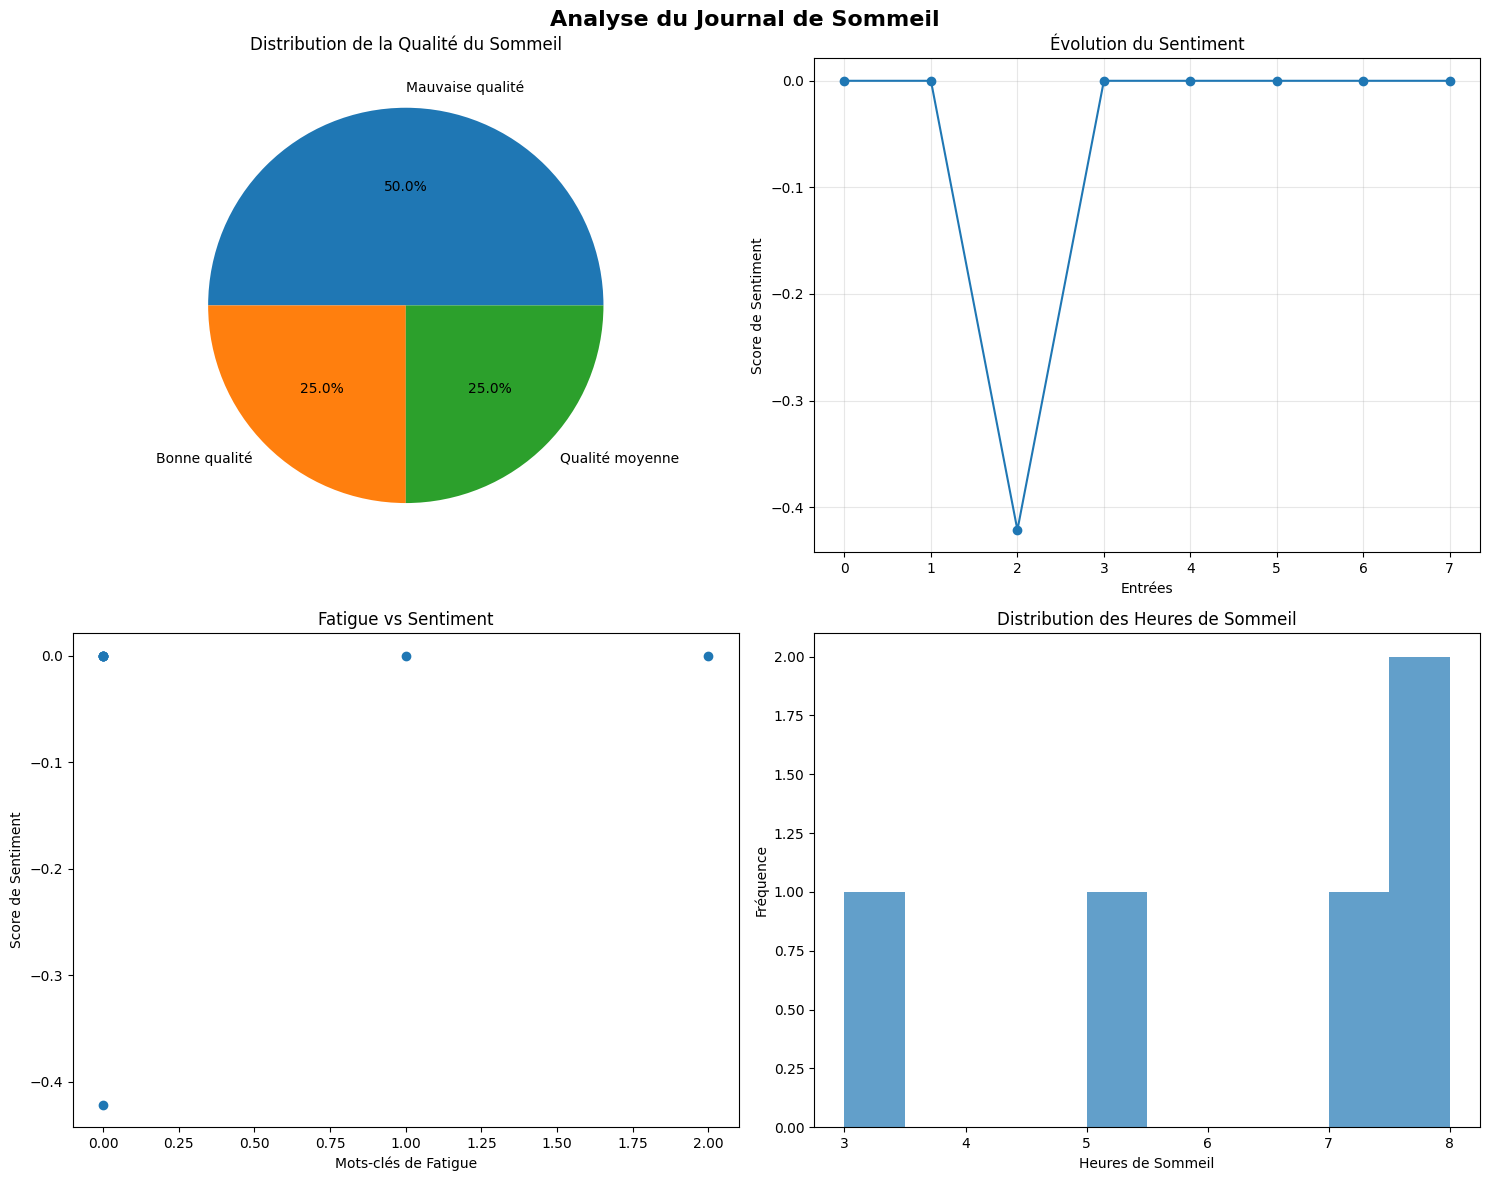

In [27]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Téléchargement des ressources NLTK nécessaires
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('vader_lexicon', quiet=True)
except:
    pass

class SleepDiaryAnalyzer:
    def __init__(self):
        self.sia = SentimentIntensityAnalyzer()
        self.stop_words = set(stopwords.words('french') + stopwords.words('english'))
        self.vectorizer = TfidfVectorizer(max_features=100, stop_words='french')
        self.classifier = None
        
        # Dictionnaires pour l'analyse sémantique
        self.sleep_keywords = {
            'fatigue': ['fatigué', 'épuisé', 'crevé', 'tired', 'exhausted', 'fatigué', 'las'],
            'stress': ['stressé', 'anxieux', 'angoissé', 'stressed', 'worried', 'inquiet'],
            'qualité_positive': ['reposé', 'frais', 'énergique', 'refreshed', 'energetic', 'bien dormi'],
            'qualité_negative': ['mal dormi', 'insomnie', 'réveils', 'cauchemar', 'agité'],
            'durée': ['heures', 'h', 'minutes', 'min', 'temps'],
            'réveils': ['réveillé', 'réveil', 'levé', 'debout', 'wake up', 'woke']
        }
        
        # Patterns regex pour extraction d'entités
        self.time_patterns = {
            'heures': r'(\d+)\s*(?:heures?|h)',
            'minutes': r'(\d+)\s*(?:minutes?|min)',
            'reveils': r'(\d+)\s*(?:fois|réveils?|wake)',
            'heure_coucher': r'(?:couché|dormi|sleep)\s*(?:à|at)\s*(\d{1,2})[h:]?(\d{0,2})',
            'heure_lever': r'(?:levé|réveillé|wake)\s*(?:à|at)\s*(\d{1,2})[h:]?(\d{0,2})'
        }

    def preprocess_text(self, text):
        """Préprocessing du texte"""
        if pd.isna(text):
            return ""
        
        text = text.lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def extract_temporal_entities(self, text):
        """Extraction d'entités temporelles"""
        entities = {}
        text_lower = text.lower()
        
        # Extraction des heures de sommeil
        heures_match = re.search(self.time_patterns['heures'], text_lower)
        if heures_match:
            entities['heures_sommeil'] = int(heures_match.group(1))
        
        # Extraction des minutes
        minutes_match = re.search(self.time_patterns['minutes'], text_lower)
        if minutes_match:
            entities['minutes_sommeil'] = int(minutes_match.group(1))
        
        # Extraction du nombre de réveils
        reveils_match = re.search(self.time_patterns['reveils'], text_lower)
        if reveils_match:
            entities['nb_reveils'] = int(reveils_match.group(1))
        
        return entities

    def analyze_sentiment(self, text):
        """Analyse de sentiment"""
        if not text:
            return {'compound': 0, 'pos': 0, 'neu': 0, 'neg': 0}
        
        scores = self.sia.polarity_scores(text)
        return scores

    def extract_sleep_keywords(self, text):
        """Extraction des mots-clés liés au sommeil"""
        text_lower = text.lower()
        keyword_counts = {}
        
        for category, keywords in self.sleep_keywords.items():
            count = sum(1 for keyword in keywords if keyword in text_lower)
            keyword_counts[f'{category}_keywords'] = count
        
        return keyword_counts

    def classify_sleep_quality(self, sentiment_scores, keywords, temporal_entities):
        """Classification de la qualité du sommeil"""
        score = 0
        
        # Score basé sur le sentiment
        score += sentiment_scores['compound'] * 2
        
        # Score basé sur les mots-clés
        score += keywords.get('qualité_positive_keywords', 0) * 0.5
        score -= keywords.get('qualité_negative_keywords', 0) * 0.5
        score -= keywords.get('fatigue_keywords', 0) * 0.3
        score -= keywords.get('stress_keywords', 0) * 0.4
        
        # Score basé sur les entités temporelles
        if 'heures_sommeil' in temporal_entities:
            heures = temporal_entities['heures_sommeil']
            if 7 <= heures <= 9:
                score += 0.5
            elif heures < 6 or heures > 10:
                score -= 0.5
        
        if 'nb_reveils' in temporal_entities:
            score -= temporal_entities['nb_reveils'] * 0.2
        
        # Classification
        if score > 0.5:
            return "Bonne qualité"
        elif score > -0.5:
            return "Qualité moyenne"
        else:
            return "Mauvaise qualité"

    def detect_sleep_issues(self, text, sentiment_scores, keywords, temporal_entities):
        """Détection de problèmes de sommeil spécifiques"""
        issues = []
        text_lower = text.lower()
        
        # Détection d'insomnie
        insomnia_indicators = ['insomnie', 'pas dormi', 'impossible de dormir', 'réveillé toute la nuit']
        if any(indicator in text_lower for indicator in insomnia_indicators):
            issues.append("Suspicion d'insomnie")
        
        # Détection de stress/anxiété
        if keywords.get('stress_keywords', 0) > 0 or sentiment_scores['neg'] > 0.6:
            issues.append("Stress/Anxiété détecté")
        
        # Détection de sommeil fragmenté
        if temporal_entities.get('nb_reveils', 0) >= 3:
            issues.append("Sommeil fragmenté")
        
        # Détection de durée insuffisante
        if temporal_entities.get('heures_sommeil', 8) < 6:
            issues.append("Durée de sommeil insuffisante")
        
        return issues

    def analyze_single_entry(self, text):
        """Analyse complète d'une entrée de journal"""
        if not text or pd.isna(text):
            return None
        
        # Préprocessing
        processed_text = self.preprocess_text(text)
        
        # Analyses
        sentiment = self.analyze_sentiment(text)
        keywords = self.extract_sleep_keywords(text)
        temporal_entities = self.extract_temporal_entities(text)
        sleep_quality = self.classify_sleep_quality(sentiment, keywords, temporal_entities)
        sleep_issues = self.detect_sleep_issues(text, sentiment, keywords, temporal_entities)
        
        return {
            'texte_original': text,
            'texte_preprocessed': processed_text,
            'sentiment_compound': sentiment['compound'],
            'sentiment_positive': sentiment['pos'],
            'sentiment_negative': sentiment['neg'],
            'sentiment_neutral': sentiment['neu'],
            **keywords,
            **temporal_entities,
            'qualite_sommeil': sleep_quality,
            'problemes_detectes': sleep_issues,
            'score_global': sentiment['compound'] - keywords.get('fatigue_keywords', 0) * 0.1
        }

    def analyze_sleep_diary(self, entries):
        """Analyse d'un journal de sommeil complet"""
        results = []
        
        for entry in entries:
            analysis = self.analyze_single_entry(entry)
            if analysis:
                results.append(analysis)
        
        return pd.DataFrame(results)

    def generate_insights(self, df_analysis):
        """Génération d'insights à partir des analyses"""
        if df_analysis.empty:
            return {}
        
        insights = {
            'total_entries': len(df_analysis),
            'avg_sentiment': df_analysis['sentiment_compound'].mean(),
            'quality_distribution': df_analysis['qualite_sommeil'].value_counts().to_dict(),
            'most_common_issues': [],
            'avg_sleep_hours': None,
            'avg_wake_ups': None
        }
        
        # Problèmes les plus fréquents
        all_issues = []
        for issues_list in df_analysis['problemes_detectes']:
            all_issues.extend(issues_list)
        
        if all_issues:
            from collections import Counter
            insights['most_common_issues'] = dict(Counter(all_issues).most_common(3))
        
        # Moyennes des entités temporelles
        if 'heures_sommeil' in df_analysis.columns:
            insights['avg_sleep_hours'] = df_analysis['heures_sommeil'].mean()
        
        if 'nb_reveils' in df_analysis.columns:
            insights['avg_wake_ups'] = df_analysis['nb_reveils'].mean()
        
        return insights

    def create_visualizations(self, df_analysis):
        """Création de visualisations"""
        if df_analysis.empty:
            return None
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Analyse du Journal de Sommeil', fontsize=16, fontweight='bold')
        
        # 1. Distribution de la qualité du sommeil
        quality_counts = df_analysis['qualite_sommeil'].value_counts()
        axes[0, 0].pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%')
        axes[0, 0].set_title('Distribution de la Qualité du Sommeil')
        
        # 2. Évolution du sentiment dans le temps
        axes[0, 1].plot(df_analysis.index, df_analysis['sentiment_compound'], marker='o')
        axes[0, 1].set_title('Évolution du Sentiment')
        axes[0, 1].set_xlabel('Entrées')
        axes[0, 1].set_ylabel('Score de Sentiment')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Corrélation sentiment vs mots-clés de fatigue
        if 'fatigue_keywords' in df_analysis.columns:
            axes[1, 0].scatter(df_analysis['fatigue_keywords'], df_analysis['sentiment_compound'])
            axes[1, 0].set_xlabel('Mots-clés de Fatigue')
            axes[1, 0].set_ylabel('Score de Sentiment')
            axes[1, 0].set_title('Fatigue vs Sentiment')
        
        # 4. Distribution des heures de sommeil
        if 'heures_sommeil' in df_analysis.columns and not df_analysis['heures_sommeil'].isna().all():
            axes[1, 1].hist(df_analysis['heures_sommeil'].dropna(), bins=10, alpha=0.7)
            axes[1, 1].set_xlabel('Heures de Sommeil')
            axes[1, 1].set_ylabel('Fréquence')
            axes[1, 1].set_title('Distribution des Heures de Sommeil')
        
        plt.tight_layout()
        return fig

# Fonctions utilitaires pour Streamlit
def load_sample_data():
    """Chargement de données d'exemple"""
    sample_entries = [
        "J'ai très mal dormi cette nuit, je me suis réveillé 4 fois et je suis très fatigué ce matin",
        "Excellente nuit de sommeil, j'ai dormi 8 heures d'affilée et je me sens très reposé",
        "Nuit difficile à cause du stress, j'ai mis du temps à m'endormir et j'ai fait des cauchemars",
        "Sommeil correct, environ 7 heures mais quelques réveils nocturnes",
        "Je suis épuisé, seulement 5 heures de sommeil à cause du travail",
        "Très bonne récupération, je me sens énergique et frais ce matin",
        "Insomnie partielle, réveillé à 3h du matin et impossible de me rendormir",
        "Nuit paisible, endormissement rapide et réveil naturel après 8h30 de sommeil"
    ]
    return sample_entries

def run_complete_analysis(entries):
    """Fonction principale pour l'analyse complète"""
    analyzer = SleepDiaryAnalyzer()
    
    # Analyse des entrées
    df_results = analyzer.analyze_sleep_diary(entries)
    
    # Génération d'insights
    insights = analyzer.generate_insights(df_results)
    
    # Création des visualisations
    fig = analyzer.create_visualizations(df_results)
    
    return df_results, insights, fig

# Exemple d'utilisation
if __name__ == "__main__":
    # Test avec des données d'exemple
    sample_data = load_sample_data()
    
    print("=== ANALYSE DU JOURNAL DE SOMMEIL ===\n")
    
    # Analyse
    results_df, insights_dict, visualization = run_complete_analysis(sample_data)
    
    # Affichage des résultats
    print("Résultats de l'analyse:")
    print(f"- Nombre d'entrées analysées: {insights_dict['total_entries']}")
    print(f"- Sentiment moyen: {insights_dict['avg_sentiment']:.3f}")
    print(f"- Distribution de qualité: {insights_dict['quality_distribution']}")
    
    if insights_dict['most_common_issues']:
        print(f"- Problèmes les plus fréquents: {insights_dict['most_common_issues']}")
    
    if insights_dict['avg_sleep_hours']:
        print(f"- Durée moyenne de sommeil: {insights_dict['avg_sleep_hours']:.1f}h")
    
    # Sauvegarde des résultats
    results_df.to_csv('sleep_analysis_results.csv', index=False)
    
    if visualization:
        visualization.savefig('sleep_analysis_visualization.png', dpi=300, bbox_inches='tight')
    
    print("\nAnalyse terminée! Fichiers sauvegardés.")